# analysis

### load base data

In [1]:
import pandas as pd

In [2]:
formated_data_timestamps = pd.read_excel("Formated_Data_Renamed.xlsx", header=0, index_col=None, dtype=str)

In [3]:
TASK_COUNT = 116

In [4]:
formated_data_timestamps

app                                          task_name            user1  \
0    jd                   搜索“无线耳机”，打开一个非自营卖家的商品页面，查看其一条评价。  20251012_104825   
1    jd              找一个价格在50到100元之间的移动电源，加入购物车，然后从购物车中移除。  20251012_105107   
2    jd                  使用应用的对比功能，比较两个不同品牌的手机壳，重点关注价格和材质。  20251012_105412   
3    jd                     找到“百亿补贴”专区，选择一个补贴商品，查看其折扣价与原价。  20251012_105701   
4    jd            选择一种日用品（例如洗发水），添加收货地址，进入订单确认页面，但不要提交支付。  20251012_105947   
..   ..                                                ...              ...   
111  知乎              搜索“编程猫”，搜索用户，并进入结果中一个用户的主页，查看其最新发布的文章  20251115_185627   
112  知乎  搜索“编程猫”，搜索用户，并进入结果中一个用户的主页，查看其最新发布的文章，点赞该文章，点击...  20251115_185802   
113  知乎                                         搜索“人工智能”专栏  20251115_190001   
114  知乎              搜索“人工智能”专栏，查看一篇专栏中的文章并评论“hello world”  20251115_190056   
115  知乎      搜索“人工智能”专栏，查看一篇专栏中的文章并评论“hello world”，并将该文章收藏  20251115_190358   

               user2            user3   ui-tars available humanity  \
0    20251012_114348  20251014_142315              20251015_195101   
1    20251012_114522  20251014_142456              20251015_195632   
2    20251012_114739  20251014_142701              20251015_200817   
3    20251012_115003  20251014_143233              20251015_201818   
4    20251012_115159  20251014_143606              20251015_202029   
..               ...              ...                          ...   
111  20251115_164345              NaN              20251201_201900   
112  20251115_164609              NaN              20251201_202135   
113  20251115_164832              NaN  20251201_202546_problematic   
114  20251115_164957              NaN  20251201_202819_problematic   
115  20251115_165250              NaN  20251201_203019_problematic   

                                      Ui-tars success?  \
0    20251013_091517With lots of human intervention...   
1    (20251013_091907 had volcengine failure)\n失败：不...   
2    (20251013_092058 had volcengine failure)\n找了半天...   
3         (20251013_092208 had volcengine failure)\n成功   
4    (20251013_092319 volcengine dos) 洗发水订单确认，但是没有添...   
..                                                 ...   
111                                                NaN   
112                                                NaN   
113                                                NaN   
114                                                NaN   
115                                                NaN   

    Mobile-agent-e gpt-4o available humanity  \
0                            20251013_102435   
1                            20251013_102921   
2                            20251013_105043   
3                            20251013_105309   
4                            20251013_105524   
..                                       ...   
111                          20251203_110016   
112                          20251203_110711   
113                          20251203_113803   
114                          20251203_115101   
115                          20251203_120822   

    Mobile-agent-e gpt-4o available humanity success?  \
0                                   查看的是短视频。。有评价弹屏。。。   
1                                         加入了购物车，没能移除   
2                                        失败（点击搜索时点了相机   
3              找到了“百亿补贴”专区，which展示了很多折扣价与补贴额。然后什么都没干。   
4                                  洗发水订单确认，但是没有添加收货地址   
..                                                ...   
111                                               NaN   
112                                               NaN   
113                                               NaN   
114                                               NaN   
115                                               NaN   

    Mobile-agent-e claude-sonnet-3.7 available humanity  ...  \
0                                                  NaN   ...   
1                                      20251013_144110   ...   
2                                      20251013_144802   ...   

In [5]:
# print all unique app names in formated_data_timestamps
formated_data_timestamps['app'].unique()

array(['jd', 'eleme', 'ctrip', 'qqmusic', 'iqiyi', '哔哩哔哩', '菜鸟裹裹', '高德地图',
       '航旅纵横', '好大夫', '美团', '去哪儿', '淘宝', '腾讯文档', '腾讯会议', '今日头条', '微博',
       '小红书', '有道词典', '知乎'], dtype=object)

In [6]:
# classify: social media, shopping, video streaming, trip planning, office&learning, others

from typing import List


task_cluster_by_name = {
    "social_media": ['今日头条', '微博', '小红书', '知乎'],
    "shopping": ['jd', '淘宝', '菜鸟裹裹', '美团', 'eleme'],
    "video_streaming": ['iqiyi', '哔哩哔哩', 'qqmusic'],
    "trip_planning": ['ctrip', '高德地图', '航旅纵横', '去哪儿'],
    "office_learning": ['腾讯文档', '腾讯会议', '有道词典', '好大夫'],
}

# check that each task is classified
all_mentioned_tasks = set()
for task_list in task_cluster_by_name.values():
    all_mentioned_tasks.update(task_list)
all_given_tasks = set(formated_data_timestamps['app'].unique())
assert all_mentioned_tasks == all_given_tasks, f"Some tasks are not classified: {all_given_tasks - all_mentioned_tasks}"


task_clusters: List[List[int]] = [
    list(formated_data_timestamps.index[formated_data_timestamps["app"].isin(lister)]) for key, lister in task_cluster_by_name.items()
]

In [7]:
formated_data_timestamps.index[formated_data_timestamps['app'].isin(["jd"])]

Index([0, 1, 2, 3, 4], dtype='int64')

In [8]:
from analysis.lib.gesture_log_reader_utils import file_finder
from pathlib import Path

In [9]:
import numpy as np
np.isnan(float("nan")), np.isnan(float("inf"))

(True, False)

### test existence

In [10]:
for timestamp in formated_data_timestamps["gpt4o no humanity"]:
    if (not isinstance(timestamp, str)):
        continue
    stripped_timestamp = timestamp.strip()
    if stripped_timestamp != "":
        print(file_finder(Path("logs/"), "gesture_recording_" + stripped_timestamp + ".log"))

logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_085544.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_092951.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_093831.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_094246.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250924_090037.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_101347.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_101607.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_recording_20250925_102121.log
logs/logs_previous_repo/mobile_agent_e_gpt_4o_no_humanity_gesture_recording/gesture_reco

### extract column names

In [11]:
formated_data_timestamps.columns

Index(['app', 'task_name', 'user1', 'user2', 'user3',
       'ui-tars available humanity', 'Ui-tars success?',
       'Mobile-agent-e gpt-4o available humanity',
       'Mobile-agent-e gpt-4o available humanity success?',
       'Mobile-agent-e claude-sonnet-3.7 available humanity',
       'Mobile-agent-e claude-sonnet-3.7 available humanity success?',
       'Online humanity best effort count', 'ui-tars no humanity',
       'ui-tars no humanity success?', 'gpt4o no humanity',
       'gpt4o no humanity success?', 'claude no humanity',
       'claude no humanity success?', 'No humanity Best effort count',
       'cpm_gui_agent raw', 'cpm_gui_agent available humanity',
       'cpm available humanity success?', 'cpm no humanity success?',
       'ui_tars_only_swipe', 'ui_tars_only_swipe success?',
       'mobile_agent_e_gpt_4o_only_swipe',
       'mobile_agent_e_gpt_4o_only_swipe success?', 'only swipe success rate',
       'ui_tars_rot_tap_and_faked', 'ui_tars_rot_tap_and_faked success?'

In [12]:
formated_data_timestamps.columns[30]

'mobile_agent_e_gpt_4o_rot_tap_and_faked'

In [13]:
columns_list = list(formated_data_timestamps.columns)
len(columns_list)

33

In [14]:
from operator import itemgetter
from typing import Tuple

humans: List[str] = list(itemgetter(2, 3, 4)(columns_list))
humanized_agents: List[str] = list(itemgetter(5, 7, 9, 20)(columns_list))
non_humanized_agents: List[str] = list(itemgetter(12, 14, 16, 19)(columns_list))
rot_humanized_agents: List[str] = list(itemgetter(23, 25)(columns_list))
fake_rot_tap_humanized_agents: List[str] = list(itemgetter(28, 30)(columns_list))
young_males = ["user1", "user2", "user3"]
ui_tars = ["ui-tars no humanity", "ui-tars available humanity", "ui_tars_only_swipe"] #, "ui_tars_rot_tap_and_faked"]
gpt4o_agents = ["gpt4o no humanity", "Mobile-agent-e gpt-4o available humanity", "mobile_agent_e_gpt_4o_only_swipe"] #, "mobile_agent_e_gpt_4o_rot_tap_and_faked"]
claude_agents = ["claude no humanity", "Mobile-agent-e claude-sonnet-3.7 available humanity"]
cpm_gui_agents = ["cpm_gui_agent raw", "cpm_gui_agent available humanity"]

In [15]:
for i in [humans, humanized_agents, non_humanized_agents, rot_humanized_agents, fake_rot_tap_humanized_agents]:
    print(i)

['user1', 'user2', 'user3']
['ui-tars available humanity', 'Mobile-agent-e gpt-4o available humanity', 'Mobile-agent-e claude-sonnet-3.7 available humanity', 'cpm_gui_agent available humanity']
['ui-tars no humanity', 'gpt4o no humanity', 'claude no humanity', 'cpm_gui_agent raw']
['ui_tars_only_swipe', 'mobile_agent_e_gpt_4o_only_swipe']
['ui_tars_rot_tap_and_faked', 'mobile_agent_e_gpt_4o_rot_tap_and_faked']


### Design basic reader for this data

In [16]:
from functools import partial
from analysis.processing.extract_feature_of_swipes import cleanse_into_swipe
from analysis.lib.gesture_log_reader_utils import ranged_modified_generator_without_session_timestamp as previous_ranged_modified_generator
from analysis.processing.tap_duration_extract import leave_taps
from typing import Callable, List, Optional
from analysis.lib.motionevent_classes import FingerEvent
ranged_swipe_generator: Callable[[List[str], Optional[List[int]], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[List[FingerEvent]]] = partial(previous_ranged_modified_generator, formated_data_timestamps=formated_data_timestamps, filtering_and_modification_function=cleanse_into_swipe)

ranged_tap_generator = partial(previous_ranged_modified_generator, formated_data_timestamps=formated_data_timestamps, filtering_and_modification_function=leave_taps)



ranged_raw_generator = partial(previous_ranged_modified_generator, formated_data_timestamps=formated_data_timestamps, filtering_and_modification_function=None)



In [17]:
asdvasd = [humans[2]]
ranged_swipe_generator(participants=asdvasd,  index_range=[1,2,3])

[[FingerEvent(timestamp_us=428277683, x=696, y=1584),
  FingerEvent(timestamp_us=428346030, x=694, y=1567),
  FingerEvent(timestamp_us=428357606, x=693, y=1550),
  FingerEvent(timestamp_us=428368833, x=693, y=1522),
  FingerEvent(timestamp_us=428379335, x=694, y=1479),
  FingerEvent(timestamp_us=428391204, x=699, y=1431),
  FingerEvent(timestamp_us=428402170, x=703, y=1386),
  FingerEvent(timestamp_us=428413486, x=709, y=1342),
  FingerEvent(timestamp_us=428424557, x=715, y=1300),
  FingerEvent(timestamp_us=428435930, x=718, y=1261),
  FingerEvent(timestamp_us=428446904, x=720, y=1225),
  FingerEvent(timestamp_us=428458282, x=721, y=1192),
  FingerEvent(timestamp_us=428469562, x=723, y=1160),
  FingerEvent(timestamp_us=428480662, x=723, y=1131),
  FingerEvent(timestamp_us=428491929, x=723, y=1113),
  FingerEvent(timestamp_us=428503300, x=723, y=1090),
  FingerEvent(timestamp_us=428515063, x=720, y=1062),
  FingerEvent(timestamp_us=428526287, x=719, y=1033),
  FingerEvent(timestamp_us=4

In [19]:
from analysis.processing.fit_effort_provider import FitEffortProvider, bot_line_fit
from analysis.processing.fit_effort_provider import pickle
from analysis.processing.fit_effort_provider import b_spline_faker as previous_b_spline_faker

static_fit_effort_provider: FitEffortProvider
with open("analysis/processing/swipe_data.pkl", "rb") as f:
    static_fit_effort_provider = FitEffortProvider(
        pickle.load(f)
    )

b_spline_faker = partial(previous_b_spline_faker, neighbor_time_delta_us=11000)
def raw_faker(event_list: List[FingerEvent]) -> List[FingerEvent]:
    return bot_line_fit(x1=event_list[0].x, y1=event_list[0].y, x2=event_list[-1].x, y2=event_list[-1].y, duration_us=500 * 1000, neighbor_time_delta_us=11000)

### Print table of swipe count: row: task column: agent

In [ ]:
def execute_swipe_count_individual_participants():
    all_participants = humans + non_humanized_agents + humanized_agents + rot_humanized_agents + fake_rot_tap_humanized_agents
    swipe_counts_individual_participants = pd.DataFrame(columns=all_participants, index=range(TASK_COUNT))

    for task in range(TASK_COUNT):
        for participant in all_participants:
            # print(f"Processing task {task} participant {participant}")
            generator = ranged_swipe_generator(participants=[participant], index_range=[task])
            swipe_count = len(generator)
            # aggregate swipe_count into a 
            swipe_counts_individual_participants.loc[task, participant] = swipe_count
    swipe_counts_individual_participants.to_csv("results0125/swipe_counts_individual_participants.csv")
    # print sum of swipe counts across tasks for each participant
    total_swipe_counts = swipe_counts_individual_participants.sum(axis=0)
    print(total_swipe_counts)


    # totalize over the 5 categories
    for category in [young_males, ui_tars, gpt4o_agents, claude_agents, cpm_gui_agents]:
        success_counts = total_swipe_counts[category].sum()
        print(f"Category {category} total swipe counts: {success_counts}")
    
execute_swipe_count_individual_participants()

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under lo

### Print table of tap count: row: task column: agent

In [ ]:
def execute_tap_count_individual_participants():
    all_participants = humans + non_humanized_agents + humanized_agents + rot_humanized_agents + fake_rot_tap_humanized_agents
    tap_counts_individual_participants = pd.DataFrame(columns=all_participants, index=range(TASK_COUNT))
    for task in range(TASK_COUNT):
        for participant in all_participants:
            # print(f"Processing task {task} participant {participant}")
            generator = ranged_tap_generator(participants=[participant], index_range=[task])
            tap_count = len(generator)
            # aggregate swipe_count into a 
            tap_counts_individual_participants.loc[task, participant] = tap_count
    tap_counts_individual_participants.to_csv("results0125/tap_counts_individual_participants.csv")
    
    # print sum of tap counts across tasks for each participant
    total_tap_counts = tap_counts_individual_participants.sum(axis=0)
    print(total_tap_counts)


    

    # totalize over the 5 categories
    for category in [young_males, ui_tars, gpt4o_agents, claude_agents, cpm_gui_agents]:
        success_counts = total_tap_counts[category].sum()
        print(f"Category {category} total tap counts: \t {success_counts}")
execute_tap_count_individual_participants()

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under lo

## Print sensorevent counts

In [ ]:
# reload analysis.lib.gesture_log_reader_utils
import importlib
import analysis.lib.gesture_log_reader_utils
_ = importlib.reload(analysis.lib.gesture_log_reader_utils)

<module 'gesture_log_reader_utils' from '/project_folder/gesture_log_reader_utils.py'>

In [ ]:
from analysis.lib.gesture_log_reader_utils import rectify_timestamp_idx

all_participants = humans + non_humanized_agents + humanized_agents + rot_humanized_agents + fake_rot_tap_humanized_agents

all_participants = list(all_participants)

rectified_formated_data_timestamps = rectify_timestamp_idx(formated_data_timestamps, participants=all_participants)




In [25]:
rectified_formated_data_timestamps

{'user1': [(0, '20251012_104825'),
  (1, '20251012_105107'),
  (2, '20251012_105412'),
  (3, '20251012_105701'),
  (4, '20251012_105947'),
  (5, '20251012_110215'),
  (6, '20251012_110410'),
  (7, '20251012_110544'),
  (8, '20251012_110943'),
  (9, '20251012_111051'),
  (10, '20251012_111330'),
  (11, '20251012_111614'),
  (12, '20251012_111812'),
  (13, '20251012_112054'),
  (14, '20251012_112232'),
  (15, '20251012_112338'),
  (16, '20251012_112445'),
  (17, '20251012_112604'),
  (18, '20251012_112714'),
  (19, '20251012_112855'),
  (20, '20251012_113033'),
  (21, '20251012_113200'),
  (22, '20251012_113351'),
  (23, '20251012_113511'),
  (24, '20251012_113631'),
  (25, '20251012_113825'),
  (26, '20251115_152846'),
  (27, '20251115_153005'),
  (28, '20251115_153134'),
  (29, '20251115_153336'),
  (30, '20251115_153556'),
  (31, '20251115_153746'),
  (32, '20251115_153947'),
  (33, '20251115_154143'),
  (34, '20251115_154302'),
  (35, '20251115_170110'),
  (36, '20251115_170216'),
  

In [26]:
from typing import Dict, List, Tuple
a: Dict[str, List[int]] = {"a": [1], "b": [2], }
a

{'a': [1], 'b': [2]}

In [ ]:
import analysis.lib.sensor_log_reader_utils
importlib.reload(analysis.lib.sensor_log_reader_utils)

<module 'sensor_log_reader_utils' from '/project_folder/sensor_log_reader_utils.py'>

In [ ]:
from analysis.lib.sensor_log_reader_utils import ranged_batched_modified_sensor_generator_with_session_timestamp, SensorSessionType

def print_sensor_counts(participants_group_to_consider: List[List[str]]):

    total_table = pd.DataFrame()
    for participants in participants_group_to_consider:
        for participant in participants:
            generator = ranged_batched_modified_sensor_generator_with_session_timestamp(
                formated_data_timestamps_rectified=rectified_formated_data_timestamps,
                participants=[participant],
                index_range=None,
                use_tqdm_for_each_participant=True
            )

            all_sensors = set.union(*[set(session["sensor_data_for_each_sensor_type"].keys()) for session in generator])
            
            sensor_counts_individual_participants = pd.DataFrame(columns=list(all_sensors))

            for sensor in all_sensors:
                sum_count = sum(session["sensor_data_for_each_sensor_type"][sensor].shape[0] for session in generator if sensor in session["sensor_data_for_each_sensor_type"])
                sensor_counts_individual_participants.loc[participant, sensor] = sum_count
            
            print(sensor_counts_individual_participants)
            total_table = pd.concat([total_table, sensor_counts_individual_participants], axis=0)
        # print sum of sensor counts across tasks for each participant
    total_table.to_csv("results0125/sensor_counts_individual_participants.csv")
    print(total_table)

In [ ]:


print_sensor_counts([young_males, ui_tars, gpt4o_agents, claude_agents, cpm_gui_agents])

100%|██████████| 115/115 [00:22<00:00,  5.03it/s]


    Gravity StepCounter Accelerometer StepDetector Light MotionDetector  \
user1  1691269         130       1691513           18  2517              0   

   RotationVector Proximity Gyroscope LinearAcceleration MagneticField  \
user1        1691164       243   1691311            1691268        415705   

   Pressure  
user1        0  


100%|██████████| 114/114 [00:26<00:00,  4.31it/s]


     Gravity StepCounter Accelerometer StepDetector Light MotionDetector  \
user2  1949711         124       1949963           10  1629              0   

    RotationVector Proximity Gyroscope LinearAcceleration MagneticField  \
user2        1915603       233   1949752            1949712        470841   

    Pressure  
user2        0  


 49%|████▉     | 22/45 [00:06<00:07,  2.98it/s]

100%|██████████| 45/45 [00:11<00:00,  3.76it/s]


    Gravity StepCounter Accelerometer StepDetector Light MotionDetector  \
user3  875372          55        875459           18  1154              0   

    RotationVector Proximity Gyroscope LinearAcceleration MagneticField  \
user3         875349        90    875428             875369        215156   

    Pressure  
user3        0  


100%|██████████| 108/108 [00:41<00:00,  2.58it/s]


                     Gravity StepCounter Accelerometer StepDetector Light  \
ui-tars no humanity  2991077         108       2991281           16   579   

                    MotionDetector RotationVector Proximity Gyroscope  \
ui-tars no humanity              0        2971001       212   2991215   

                    LinearAcceleration MagneticField Pressure  
ui-tars no humanity            2991074        730144        0  


100%|██████████| 109/109 [00:50<00:00,  2.14it/s]


                            Gravity StepCounter Accelerometer StepDetector  \
ui-tars available humanity  3599325         109       3599506           16   

                           Light MotionDetector RotationVector Proximity  \
ui-tars available humanity   496              0        3561274       209   

                           Gyroscope LinearAcceleration MagneticField Pressure  
ui-tars available humanity   3599468            3599326        875199        0  


100%|██████████| 89/89 [00:39<00:00,  2.28it/s]


                    Gravity StepCounter Accelerometer StepDetector Light  \
ui_tars_only_swipe  2758154          89       2758320            0   265   

                   MotionDetector RotationVector Proximity Gyroscope  \
ui_tars_only_swipe              0        2757363       179   2758282   

                   LinearAcceleration MagneticField Pressure  
ui_tars_only_swipe            2758158        677692        0  


100%|██████████| 113/113 [03:49<00:00,  2.03s/it]


                    Gravity StepCounter Accelerometer StepDetector Light  \
gpt4o no humanity  15392802         113      15392992            0  2999   

                  MotionDetector RotationVector Proximity Gyroscope  \
gpt4o no humanity              0       15392742       222  15392962   

                  LinearAcceleration MagneticField Pressure  
gpt4o no humanity           15392802       3782534        0  


  3%|▎         | 4/116 [00:05<01:56,  1.04s/it]

100%|██████████| 116/116 [03:04<00:00,  1.59s/it]


                                           Gravity StepCounter Accelerometer  \
Mobile-agent-e gpt-4o available humanity  12379291         115      12379501   

                                         StepDetector Light MotionDetector  \
Mobile-agent-e gpt-4o available humanity           25   981              0   

                                         RotationVector Proximity Gyroscope  \
Mobile-agent-e gpt-4o available humanity       12326246       223  12379430   

                                         LinearAcceleration MagneticField  \
Mobile-agent-e gpt-4o available humanity           12379286       3028987   

                                         Pressure  
Mobile-agent-e gpt-4o available humanity        0  


100%|██████████| 89/89 [02:23<00:00,  1.61s/it]


                                  Gravity StepCounter Accelerometer  \
mobile_agent_e_gpt_4o_only_swipe  9638488          89       9638664   

                                 StepDetector Light MotionDetector  \
mobile_agent_e_gpt_4o_only_swipe            0   373              0   

                                 RotationVector Proximity Gyroscope  \
mobile_agent_e_gpt_4o_only_swipe        9638454       178   9638603   

                                 LinearAcceleration MagneticField Pressure  
mobile_agent_e_gpt_4o_only_swipe            9638498       2368478        0  


100%|██████████| 113/113 [04:00<00:00,  2.13s/it]


                     Gravity StepCounter Accelerometer StepDetector Light  \
claude no humanity  16165637         110      16165856            0  1185   

                   MotionDetector RotationVector Proximity Gyroscope  \
claude no humanity              0       15655597       212  16165847   

                   LinearAcceleration MagneticField Pressure  
claude no humanity           16165636       3846893        0  


100%|██████████| 111/111 [03:06<00:00,  1.68s/it]


                                                     Gravity StepCounter  \
Mobile-agent-e claude-sonnet-3.7 available huma...  12942167         111   

                                                   Accelerometer StepDetector  \
Mobile-agent-e claude-sonnet-3.7 available huma...      12942360           15   

                                                   Light MotionDetector  \
Mobile-agent-e claude-sonnet-3.7 available huma...  2394              0   

                                                   RotationVector Proximity  \
Mobile-agent-e claude-sonnet-3.7 available huma...       12141290       215   

                                                   Gyroscope  \
Mobile-agent-e claude-sonnet-3.7 available huma...  12942301   

                                                   LinearAcceleration  \
Mobile-agent-e claude-sonnet-3.7 available huma...           12942158   

                                                   MagneticField Pressure  
Mobile-agent-e claude-

100%|██████████| 87/87 [00:47<00:00,  1.84it/s]


                   Gravity StepCounter Accelerometer StepDetector Light  \
cpm_gui_agent raw  3343303          84       3343441            0   472   

                  MotionDetector RotationVector Proximity Gyroscope  \
cpm_gui_agent raw              0        3343258       175   3343425   

                  LinearAcceleration MagneticField Pressure  
cpm_gui_agent raw            3343305        821607        0  


100%|██████████| 88/88 [00:51<00:00,  1.72it/s]


                                  Gravity StepCounter Accelerometer  \
cpm_gui_agent available humanity  3583246          87       3583409   

                                 StepDetector Light MotionDetector  \
cpm_gui_agent available humanity            0   420              0   

                                 RotationVector Proximity Gyroscope  \
cpm_gui_agent available humanity        3583216       174   3583366   

                                 LinearAcceleration MagneticField Pressure  
cpm_gui_agent available humanity            3583252        880616        0  
                                                     Gravity StepCounter  \
user1                                                   1691269         130   
user2                                                  1949711         124   
user3                                                   875372          55   
ui-tars no humanity                                  2991077         108   
ui-tars available humanity      

In [31]:

print_sensor_counts([["ui_tars_rot_tap_and_faked", "mobile_agent_e_gpt_4o_rot_tap_and_faked"]])

100%|██████████| 89/89 [00:45<00:00,  1.94it/s]


                           Gravity StepCounter Accelerometer StepDetector  \
ui_tars_rot_tap_and_faked  3213647          89       3213798            0   

                          Light MotionDetector RotationVector Proximity  \
ui_tars_rot_tap_and_faked  2833              0        3200123       185   

                          Gyroscope LinearAcceleration MagneticField Pressure  
ui_tars_rot_tap_and_faked   3213773            3213644        786520        0  


100%|██████████| 89/89 [03:32<00:00,  2.39s/it]

                                          Gravity StepCounter Accelerometer  \
mobile_agent_e_gpt_4o_rot_tap_and_faked  14345959          89      14346123   

                                        StepDetector Light MotionDetector  \
mobile_agent_e_gpt_4o_rot_tap_and_faked            0   425              0   

                                        RotationVector Proximity Gyroscope  \
mobile_agent_e_gpt_4o_rot_tap_and_faked       14345898       178  14346063   

                                        LinearAcceleration MagneticField  \
mobile_agent_e_gpt_4o_rot_tap_and_faked           14345962       3525565   

                                        Pressure  
mobile_agent_e_gpt_4o_rot_tap_and_faked        0  
                                          Gravity StepCounter Accelerometer  \
ui_tars_rot_tap_and_faked                 3213647          89       3213798   
mobile_agent_e_gpt_4o_rot_tap_and_faked  14345959          89      14346123   

                                    

## Plot tap duration

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

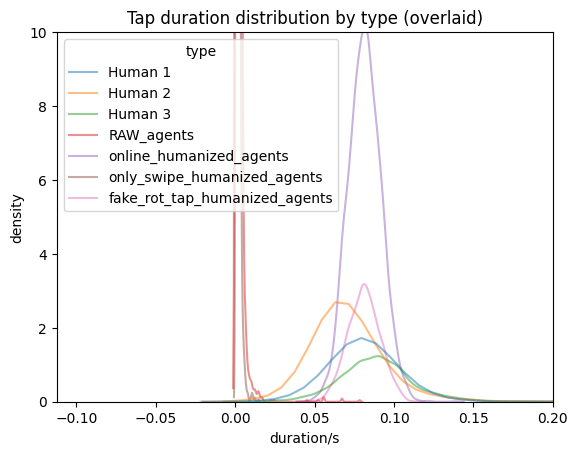

In [ ]:
from typing import List, Tuple
from analysis.lib.motionevent_classes import FingerEvent
from analysis.processing.tap_duration_extract import build_durations_dataframe
import seaborn as sns
def execute_tap_duration_individual_participants():

    humans_list: List[Tuple[str, List[List[FingerEvent]]]] = [
        (human_name, ranged_tap_generator(participants=[human_name]))
        for human_name in humans
    ]

    generator_list: List[Tuple[str, List[List[FingerEvent]]]] = [
        humans_list[0], humans_list[1], humans_list[2],
        ("RAW_agents", ranged_tap_generator(participants=non_humanized_agents)),
        ("online_humanized_agents", ranged_tap_generator(participants=humanized_agents)),
        ("only_swipe_humanized_agents", ranged_tap_generator(participants=rot_humanized_agents)),
        ("fake_rot_tap_humanized_agents", ranged_tap_generator(participants=fake_rot_tap_humanized_agents)),
    ]
    duration_df = build_durations_dataframe(generator_list)
    # ax = sns.histplot(data=duration_df, x="duration_us", hue="type", bins=50, element="step", alpha=0.5)
    duration_df["duration_us"] /= 1e6
    
    duration_df.loc[:, "type"] = duration_df["type"].replace({
        humans[0]: "Human 1",
        humans[1]: "Human 2",
        humans[2]: "Human 3"
    })
    ax = sns.kdeplot(data=duration_df, x="duration_us", hue="type", alpha=0.5)
    ax.set_xlabel("duration/s")
    ax.set_ylabel("density")
    ax.set_title("Tap duration distribution by type (overlaid)")
    ax.set_ylim(0, 10)
    ax.set_xlim(None, 200000 / 1e6)

    # put legends to right upper corner
    
    
execute_tap_duration_individual_participants()

In [5]:
formated_data_timestamps.columns

Index(['app', 'task_name', 'user1', 'user2', 'user3',
       'ui-tars available humanity', 'Ui-tars success?',
       'Mobile-agent-e gpt-4o available humanity',
       'Mobile-agent-e gpt-4o available humanity success?',
       'Mobile-agent-e claude-sonnet-3.7 available humanity',
       'Mobile-agent-e claude-sonnet-3.7 available humanity success?',
       'Online humanity best effort count', 'ui-tars no humanity',
       'ui-tars no humanity success?', 'gpt4o no humanity',
       'gpt4o no humanity success?', 'claude no humanity',
       'claude no humanity success?', 'No humanity Best effort count',
       'cpm_gui_agent raw', 'cpm_gui_agent available humanity',
       'cpm available humanity success?', 'cpm no humanity success?',
       'ui_tars_only_swipe', 'ui_tars_only_swipe success?',
       'mobile_agent_e_gpt_4o_only_swipe',
       'mobile_agent_e_gpt_4o_only_swipe success?', 'only swipe success rate',
       'ui_tars_rot_tap_and_faked', 'ui_tars_rot_tap_and_faked success?'

## calculate tap thresholding

In [ ]:
from typing import Dict, List, Tuple, Optional
from analysis.lib.motionevent_classes import FingerEvent
from analysis.processing.interval_extract import build_intervals_dataframe
from analysis.lib.gesture_log_reader_utils import ranged_batched_modified_generator_with_session_timestamp
from analysis.lib.motionevent_classes import SessionType
from analysis.processing.calculate_roc_auc_from_feature import compute_acc_per_feature_using_thresholding, ThresholdPosterior
from analysis.processing.calculate_roc_auc_from_feature import compute_acc_per_feature_using_max_precision as compute_acc_per_feature
from analysis.processing.interval_extract import build_intervals_dataframe, faking_intervals_between_gestures

from analysis.processing.tap_duration_extract import build_durations_dataframe

import seaborn as sns
def execute_tap_duration_of_participants_per_index(index_range: Optional[List[int]] = None):


    generator_list: List[Tuple[str, List[List[FingerEvent]]]] = [
        ("Humans", ranged_tap_generator(participants=humans)),
        ("non_humanized_agents", ranged_tap_generator(participants=non_humanized_agents, index_range=index_range)),
        ("humanized_agents", ranged_tap_generator(participants=humanized_agents, index_range=index_range)),
        ("non_humanized_agents_fake", ranged_tap_generator(participants=non_humanized_agents, index_range=index_range)),
        ("humanized_agents_fake", ranged_tap_generator(participants=humanized_agents, index_range=index_range)),
        ("rot_humanized_agents", ranged_tap_generator(participants=rot_humanized_agents, index_range=index_range)),
        ("fake_rot_tap_humanized_agents", ranged_tap_generator(participants=fake_rot_tap_humanized_agents, index_range=index_range)),
    ]
    duration_df = build_durations_dataframe(generator_list)

    # modify the duration: for fake agents, replace duration with faked duration
    mask_non_humanized_agents_fake = duration_df["type"] == "non_humanized_agents_fake"
    mask_humanized_agents_fake = duration_df["type"] == "humanized_agents_fake"

    # for each duration in mask_non_humanized_agents_fake, assign a distribution: max(int(random.normalvariate(80000, 10000)), 20000)
    import random
    def fake_duration():
        return max(int(random.normalvariate(80000, 10000)), 20000)
    duration_df.loc[mask_non_humanized_agents_fake, "duration_us"] = duration_df.loc[mask_non_humanized_agents_fake, "duration_us"].apply(lambda x: fake_duration())
    
    # for each duration in mask_humanized_agents_fake, assign a number: 100
    duration_df.loc[mask_humanized_agents_fake, "duration_us"] = duration_df.loc[mask_humanized_agents_fake, "duration_us"].apply(lambda x: 100)

    return duration_df



def calculate_tap_duration_accuracies_per_task_cluster():

    result_interval = pd.DataFrame(columns=["task_cluster", "raw_accuracy", "humanized_accuracy", "raw_fake_accuracy", "humanized_unhumanize_accuracy"])

    raw_humanity_classifier_across_clusters: Dict[int, ThresholdPosterior] = {}
    humanized_humanity_classifier_across_clusters: Dict[int, ThresholdPosterior] = {}
    for cluster_idx, task_list in enumerate(task_clusters):
        duration_df = execute_tap_duration_of_participants_per_index(index_range=task_list)

        # duration_df.to_csv(f"results1220/intervals_task_cluster_{cluster_idx}.csv", index=False)

        accuracy_raw, raw_humanity_duration_us_classifier = compute_acc_per_feature_using_thresholding(duration_df, pos_label="non_humanized_agents", neg_label="Humans", threshold=5000)
        raw_humanity_duration_us_classifier = raw_humanity_duration_us_classifier["duration_us"]
        raw_humanity_classifier_across_clusters[cluster_idx] = raw_humanity_duration_us_classifier

        accuracy_online_humanity, humanized_humanity_duration_us_classifier = compute_acc_per_feature(duration_df, pos_label="humanized_agents", neg_label="Humans")
        if accuracy_online_humanity.empty:
            raise ValueError("accuracy_online_humanity is empty")
        humanized_humanity_duration_us_classifier = humanized_humanity_duration_us_classifier["duration_us"]
        humanized_humanity_classifier_across_clusters[cluster_idx] = humanized_humanity_duration_us_classifier

        accuracy_fake_raw, _ = compute_acc_per_feature(duration_df, pos_label="non_humanized_agents_fake", neg_label="Humans")

        accuracy_unhumanized, _ = compute_acc_per_feature_using_thresholding(duration_df, pos_label="humanized_agents_fake", neg_label="Humans", threshold=5000)

        accuracy_rot_humanized, _ = compute_acc_per_feature_using_thresholding(duration_df, pos_label="rot_humanized_agents", neg_label="Humans", threshold=5000)
        accuracy_fake_rot_tap_humanized, _ = compute_acc_per_feature(duration_df, pos_label="fake_rot_tap_humanized_agents", neg_label="Humans")

        result_interval = pd.concat([
            result_interval, pd.DataFrame({
                "task_cluster": [cluster_idx],
                "raw_accuracy": [accuracy_raw.loc[0, "acc"] if not accuracy_raw.empty else None],
                "humanized_accuracy": [accuracy_online_humanity.loc[0, "acc"] if not accuracy_online_humanity.empty else None],
                "raw_fake_accuracy": [accuracy_fake_raw.loc[0, "acc"] if not accuracy_fake_raw.empty else None],
                "humanized_unhumanize_accuracy": [accuracy_unhumanized.loc[0, "acc"] if not accuracy_unhumanized.empty else None],
                "rot_humanized_accuracy": [accuracy_rot_humanized.loc[0, "acc"] if not accuracy_rot_humanized.empty else None],
                "fake_rot_tap_humanized_accuracy": [accuracy_fake_rot_tap_humanized.loc[0, "acc"] if not accuracy_fake_rot_tap_humanized.empty else None],
            })
        ], ignore_index=True)
    
    result_interval.to_csv("results0125/duration_based_accuracies_per_task_cluster0125.csv", index=False)

    return result_interval, raw_humanity_classifier_across_clusters, humanized_humanity_classifier_across_clusters

result_tap_csv, raw_tap_classifier_us_across_clusters, humanized_tap_classifier_us_across_clusters = calculate_tap_duration_accuracies_per_task_cluster()

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:248: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log((1 - true_positive_rate) ) - np.log(1 - false_positive_rate)),
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.l

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:248: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log((1 - true_positive_rate) ) - np.log(1 - false_positive_rate)),
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.l

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:248: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log((1 - true_positive_rate) ) - np.log(1 - false_positive_rate)),
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.l

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:248: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log((1 - true_positive_rate) ) - np.log(1 - false_positive_rate)),
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.l

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.log(false_positive_rate)), # np.log(0.0) is -inf, and throw RuntimeWarning: divide by zero encountered in log
/project_folder/calculate_roc_auc_from_feature.py:248: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log((1 - true_positive_rate) ) - np.log(1 - false_positive_rate)),
/project_folder/calculate_roc_auc_from_feature.py:247: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log(true_positive_rate) - np.l

In [41]:
result_tap_csv

task_cluster  raw_accuracy  humanized_accuracy  raw_fake_accuracy  \
0            0      0.997704            0.634101           0.607189   
1            1      0.983977            0.613295           0.607334   
2            2      0.995616            0.618563           0.615270   
3            3      0.995405            0.626351           0.611988   
4            4      0.997437            0.626320           0.611316   

   humanized_unhumanize_accuracy  rot_humanized_accuracy  \
0                            1.0                0.997612   
1                            1.0                0.997156   
2                            1.0                0.999028   
3                            1.0                0.998138   
4                            1.0                0.998864   

   fake_rot_tap_humanized_accuracy  
0                         0.621041  
1                         0.627836  
2                         0.627656  
3                         0.611053  
4                         0.617738

In [24]:
result_tap_csv

task_cluster  raw_accuracy  humanized_accuracy  raw_fake_accuracy  \
0            0      0.997704            0.634101           0.613666   
1            1      0.983977            0.613295           0.610458   
2            2      0.995616            0.618563           0.612911   
3            3      0.995405            0.626351           0.608869   
4            4      0.997437            0.626320           0.613428   

   humanized_unhumanize_accuracy  
0                            1.0  
1                            1.0  
2                            1.0  
3                            1.0  
4                            1.0

In [42]:


# map the task cluster index to:
tap_humanity_mapper = {
    "raw_accuracy": [1, 3, 4, 7, 10, 14],
    "humanized_accuracy": [2, 6, 8],
    "raw_fake_accuracy": [9, 11, 12, 13, 15, ],
    "humanized_unhumanize_accuracy": [],
    "rot_humanized_accuracy": [5, ],
    "fake_rot_tap_humanized_accuracy": [16, ],
}

# initialize a column dataframe
columns = pd.DataFrame(columns=["tap"], index=range(16 * 5))

# for each cluster, 

for cluster_idx in range(5):
    for key, cluster_list in tap_humanity_mapper.items():
        for tap_idx in cluster_list:
            row_idx = cluster_idx * 16 + (tap_idx - 1)
            columns.loc[row_idx, "tap"] = result_tap_csv.loc[cluster_idx, key]

columns


tap
0   0.997704
1   0.634101
2   0.997704
3   0.997704
4   0.997612
..       ...
75  0.611316
76  0.611316
77  0.997437
78  0.611316
79  0.617738

[80 rows x 1 columns]

In [43]:
columns.T

0         1         2         3         4         5         6   \
tap  0.997704  0.634101  0.997704  0.997704  0.997612  0.634101  0.997704   

           7         8         9   ...        70       71        72        73  \
tap  0.634101  0.607189  0.997704  ...  0.997437  0.62632  0.611316  0.997437   

           74        75        76        77        78        79  
tap  0.611316  0.611316  0.611316  0.997437  0.611316  0.617738  

[1 rows x 80 columns]

## Compare Interval Data
### Plot original

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

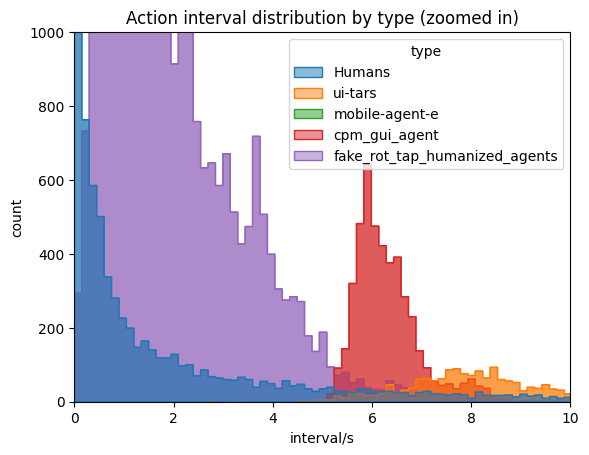

In [ ]:
from typing import List, Tuple
from analysis.lib.motionevent_classes import FingerEvent
from analysis.processing.interval_extract import build_intervals_dataframe
from analysis.lib.gesture_log_reader_utils import ranged_batched_modified_generator_with_session_timestamp
from analysis.lib.motionevent_classes import SessionType
import seaborn as sns
def execute_interval_of_participants():
    ui_tars_list = ['ui-tars no humanity', 'ui-tars available humanity']
    
    all_agents_list = non_humanized_agents + humanized_agents
    mobile_agent_e_list = [
        'Mobile-agent-e gpt-4o available humanity',
        'Mobile-agent-e claude-sonnet-3.7 available humanity',
        'gpt4o no humanity',
        'claude no humanity',
    ]
    cpm_gui_agent_list = ['cpm_gui_agent raw', 'cpm_gui_agent available humanity']

    ranged_raw_generator_with_session_timestamp:  Callable[[List[str], Optional[List[int]], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[SessionType]] = partial(ranged_batched_modified_generator_with_session_timestamp, formated_data_timestamps=formated_data_timestamps, filtering_and_modification_function=None)

    generator_list: List[Tuple[str, List[SessionType]]] = [
        ("Humans", ranged_raw_generator_with_session_timestamp(participants=humans)),
        # ("ui_tars_no_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[0]])), ("ui_tars_available_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[1]])),
        ("ui-tars", ranged_raw_generator_with_session_timestamp(participants=ui_tars_list)),
        ("mobile-agent-e", ranged_raw_generator_with_session_timestamp(participants=mobile_agent_e_list)),
        ("cpm_gui_agent", ranged_raw_generator_with_session_timestamp(participants=cpm_gui_agent_list)),
        ("fake_rot_tap_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=fake_rot_tap_humanized_agents)),
    ]
    duration_df = build_intervals_dataframe(generator_list)
    if True:
        duration_df["interval_us"] /= 1e6
        # convert to log scale
        # duration_df["interval_us"] = duration_df["interval_us"].apply(lambda x: np.log10(x) if x > 0 else None)
    ax = sns.histplot(data=duration_df, x="interval_us", hue="type", bins=5000, element="step", alpha=0.5)
    ax.set_xlabel("interval/s")
    ax.set_ylabel("count")
    ax.set_title("Action interval distribution by type")
    ax.set_ylim(None, 100)
    ax.set_xlim(0, 120)

    # plot another plot with different xlim
    ax2 = sns.histplot(data=duration_df, x="interval_us", hue="type", bins=5000, element="step", alpha=0.5)
    ax2.set_xlabel("interval/s")
    ax2.set_ylabel("count")
    ax2.set_title("Action interval distribution by type (zoomed in)")
    ax2.set_ylim(None, 1000)
    ax2.set_xlim(0, 10)
    
    
execute_interval_of_participants()

### Plot fake effect

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/tmp/ipykernel_567745/5019528.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


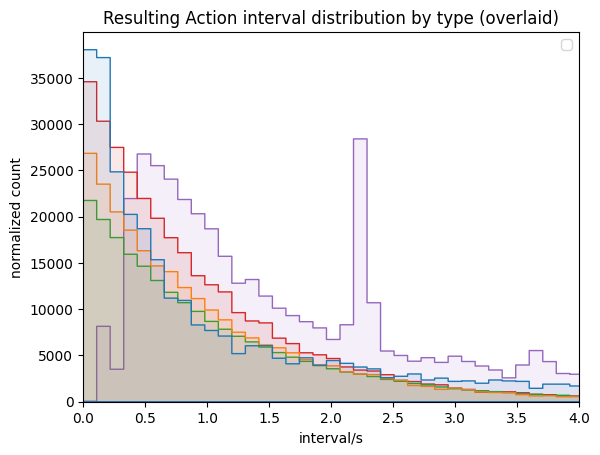

In [ ]:
from typing import List, Tuple
from analysis.lib.motionevent_classes import FingerEvent
from analysis.processing.interval_extract import build_intervals_dataframe, faking_intervals_between_gestures
import seaborn as sns

from analysis.lib.gesture_log_reader_utils import ranged_batched_modified_generator_with_session_timestamp

def execute_faked_interval_of_participants():
    fake_ranged_generator: Callable[[List[str], Optional[List[int]], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[SessionType]] = partial(
        ranged_batched_modified_generator_with_session_timestamp,
        formated_data_timestamps=formated_data_timestamps,
        filtering_and_modification_function=partial(
            faking_intervals_between_gestures,
            target_expected_interval_us=int(1e6 * 1.1),
        )
    )

    ui_tars_list = ['ui-tars no humanity', 'ui-tars available humanity']
    
    all_agents_list = non_humanized_agents + humanized_agents
    mobile_agent_e_list = [
        'Mobile-agent-e gpt-4o available humanity',
        'Mobile-agent-e claude-sonnet-3.7 available humanity',
        'gpt4o no humanity',
        'claude no humanity',
    ]
    cpm_gui_agent_list = ['cpm_gui_agent raw', 'cpm_gui_agent available humanity']

    ranged_raw_generator_with_session_timestamp:  Callable[[List[str], Optional[List[int]], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[SessionType]] = partial(ranged_batched_modified_generator_with_session_timestamp, formated_data_timestamps=formated_data_timestamps, filtering_and_modification_function=None)

    generator_list: List[Tuple[str, List[SessionType]]] = [
        ("Humans", ranged_raw_generator_with_session_timestamp(participants=humans)), # PASTBUG: wrote fake generator
        # ("ui_tars_no_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[0]])), ("ui_tars_available_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[1]])),
        ("ui-tars", fake_ranged_generator(participants=ui_tars_list)),
        ("mobile-agent-e", fake_ranged_generator(participants=mobile_agent_e_list)),
        ("cpm_gui_agent", fake_ranged_generator(participants=cpm_gui_agent_list)),
        ("fake_rot_tap_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=fake_rot_tap_humanized_agents)),
    ]
    """
        for name, gen in generator_list:
            print(f"Generator {name} prepared. Length is {len(gen)}")
            for swipe in gen:
                print("asdf")
                print(swipe)
                print(swipe[:1], swipe[-1:])
        """
    duration_df = build_intervals_dataframe(generator_list)
    duration_df["interval_us"] /= 1e6
    weights = {
        "Humans": 50, 
        "ui-tars": 10,
        "mobile-agent-e": 1,
        "cpm_gui_agent": 10,
        "fake_rot_tap_humanized_agents": 10,
    }
    rename_labels = {
        "Humans": "original Human",
        "ui-tars": "UI-Tars with fake actions",
        "mobile-agent-e": "Mobile-Agent-E with fake actions",
        "cpm_gui_agent": "AgentCPM-GUI with fake actions",
        "fake_rot_tap_humanized_agents": "Fake-Rot-Tap-Humanized Agents",
    }

    ax = sns.histplot(data=duration_df, x="interval_us", hue="type", bins=1000, element="step", alpha=0.1, fill=True,
                      # make humans count twice as mobile agents 
            weights=duration_df["type"].apply(lambda t: weights.get(t, 1))
# apply the rename labels to legend
            )
    ax.legend(title='Participant Type', labels=[rename_labels.get(label.get_text(), label.get_text()) for label in ax.get_legend().get_texts()])
    ax.set_xlabel("interval/s")
    ax.set_ylabel("normalized count")
    ax.set_title("Resulting Action interval distribution by type (overlaid)")
    ax.set_ylim(None, None)
    ax.set_xlim(0, 4)
    ax.legend(loc='upper right')
    
execute_faked_interval_of_participants()

### Calculate accuracy

In [ ]:
from typing import List, Tuple
from analysis.lib.motionevent_classes import FingerEvent
from analysis.processing.interval_extract import build_intervals_dataframe
from analysis.lib.gesture_log_reader_utils import ranged_batched_modified_generator_with_session_timestamp
from analysis.lib.motionevent_classes import SessionType
from analysis.processing.calculate_roc_auc_from_feature import compute_acc_per_feature_using_break_even_point as compute_acc_per_feature
from analysis.processing.calculate_roc_auc_from_feature import ThresholdPosterior
from analysis.processing.interval_extract import build_intervals_dataframe, faking_intervals_between_gestures

import seaborn as sns
def execute_interval_of_participants_per_index(index_range: Optional[List[int]] = None) -> pd.DataFrame:
    """
    Docstring for execute_interval_of_participants_per_index
    
    :param index_range: Description
    :type index_range: Optional[List[int]]
    :return: A dataframe containing the intervals of participants per index in seconds not microseconds
    :rtype: Any
    """    

    fake_ranged_generator: Callable[[List[str], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[SessionType]] = partial(
        ranged_batched_modified_generator_with_session_timestamp,
        formated_data_timestamps=formated_data_timestamps,
        filtering_and_modification_function=partial(
            faking_intervals_between_gestures,
            target_expected_interval_us=int(1e6 * 1.1),
        ),
        index_range=index_range
    )

    ui_tars_list = ['ui-tars no humanity', 'ui-tars available humanity']
    
    all_agents_list = non_humanized_agents + humanized_agents
    mobile_agent_e_list = [
        'Mobile-agent-e gpt-4o available humanity',
        'Mobile-agent-e claude-sonnet-3.7 available humanity',
        'gpt4o no humanity',
        'claude no humanity',
    ]
    cpm_gui_agent_list = ['cpm_gui_agent raw', 'cpm_gui_agent available humanity']

    ranged_raw_generator_with_session_timestamp:  Callable[[List[str], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]], List[SessionType]] = partial(ranged_batched_modified_generator_with_session_timestamp, formated_data_timestamps=formated_data_timestamps, index_range=index_range, filtering_and_modification_function=None)

    generator_list: List[Tuple[str, List[SessionType]]] = [
        ("Humans", ranged_raw_generator_with_session_timestamp(participants=humans)),
        # ("ui_tars_no_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[0]])), ("ui_tars_available_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[1]])),
        ("non_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=non_humanized_agents)),
        ("humanized_agents", ranged_raw_generator_with_session_timestamp(participants=humanized_agents)),
        ("non_humanized_agents_fake", fake_ranged_generator(participants=non_humanized_agents)),
        ("humanized_agents_fake", fake_ranged_generator(participants=humanized_agents)),
        ("rot_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=rot_humanized_agents)),
        ("fake_rot_tap_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=fake_rot_tap_humanized_agents)),
    ]
    duration_df = build_intervals_dataframe(generator_list)
    if True:
        duration_df["interval_us"] /= 1e6
        # convert to log scale
        # duration_df["interval_us"] = duration_df["interval_us"].apply(lambda x: np.log10(x) if x > 0 else None)
    # calculate the 
    return duration_df


# build a dataframe 
"""

| task cluster | raw accuracy | humanized accuracy | raw_fake_accuracy | humanized_fake_accuracy |
| ------------ | ------------ | ------------------ | ----------------- | ----------------------- |
| 0            |              |                    |                   |                         |
| 1            |              |                    |                   |                         |
| 2            |              |                    |                   |                         |
| 3            |              |                    |                   |                         |
| 4            |              |                    |                   |                         |


"""

def calculate_interval_accuracies_per_task_cluster() -> Tuple[pd.DataFrame, Dict[int, ThresholdPosterior]]:
    """
    Docstring for calculate_interval_accuracies_per_task_cluster

    :return: A tuple containing a dataframe of accuracies per task cluster and a dictionary of humanity classifiers across clusters in microseconds
    """

    result_interval = pd.DataFrame(columns=["task_cluster", "raw_accuracy", "humanized_accuracy"])

    humanity_classifier_across_clusters: Dict[int, ThresholdPosterior] = {}
    for cluster_idx, task_list in enumerate(task_clusters):
        duration_df = execute_interval_of_participants_per_index(index_range=task_list)

        # duration_df.to_csv(f"results1220/intervals_task_cluster_{cluster_idx}.csv", index=False)

        accuracy_raw, _ = compute_acc_per_feature(duration_df, pos_label="non_humanized_agents", neg_label="Humans", plot_plt=True)

        accuracy_online_humanity, online_humanity_classifier = compute_acc_per_feature(duration_df, pos_label="humanized_agents", neg_label="Humans", plot_plt=True)
        online_humanity_classifier = online_humanity_classifier["interval_us"]
        # this classifier is in seconds, convert to microseconds
        online_humanity_classifier["threshold"] *= 1e6  # convert to microseconds
        humanity_classifier_across_clusters[cluster_idx] = online_humanity_classifier

        accuracy_fake_raw, _ = compute_acc_per_feature(duration_df, pos_label="non_humanized_agents_fake", neg_label="Humans", plot_plt=True)

        accuracy_fake_humanized, _ = compute_acc_per_feature(duration_df, pos_label="humanized_agents_fake", neg_label="Humans", plot_plt=True)

        accuracy_rot_humanized, _ = compute_acc_per_feature(duration_df, pos_label="rot_humanized_agents", neg_label="Humans", plot_plt=True)
        accuracy_fake_rot_tap_humanized, _ = compute_acc_per_feature(duration_df, pos_label="fake_rot_tap_humanized_agents", neg_label="Humans", plot_plt=True)

        result_interval = pd.concat([
            result_interval, pd.DataFrame({
                "task_cluster": [cluster_idx],
                "raw_accuracy": [accuracy_raw.loc[0, "acc"] if not accuracy_raw.empty else None],
                "humanized_accuracy": [accuracy_online_humanity.loc[0, "acc"] if not accuracy_online_humanity.empty else None],
                "raw_fake_accuracy": [accuracy_fake_raw.loc[0, "acc"] if not accuracy_fake_raw.empty else None],
                "humanized_fake_accuracy": [accuracy_fake_humanized.loc[0, "acc"] if not accuracy_fake_humanized.empty else None],
                "rot_humanized_accuracy": [accuracy_rot_humanized.loc[0, "acc"] if not accuracy_rot_humanized.empty else None],
                "fake_rot_tap_humanized_accuracy": [accuracy_fake_rot_tap_humanized.loc[0, "acc"] if not accuracy_fake_rot_tap_humanized.empty else None],
            })
        ], ignore_index=True)
    
    result_interval.to_csv("results0125/interval_based_accuracies_per_task_cluster.csv", index=False)

    return result_interval, humanity_classifier_across_clusters

result_interval_df, interval_classifier_microseconds_across_clusters = calculate_interval_accuracies_per_task_cluster()

In [50]:
for col in result_interval_df.columns[1:]:
    result_interval_df[col] = result_interval_df[col].astype(float)
    result_interval_df[col] = result_interval_df[col].apply(lambda x: max(x, 1 - x) if pd.notna(x) else x)

In [67]:
result_interval_df

task_cluster  raw_accuracy  humanized_accuracy  raw_fake_accuracy  \
0            0      0.883805            0.879850           0.527469   
1            1      0.905614            0.896925           0.507910   
2            2      0.918649            0.912035           0.522752   
3            3      0.799750            0.804738           0.570397   
4            4      0.874381            0.880342           0.516786   

   humanized_fake_accuracy  rot_humanized_accuracy  \
0                 0.527463                0.906005   
1                 0.509707                0.919639   
2                 0.519208                0.911290   
3                 0.570407                0.864040   
4                 0.518252                0.896739   

   fake_rot_tap_humanized_accuracy  
0                         0.599929  
1                         0.571837  
2                         0.562139  
3                         0.501104  
4                         0.560619

In [51]:
result_interval_df

task_cluster  raw_accuracy  humanized_accuracy  raw_fake_accuracy  \
0            0      0.883805            0.879850           0.527449   
1            1      0.905614            0.896925           0.508411   
2            2      0.918649            0.912035           0.520315   
3            3      0.799750            0.804738           0.570400   
4            4      0.874381            0.880342           0.518258   

   humanized_fake_accuracy  rot_humanized_accuracy  \
0                 0.527454                0.906005   
1                 0.510562                0.919639   
2                 0.520886                0.911290   
3                 0.571839                0.864040   
4                 0.518232                0.896739   

   fake_rot_tap_humanized_accuracy  
0                         0.599929  
1                         0.571837  
2                         0.562139  
3                         0.501104  
4                         0.560619

In [53]:
result_interval_df

# copy into another df
result_interval_df_copy = result_interval_df.copy()

# set column raw_fake_accuracy and humanized_fake_accuracy to 0.5
# result_interval_df_copy.loc[:, "raw_fake_accuracy"] = 0.5
# result_interval_df_copy.loc[:, "humanized_fake_accuracy"] = 0.5

In [55]:
interval_humanity_mapper = {
    "raw_accuracy": [1, 3, 4, 9, 11, 15, ],
    "humanized_accuracy": [2, 5, 6, ],
    "raw_fake_accuracy": [7, 10, 12, 13, 14, 16],
    "humanized_fake_accuracy": [8, ],
    "rot_humanized_accuracy": [5,],
    "fake_rot_tap_humanized_accuracy": [16,]
}


# initialize a column dataframe
columns = pd.DataFrame(columns=["interval"], index=range(16 * 5))

# for each cluster, 
for cluster_idx in range(5):
    for key, cluster_list in interval_humanity_mapper.items():
        for interval_idx in cluster_list:
            row_idx = cluster_idx * 16 + (interval_idx - 1)
            columns.loc[row_idx, "interval"] = result_interval_df_copy.loc[cluster_idx, key]

columns.T


0        1         2         3         4        5         6   \
interval  0.883805  0.87985  0.883805  0.883805  0.906005  0.87985  0.527449   

                7         8         9   ...        70        71        72  \
interval  0.527454  0.883805  0.527449  ...  0.518258  0.518232  0.874381   

                73        74        75        76        77        78        79  
interval  0.518258  0.874381  0.518258  0.518258  0.518258  0.874381  0.560619  

[1 rows x 80 columns]

## swipe vs taps

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under lo

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_20251201_202546_problematic.log' found under logs
No file named 'gesture_recording_20251201_202546_problematic.log' found under logs
No file named 'gesture_recording__switch_app.log' found under logs
No file named 'gesture_recording__switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_20251201_202819_problematic.log' found under logs
No file named 'gesture_recording_20251201_202819_problematic.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No 

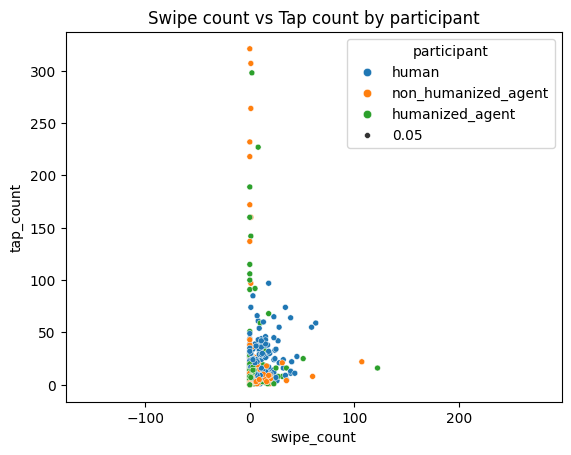

In [27]:
from typing import List, Tuple
import seaborn as sns
def execute_swipe_vs_tap_individual_participants():
    all_participants = humans + non_humanized_agents + humanized_agents
    result: List[Tuple[str, int, int]] = []
    for task in range(TASK_COUNT):
        for participant in all_participants:
            swipe_generator = ranged_swipe_generator(participants=[participant], index_range=[task])
            tap_generator = ranged_tap_generator(participants=[participant], index_range=[task])
            swipe_count = len(swipe_generator)
            tap_count = len(tap_generator)

            if participant in humans:
                participant_group_namer = "human"
            elif participant in non_humanized_agents:
                participant_group_namer = "non_humanized_agent"
            else:
                participant_group_namer = "humanized_agent" 

            result.append((participant_group_namer, swipe_count, tap_count))
    df_result = pd.DataFrame(result, columns=["participant", "swipe_count", "tap_count"])
    ax = sns.scatterplot(data=df_result, x="swipe_count", y="tap_count", hue="participant", alpha=1.0, size=0.05)
    ax.set_xlabel("swipe_count")
    ax.set_ylabel("tap_count")
    ax.set_title("Swipe count vs Tap count by participant")
    ax.set_xlim(None, None)
    ax.set_ylim(None, None)
    ax.set_aspect('equal', adjustable='datalim')
    return df_result
swipe_vs_tap_result = execute_swipe_vs_tap_individual_participants()


In [25]:
swipe_vs_tap_result

participant  swipe_count  tap_count
0                   human           18         15
1                   human           40         22
2                   human            8         15
3     non_humanized_agent           15          6
4     non_humanized_agent            0          0
...                   ...          ...        ...
1039  non_humanized_agent            0          0
1040  non_humanized_agent            0          0
1041      humanized_agent            0          0
1042      humanized_agent            4         14
1043      humanized_agent            3         14

[1044 rows x 3 columns]

## human duration vs length for filtering

In [ ]:

from analysis.processing.tap_duration_extract import _gesture_start_end_us
def execute_human_duration_vs_length_filtering():
    # plot x=len(List[FingerEvent]), y=tap_duration_extract._gesture_start_end_us(List[FingerEvent]) for humans
    human_generator = ranged_raw_generator(participants=humans)
    points: List[Tuple[int, int]] = []
    for gesture in human_generator:
        start_us, end_us = _gesture_start_end_us(gesture)
        length = len(gesture)
        points.append((length, end_us - start_us))

    df_points = pd.DataFrame(points, columns=["length", "duration_us"])
    ax = sns.scatterplot(data=df_points, x="length", y="duration_us", alpha=0.3)
    ax.set_xlabel("length (number of FingerEvent)")
    ax.set_ylabel("duration_us")
    ax.set_title("Human gesture length vs duration")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 0.3 * 1e6)
execute_human_duration_vs_length_filtering()


NameError: name 'ranged_raw_generator' is not defined

In [ ]:
def countdown(n):
   while n > 0:
       yield n
       n -= 1
# Using the generator
gen = countdown(5)
for value in gen:
   print(value)
for value in gen:
   print(value)

5
4
3
2
1


In [ ]:
a = (range(10))
for i in a:
    print(i)
for i in a:
    print(i)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


## Success rate

In [19]:
online_humanized_correctness = formated_data_timestamps.columns[11]
RAW_correctness = formated_data_timestamps.columns[18]
only_swipe_correctness = formated_data_timestamps.columns[27]
fake_rot_tap_correctness = formated_data_timestamps.columns[32]
online_humanized_correctness, RAW_correctness, only_swipe_correctness, fake_rot_tap_correctness

('Online humanity best effort count',
 'No humanity Best effort count',
 'only swipe success rate',
 'rot_tap_fake success rate')

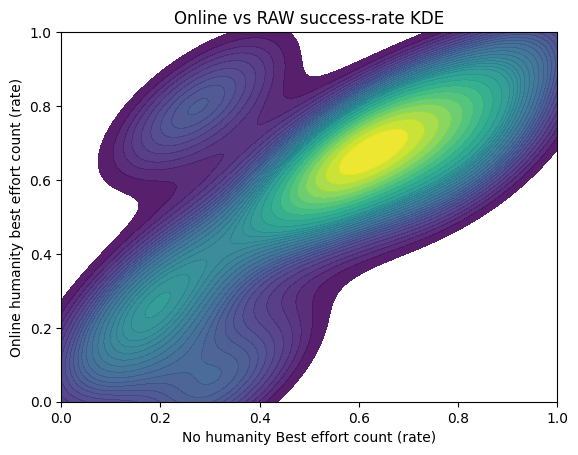

In [20]:
import re
import seaborn as sns

def _parse_ratio_to_tuple(text: str) -> Optional[Tuple[float, float]]:
    if text is None:
        return None
    s = str(text).strip()
    # find the first "num/den" like 1.5/3, 0/2, possibly with extra text/newlines
    m = re.search(r'([0-9]+(?:\.[0-9]+)?)\s*/\s*([0-9]+(?:\.[0-9]+)?)', s)
    if not m:
        return None
    num = float(m.group(1))
    den = float(m.group(2))
    if den == 0:
        return None
    return (num, den)

def build_success_rate_pairs(df: pd.DataFrame, col_names: List[str]):
    pairs: List[Tuple[Tuple[float, float], ...]] = []
    rates: List[Tuple[float, ...]] = []
    for _, row in df.iterrows():
        list_tuples = [_parse_ratio_to_tuple(row.get(col_name)) for col_name in col_names]

        if any(p is None for p in list_tuples):
            continue
        
        list_tuples = [p for p in list_tuples if p is not None]

        pairs.append(tuple(list_tuples))

        rates.append(tuple(p[0] / p[1] for p in list_tuples))
    return pairs, rates

def plot_kde_success_rates(bw_adjust=0.8):
    extracted_pairs, rates_tuples = build_success_rate_pairs(
        formated_data_timestamps, [online_humanized_correctness, RAW_correctness, only_swipe_correctness, fake_rot_tap_correctness]
    )
    if not rates_tuples:
        print("No valid success-rate tuples found.")
        return extracted_pairs, rates_tuples

    # unpack for plotting: x=RAW, y=Online
    online_rates = [t[0] for t in rates_tuples]
    raw_rates = [t[1] for t in rates_tuples]

    ax = sns.kdeplot(
        x=raw_rates, y=online_rates,
        fill=True, cmap="viridis", levels=30, thresh=0.05,
        bw_adjust=bw_adjust, clip=((0, 1), (0, 1)), alpha=0.9
    )
    # optional scatter overlay for reference
    # sns.scatterplot(x=raw_rates, y=online_rates, s=10, alpha=0.25, color="black", ax=ax)

    ax.set_xlabel(f"{RAW_correctness} (rate)")
    ax.set_ylabel(f"{online_humanized_correctness} (rate)")
    ax.set_title("Online vs RAW success-rate KDE")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return extracted_pairs, rates_tuples



# Run with adjustable kernel size (smaller -> more detail, larger -> smoother)
extracted_pairs, rates_tuples = plot_kde_success_rates(bw_adjust=0.8)



In [21]:
extracted_pairs, rates_tuples

([((2.6, 4.0), (3.3, 4.0), (1.5, 2.0), (1.5, 2.0)),
  ((0.6, 4.0), (0.6, 4.0), (1.4, 2.0), (0.6, 4.0)),
  ((0.2, 4.0), (1.3, 4.0), (1.3, 4.0), (1.7, 4.0)),
  ((3.2, 4.0), (1.1, 4.0), (1.9, 2.0), (1.2, 2.0)),
  ((2.5, 4.0), (2.1, 4.0), (1.0, 2.0), (0.0, 2.0)),
  ((2.5, 4.0), (2.5, 4.0), (2.0, 2.0), (1.0, 2.0)),
  ((1.35, 4.0), (0.8, 4.0), (0.4, 2.0), (0.5, 2.0)),
  ((2.9, 4.0), (2.5, 4.0), (1.6, 2.0), (1.2, 2.0)),
  ((3.5, 4.0), (3.5, 4.0), (2.0, 2.0), (0.6, 2.0))],
 [(0.65, 0.825, 0.75, 0.75),
  (0.15, 0.15, 0.7, 0.15),
  (0.05, 0.325, 0.325, 0.425),
  (0.8, 0.275, 0.95, 0.6),
  (0.625, 0.525, 0.5, 0.0),
  (0.625, 0.625, 1.0, 0.5),
  (0.3375, 0.2, 0.2, 0.25),
  (0.725, 0.625, 0.8, 0.6),
  (0.875, 0.875, 1.0, 0.3)])

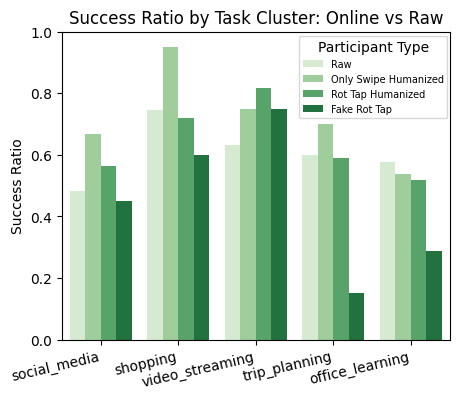

In [27]:


import matplotlib.pyplot as plt

cluster_names = list(task_cluster_by_name.keys())
cluster_plot_data = []



for i, indices in enumerate(task_clusters):
    name = cluster_names[i]
    for label, col in [("Raw", RAW_correctness),  ("Only Swipe Humanized", only_swipe_correctness), ("Rot Tap Humanized", online_humanized_correctness), ("Fake Rot Tap", fake_rot_tap_correctness)]:
        success_sum, total_sum = 0, 0
        for idx in indices:
            res = _parse_ratio_to_tuple(formated_data_timestamps.iloc[idx][col])
            if res:
                success_sum += res[0]
                total_sum += res[1]
        if total_sum > 0:
            cluster_plot_data.append({"Cluster": name, "Type": label, "Success Ratio": success_sum / total_sum, "idx": i})

df_cluster_stats = pd.DataFrame(cluster_plot_data)
plt.figure(figsize=(5, 4))
# choose a classy palette
sns.barplot(data=df_cluster_stats, x="Cluster", y="Success Ratio", hue="Type", palette="Greens")
plt.ylim(0, 1)
plt.title("Success Ratio by Task Cluster: Online vs Raw")
plt.ylabel("Success Ratio")
# rotate xlabel by 45 degrees and align right
plt.xticks(rotation=13, ha='right')

# make xlabel disappear
plt.xlabel("")

# make legend box smaller
plt.legend(title="Participant Type", bbox_to_anchor=(0.60, 1), loc='upper left', fontsize=7)


plt.show()


In [108]:
df_cluster_stats

Cluster                  Type  Success Ratio  idx
0      social_media                   Raw       0.483333    0
1      social_media     Rot Tap Humanized       0.562500    0
2      social_media  Only Swipe Humanized       0.666667    0
3      social_media          Fake Rot Tap       0.450000    0
4          shopping                   Raw       0.745161    1
5          shopping     Rot Tap Humanized       0.718182    1
6          shopping  Only Swipe Humanized       0.950000    1
7          shopping          Fake Rot Tap       0.600000    1
8   video_streaming                   Raw       0.633333    2
9   video_streaming     Rot Tap Humanized       0.815625    2
10  video_streaming  Only Swipe Humanized       0.750000    2
11  video_streaming          Fake Rot Tap       0.750000    2
12    trip_planning                   Raw       0.600000    3
13    trip_planning     Rot Tap Humanized       0.588889    3
14    trip_planning  Only Swipe Humanized       0.700000    3
15    trip_planning          Fake Rot Tap       0.150000    3
16  office_learning                   Raw       0.575000    4
17  office_learning     Rot Tap Humanized       0.516667    4
18  office_learning  Only Swipe Humanized       0.537500    4
19  office_learning          Fake Rot Tap       0.287500    4

In [112]:
# initialize a column dataframe

utility_humanity_mapper = {
    "Raw": [1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, ],
    "Rot Tap Humanized": [2, 6, 8, ],
    "Only Swipe Humanized": [5,],
    "Fake Rot Tap": [16,],
}

columns = pd.DataFrame(columns=["utility"], index=range(16 * 5))

# for each cluster, 
for cluster_idx in range(5):
    for key, cluster_list in utility_humanity_mapper.items():
        for interval_idx in cluster_list:
            row_idx = cluster_idx * 16 + (interval_idx - 1)

            # find the corresponding row in df_cluster_stats
            df_cluster_stats_row = df_cluster_stats[
                (df_cluster_stats["idx"] == cluster_idx) &
                (df_cluster_stats["Type"] == key)
            ]
            if df_cluster_stats_row.empty:
                continue    

            columns.loc[row_idx, "utility"] = df_cluster_stats_row["Success Ratio"].values[0]

columns.T

0       1         2         3         4       5         6   \
utility  0.483333  0.5625  0.483333  0.483333  0.666667  0.5625  0.483333   

             7         8         9   ...     70        71     72     73  \
utility  0.5625  0.483333  0.483333  ...  0.575  0.516667  0.575  0.575   

            74     75     76     77     78      79  
utility  0.575  0.575  0.575  0.575  0.575  0.2875  

[1 rows x 80 columns]

In [26]:
extracted_pairs, rates_tuples

([((1.0, 2.0), (1.0, 2.0)),
  ((1.0, 3.0), (2.0, 3.0)),
  ((0.0, 3.0), (0.0, 2.0)),
  ((3.0, 3.0), (2.0, 2.0)),
  ((3.0, 3.0), (3.0, 3.0)),
  ((3.0, 3.0), (3.0, 3.0)),
  ((1.5, 3.0), (2.0, 3.0)),
  ((3.0, 3.0), (3.0, 3.0)),
  ((2.0, 3.0), (3.0, 3.0)),
  ((3.0, 3.0), (3.0, 3.0)),
  ((2.0, 3.0), (1.5, 3.0)),
  ((2.5, 3.0), (2.5, 3.0)),
  ((1.5, 3.0), (1.0, 1.0)),
  ((3.0, 3.0), (2.0, 3.0)),
  ((1.0, 2.0), (2.0, 2.0)),
  ((3.0, 3.0), (2.0, 3.0)),
  ((3.0, 3.0), (2.0, 3.0)),
  ((2.5, 3.0), (2.0, 3.0)),
  ((3.0, 3.0), (0.0, 3.0)),
  ((3.0, 3.0), (3.0, 3.0)),
  ((2.5, 3.0), (2.0, 3.0)),
  ((1.0, 3.0), (0.0, 3.0)),
  ((2.5, 3.0), (2.0, 2.0)),
  ((1.0, 2.0), (2.0, 3.0)),
  ((2.0, 2.0), (2.5, 3.0)),
  ((0.2, 4.0), (1.3, 4.0)),
  ((2.5, 4.0), (2.1, 4.0)),
  ((2.5, 4.0), (2.5, 4.0)),
  ((1.35, 4.0), (0.8, 4.0)),
  ((2.9, 4.0), (2.5, 4.0)),
  ((3.5, 4.0), (3.5, 4.0))],
 [(0.5, 0.5),
  (0.3333333333333333, 0.6666666666666666),
  (0.0, 0.0),
  (1.0, 1.0),
  (1.0, 1.0),
  (1.0, 1.0),
  (0.5, 0.666666

In [27]:
sum_raw, sum_humanized = 0.0, 0.0
# calculate the average of online success rate and RAW success rate
for online_pair, raw_pair in extracted_pairs:
    online_rate = online_pair[0] / online_pair[1]
    raw_rate = raw_pair[0] / raw_pair[1]
    sum_raw += raw_rate
    sum_humanized += online_rate

average_raw = sum_raw / len(extracted_pairs)
average_humanized = sum_humanized / len(extracted_pairs)
average_raw, average_humanized

(0.6830645161290321, 0.7119623655913978)

## print table comparing all data

In [ ]:
from analysis.processing.extract_feature_of_swipes import build_features_dataframe

all_iterators = [
    ("humans", ranged_swipe_generator(participants=humans)),
    ("humanized_agents", ranged_swipe_generator(participants=humanized_agents)),
    ("non_humanized_agents", ranged_swipe_generator(participants=non_humanized_agents)),
    ("fake_humanized_agents", ranged_swipe_generator(participants=non_humanized_agents, humanity_disturbance=static_fit_effort_provider.humanity_disturbance)),
]
generator_all_iterators = all_iterators

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

In [30]:
features_df = build_features_dataframe(generator_all_iterators)

In [31]:
features_df.columns

Index(['type', 'duration', 'startX', 'startY', 'endX', 'endY', 'displacement',
       'meanResultantLength', 'direction', 'v20', 'v50', 'v80', 'a20', 'a50',
       'a80', 'v_last3_median', 'maxDevSigned', 'dev20', 'dev50', 'dev80',
       'avgDirection', 'length', 'ratio_end_to_length', 'speed',
       'acc_first5pct_median'],
      dtype='object')

In [34]:
features_df[["type", "maxDevSigned"]].to_csv("results0125/swipe_maxDevSigned_features.csv", index=False)

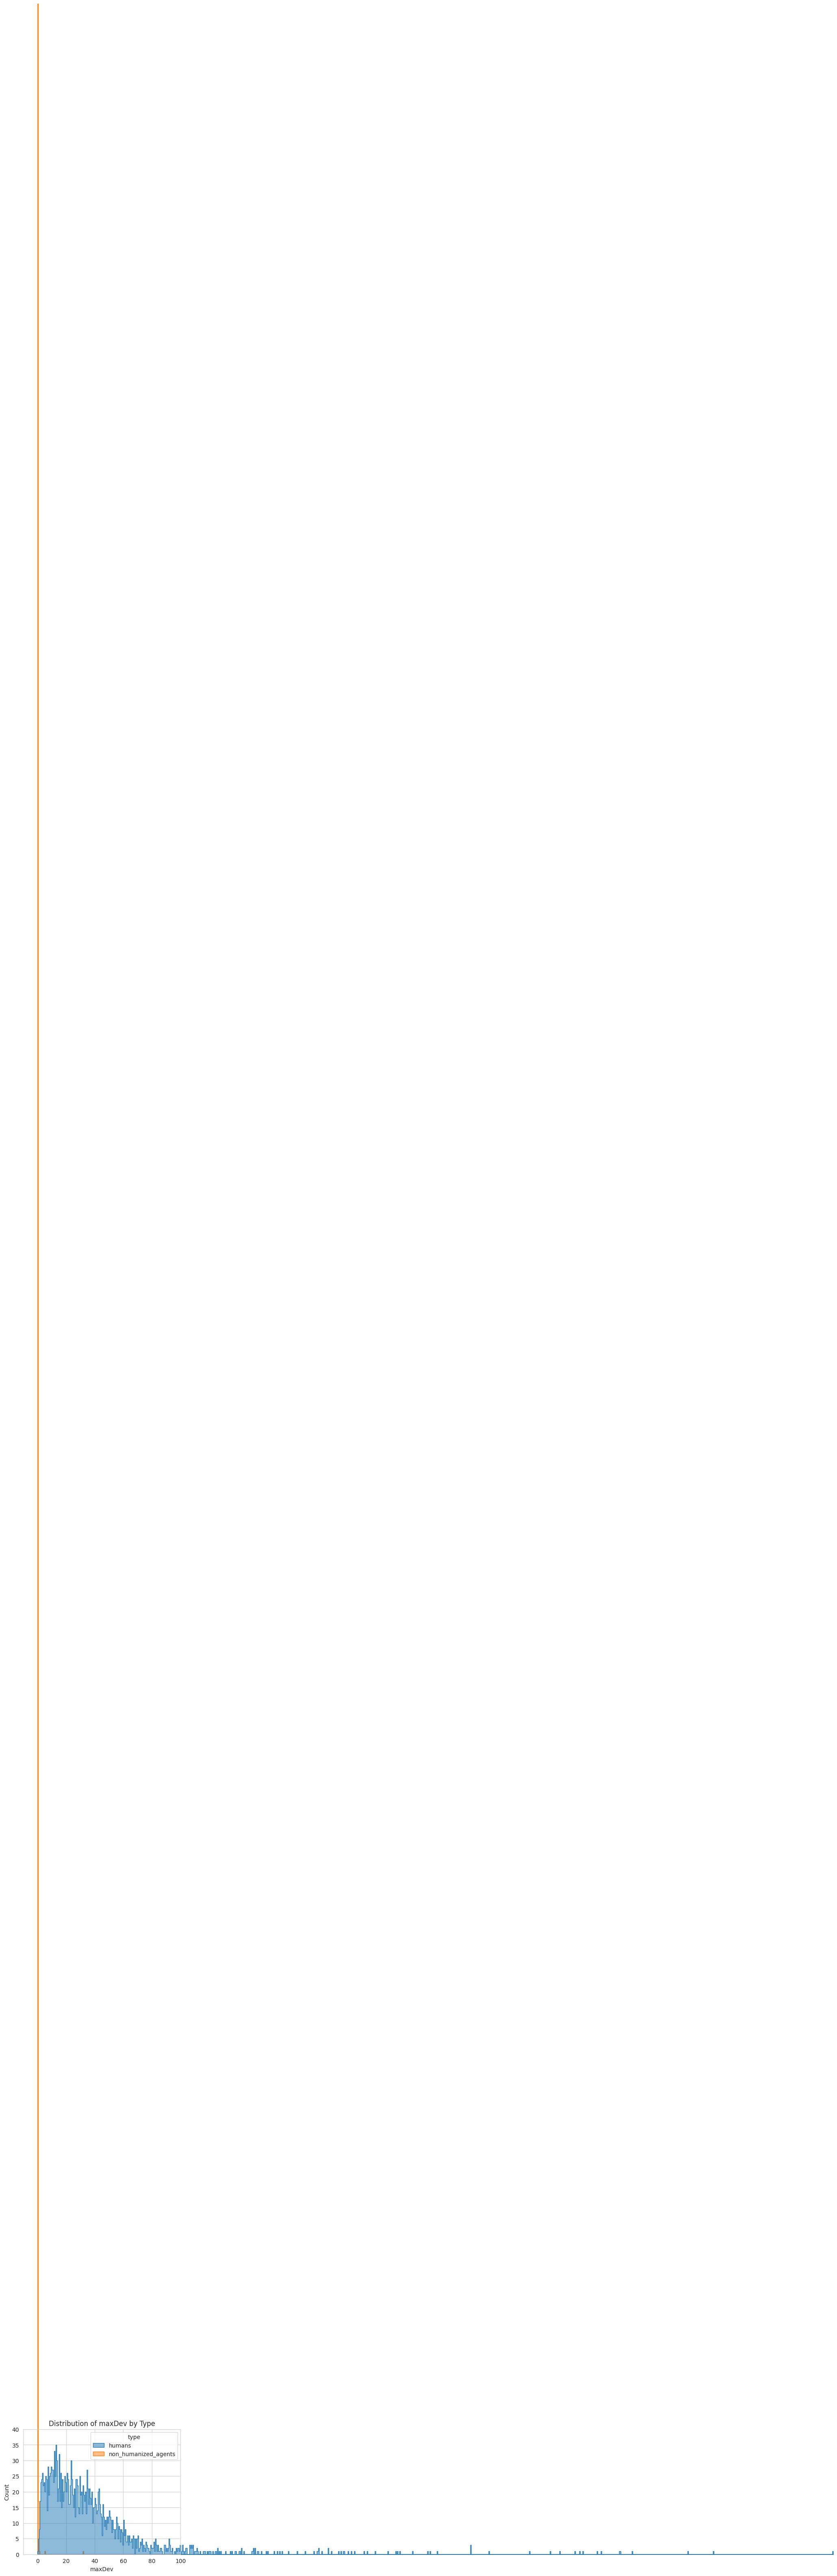

<Figure size 640x480 with 0 Axes>

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
ax = sns.histplot(data=features_df[(features_df["type"] == "humans") | (features_df["type"] == "non_humanized_agents")], x="maxDevSigned", hue="type", bins=1000, element="step", alpha=0.5, common_norm=False)
ax.set_title("Distribution of maxDev by Type")

# Disable clipping so the data can "poke out" of the defined ylim
for artist in ax.collections + ax.lines + ax.patches:
    artist.set_clip_on(False)

# Adjust xlim here to zoom into specific ranges
ax.set_xlabel("maxDev")
ax.set_xlim(-10, 100)
ax.set_ylim(0, 40)

plt.show()

# save the fig with cropping
plt.savefig("asdf.png", bbox_inches='tight', dpi=300)

In [ ]:
features_df.to_csv("results1202/labels_and_extracted_features.csv", index=False)

In [ ]:
import os
os.system("python analysis.processing.calculate_roc_auc_from_feature.py --csv results1202/labels_and_extracted_features.csv --pos_label non_humanized_agents --neg_label humans --out_csv results1202/each_feature_auc_1016_non_humanized_vs_human.csv")

             feature      auc  auc_oriented    n  n_pos  n_neg
 ratio_end_to_length 0.999605      0.999605 2587    401   2186
 meanResultantLength 0.999597      0.999597 2587    401   2186
        maxDevSigned 0.001643      0.998357 2587    401   2186
                 v80 0.043655      0.956345 2587    401   2186
                 v50 0.088251      0.911749 2587    401   2186
               speed 0.089223      0.910777 2587    401   2186
                 a20 0.898157      0.898157 2587    401   2186
                 a80 0.109136      0.890864 2587    401   2186
              length 0.129356      0.870644 2587    401   2186
acc_first5pct_median 0.138247      0.861753 2587    401   2186
        displacement 0.164458      0.835542 2587    401   2186
                 v20 0.242164      0.757836 2587    401   2186
            duration 0.724084      0.724084 2587    401   2186
                 a50 0.711681      0.711681 2587    401   2186
               dev80 0.333622      0.666378 2587    401

0

In [ ]:
import os
os.system("python analysis.processing.calculate_roc_auc_from_feature.py --csv results1202/labels_and_extracted_features.csv --pos_label humanized_agents --neg_label humans --out_csv results1202/each_feature_auc_1016_humanized_vs_human.csv")

             feature      auc  auc_oriented    n  n_pos  n_neg
                 a20 0.751038      0.751038 2728    542   2186
               dev80 0.278163      0.721837 2728    542   2186
                 a50 0.702718      0.702718 2728    542   2186
               dev50 0.308413      0.691587 2728    542   2186
               dev20 0.333509      0.666491 2728    542   2186
               speed 0.343298      0.656702 2728    542   2186
                 v80 0.346368      0.653632 2728    542   2186
        maxDevSigned 0.349153      0.650847 2728    542   2186
              length 0.368096      0.631904 2728    542   2186
                 v50 0.381340      0.618660 2728    542   2186
        displacement 0.403495      0.596505 2728    542   2186
                 v20 0.416950      0.583050 2728    542   2186
        avgDirection 0.438185      0.561815 2728    542   2186
 meanResultantLength 0.554680      0.554680 2728    542   2186
acc_first5pct_median 0.455203      0.544797 2728    542

0

In [ ]:
import os
os.system("python analysis.processing.calculate_roc_auc_from_feature.py --csv labels_and_extracted_features.csv --pos_label fake_humanized_agents --neg_label humans --out_csv each_feature_auc_1016_fake_humanized_agents_vs_human.csv")

                   feature      auc  auc_oriented    n  n_pos  n_neg
       speed_percentile_25 0.083344      0.916656 1007    108    899
    velocity_percentile_25 0.084755      0.915245 1007    108    899
       speed_percentile_50 0.135047      0.864953 1007    108    899
acceleration_percentile_25 0.144090      0.855910 1007    108    899
                    length 0.145172      0.854828 1007    108    899
    velocity_percentile_50 0.146222      0.853778 1007    108    899
              displacement 0.175123      0.824877 1007    108    899
                  max_devs 0.183409      0.816591 1007    108    899
       speed_percentile_75 0.201973      0.798027 1007    108    899
      initial_acceleration 0.208843      0.791157 1007    108    899
                  avg_devs 0.210110      0.789890 1007    108    899
             initial_speed 0.210862      0.789138 1007    108    899
          initial_velocity 0.211037      0.788963 1007    108    899
                 avg_acc_x 0.76792

0

## remove ui-tars

In [15]:
all_iterators = [
    ("humans", ranged_swipe_generator(humans, None)),
    ("humanized_agents", ranged_swipe_generator(humanized_agents[1:], None)),
    ("non_humanized_agents", ranged_swipe_generator(non_humanized_agents[1:], None)),
]
generator_all_iterators = (ited for ited in all_iterators)

In [16]:
build_features_dataframe(generator_all_iterators).to_csv("no_ui_tars_labels_and_extracted_features.csv", index=False)

No file named 'gesture_recording_20250924_132450.log' found under logs
No file named 'gesture_recording_20250924_135111.log' found under logs
No file named 'gesture_recording_20250924_135601.log' found under logs
No file named 'gesture_recording_20250924_141929.log' found under logs
No file named 'gesture_recording_20250924_142559.log' found under logs
No file named 'gesture_recording_20250924_143951.log' found under logs
No file named 'gesture_recording_20250924_145539.log' found under logs
No file named 'gesture_recording_20250924_151018.log' found under logs
No file named 'gesture_recording_20250924_152746.log' found under logs
No file named 'gesture_recording_20250924_154002.log' found under logs
No file named 'gesture_recording_20250924_154454.log' found under logs
No file named 'gesture_recording_20250924_155001.log' found under logs
No file named 'gesture_recording_20250924_161350.log' found under logs


In [ ]:
import os
os.system("python analysis.processing.calculate_roc_auc_from_feature.py --csv no_ui_tars_labels_and_extracted_features.csv --pos_label non_humanized_agents --neg_label humans")

                   feature      auc  auc_oriented   n  n_pos  n_neg
                  max_devs 0.018743      0.981257 919     20    899
                  avg_devs 0.020300      0.979700 919     20    899
        final_acceleration 0.926919      0.926919 919     20    899
      initial_acceleration 0.843548      0.843548 919     20    899
          initial_velocity 0.789933      0.789933 919     20    899
             initial_speed 0.789321      0.789321 919     20    899
               final_speed 0.773554      0.773554 919     20    899
            final_velocity 0.749388      0.749388 919     20    899
              displacement 0.722136      0.722136 919     20    899
                 25%_vel_x 0.694049      0.694049 919     20    899
                    startY 0.325445      0.674555 919     20    899
                 avg_vel_x 0.666852      0.666852 919     20    899
                    length 0.662291      0.662291 919     20    899
                 50%_vel_x 0.657564      0.65756

0

In [ ]:
import os
os.system("python analysis.processing.calculate_roc_auc_from_feature.py --csv no_ui_tars_labels_and_extracted_features.csv --pos_label humanized_agents --neg_label humans")

                   feature      auc  auc_oriented   n  n_pos  n_neg
                    startY 0.189441      0.810559 912     13    899
              displacement 0.804141      0.804141 912     13    899
                 50%_vel_x 0.797211      0.797211 912     13    899
                      endY 0.213956      0.786044 912     13    899
                    length 0.753487      0.753487 912     13    899
                 avg_acc_x 0.750578      0.750578 912     13    899
                 25%_acc_x 0.750492      0.750492 912     13    899
                 75%_vel_x 0.732609      0.732609 912     13    899
    velocity_percentile_50 0.689056      0.689056 912     13    899
       speed_percentile_50 0.688201      0.688201 912     13    899
                 50%_acc_y 0.682981      0.682981 912     13    899
    velocity_percentile_75 0.675622      0.675622 912     13    899
       speed_percentile_75 0.668948      0.668948 912     13    899
                 avg_vel_x 0.668007      0.66800

0

## previous final table

legacy code
```python
from analysis.processing.calculate_roc_auc_from_feature import filter_df, compute_auc_per_feature, numeric_feature_columns



def calculate_svm_and_xgboost(features_csv: pd.DataFrame, pos_label: str, neg_label: str):
    filtered = filter_df(df=features_csv, pos_label=pos_label, neg_label=neg_label)

    # compute svm and xgboost on the filtered data
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score
    # prepare features and labels
    feature_cols = numeric_feature_columns(filtered)
    X = (
        filtered.loc[:, feature_cols]
        .apply(pd.to_numeric, errors="coerce")
        .replace([float("inf"), float("-inf")], pd.NA)
        .fillna(0.0)
    )
    y = (filtered["type"].astype(str) == pos_label).astype(int)

    svm_acc, xgb_acc = None, None
    if not X.empty and y.nunique() == 2:
        if (y.value_counts().min() < 2):
            return {"svm_accuracy": None, "xgb_accuracy": None}
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        # ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
        
        
        # SVM with scaling
        svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", probability=False, random_state=42))
        svm_clf.fit(X_train, y_train)
        y_pred_svm = svm_clf.predict(X_test)
        svm_acc = accuracy_score(y_test, y_pred_svm)

        # XGBoost
        xgb_clf = XGBClassifier(
            n_estimators=200,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1.0,
            n_jobs=4,
            random_state=42,
            eval_metric="logloss",
        )
        xgb_clf.fit(X_train, y_train)
        y_pred_xgb = xgb_clf.predict(X_test)
        xgb_acc = accuracy_score(y_test, y_pred_xgb)

    return {"svm_accuracy": svm_acc, "xgb_accuracy": xgb_acc}



result_csv = pd.DataFrame()

for task in range(TASK_COUNT):
    task_specific_iterators = [
        ("humans", ranged_swipe_generator(humans, [task])),
        ("humanized_agents", ranged_swipe_generator(humanized_agents, [task])),
        ("non_humanized_agents", ranged_swipe_generator(non_humanized_agents, [task])),
    ]
    generator_task_specific_iterators = (ited for ited in task_specific_iterators)
    features_csv = build_features_dataframe(generator_task_specific_iterators)

    
        


    # non_humanized_agents_vs_humans
    filtered = filter_df(features_csv, "non_humanized_agents", "humans")
    res = compute_auc_per_feature(filtered, "non_humanized_agents", "humans")

    if not res.empty:
        res.set_index(keys="feature", inplace=True)
        auc_oriented = res[["auc_oriented"]] # use the named index as columns
        result_csv[[(task, "RAW")]] = auc_oriented
        clf_res_unhumanized = calculate_svm_and_xgboost(features_csv, "non_humanized_agents", "humans")
        print(clf_res_unhumanized)
        result_csv.loc["svm", [(task, "RAW")]] = clf_res_unhumanized["svm_accuracy"]
        result_csv.loc["xgboost", [(task, "RAW")]] = clf_res_unhumanized["xgb_accuracy"]

    # humanized_agents_vs_humans
    filtered = filter_df(features_csv, "humanized_agents", "humans")
    res = compute_auc_per_feature(filtered, "humanized_agents", "humans")

    if not res.empty:
        res.set_index(keys="feature", inplace=True)
        # print(res)
        auc_oriented = res[["auc_oriented"]] # use the named index as columns
        # print(auc_oriented)
        result_csv[[(task, "rotation_and_match")]] = auc_oriented
        # print(result_csv)
        clf_res = calculate_svm_and_xgboost(features_csv, "humanized_agents", "humans")
        print(clf_res)
        result_csv.loc["svm", [(task, "rotation_and_match")]] = clf_res["svm_accuracy"]
        result_csv.loc["xgboost", [(task, "rotation_and_match")]] = clf_res["xgb_accuracy"]
```

## construct final table

In [ ]:

from typing import List, Tuple
from analysis.processing.calculate_roc_auc_from_feature import make_feature_and_learner_table
result_csv = pd.DataFrame()



for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(non_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task_cluster)
    try:
        humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv_2 = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task_cluster)
        
    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )
result_csv.T.to_csv("results1220/final_auc_and_learner_results_1220.csv")




No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

In [ ]:

from typing import List, Tuple
from analysis.processing.calculate_roc_auc_from_feature import make_feature_and_learner_table
result_csv = pd.DataFrame()



for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(non_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task_cluster)
    try:
        humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv_2 = make_feature_and_learner_table(
            task_cluster_id=cluster_idx,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task_cluster)
        
    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )
result_csv.T.to_csv("results1220/final_auc_and_learner_results_1220.csv")




In [19]:
np.array(task_clusters, dtype=object)

array([list([89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 114, 115]),
       list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 35, 36, 37, 59, 60, 61, 62, 63, 64, 65, 66, 67, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
       list([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
       list([10, 11, 12, 13, 14, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 68, 69, 70, 71, 72, 73]),
       list([53, 54, 55, 56, 57, 58, 83, 84, 85, 86, 87, 88, 107, 108, 109])],
      dtype=object)

In [20]:
result_csv

(0, RAW)  (0, rotation_and_match)  \
feature                                                   
maxDevSigned          0.999723                 0.628307   
meanResultantLength   0.999507                 0.517656   
ratio_end_to_length   0.999476                 0.535521   
v80                   0.890533                 0.695781   
acc_first5pct_median  0.875586                 0.565469   
a80                   0.864984                 0.531354   
a20                   0.827724                 0.753385   
v50                   0.809942                 0.672135   
speed                 0.806953                 0.698229   
duration              0.760663                 0.555365   
dev80                 0.670673                 0.749271   
length                0.663955                 0.632552   
v20                   0.644446                 0.650104   
endY                  0.639731                 0.552917   
displacement          0.636495                 0.609531   
startY                0.634677                 0.555729   
a50                   0.633845                 0.699479   
startX                0.571669                 0.601771   
v_last3_median        0.564010                 0.570885   
endX                  0.563193                 0.529609   
dev50                 0.548293                 0.704609   
dev20                 0.548200                 0.682760   
avgDirection          0.519755                 0.594010   
direction             0.511680                 0.553411   
svm_accuracy          0.981651                 0.875000   
xgb_accuracy          1.000000                 0.977273   

                      (0, rotation_and_match_disturbance)  \
feature                                                     
maxDevSigned                                     0.679318   
meanResultantLength                              0.549957   
ratio_end_to_length                              0.526196   
v80                                              0.654709   
acc_first5pct_median                             0.551313   
a80                                              0.520063   
a20                                              0.728088   
v50                                              0.642443   
speed                                            0.663030   
duration                                         0.506071   
dev80                                            0.687592   
length                                           0.660873   
v20                                              0.603119   
endY                                             0.639731   
displacement                                     0.636495   
startY                                           0.634677   
a50                                              0.716408   
startX                                           0.571669   
v_last3_median                                   0.507520   
endX                                             0.563193   
dev50                                            0.643306   
dev20                                            0.612226   
avgDirection                                     0.590052   
direction                                        0.511680   
svm_accuracy                                     0.954128   
xgb_accuracy                                     0.935780   

                      (0, b_spline_disturbance)  (1, RAW)  \
feature                                                     
maxDevSigned                           0.891257  0.999983   
meanResultantLength                    0.719089  0.999949   
ratio_end_to_length                    0.567955  0.999940   
v80                                    0.882057  0.839786   
acc_first5pct_median                   0.872134  0.855438   
a80                                    0.758783  0.830448   
a20                                    0.759831  0.879923   
v50                                    0.811329  0.667612   
speed                                  0.805874  0

In [21]:
result_coloring = pd.DataFrame(0, index=result_csv.index, columns=result_csv.columns)

added_value: List[Tuple[float, float, str, int]] = []

for cluster_idx, task_cluster in enumerate(task_clusters):
    # check whether (task, "RAW") is in result_csv columns
    if (cluster_idx, "RAW") not in result_csv.columns:
        print(f"Task {cluster_idx} with RAW method is missing in result_csv")
        continue
    else:
        print(f"exists: ", (cluster_idx, "RAW"))

    methods = ["rotation_and_match", "rotation_and_match_disturbance", "b_spline_disturbance"]
    # Iterate over each column and compare the values to "RAW". If any method has lower AUC than RAW, write a 1
    for method in methods:
        if (cluster_idx, method) not in result_csv.columns:
            print(f"Task {cluster_idx} with method {method} is missing in result_csv")
            continue
        for feature in result_csv.index:
            raw_value = result_csv.loc[feature, [(cluster_idx, "RAW")]].item()
            method_value = result_csv.loc[feature, [(cluster_idx, method)]].item()
            if pd.isna(raw_value) or pd.isna(method_value):
                continue
            if method_value < raw_value:
                # print(f"Task {task}, Feature {feature}, Method {method}: {method_value} < {raw_value}")
                result_coloring.loc[feature, [(cluster_idx, method)]] = 1
    
    for feature in result_csv.index:
        raw_value = result_csv.loc[feature, [(cluster_idx, "RAW")]].item()
        min_value = float('inf')
        for method in methods:
            if (cluster_idx, method) not in result_csv.columns:
                continue
            
            method_value = result_csv.loc[feature, [(cluster_idx, method)]].item()
            
            min_value = min(min_value, method_value)
        added_value.append((raw_value, raw_value - min_value, feature, cluster_idx))
result_coloring.T.to_csv("results1220/final_auc_and_learner_results_coloring_1220.csv")

exists:  (0, 'RAW')
exists:  (1, 'RAW')
exists:  (2, 'RAW')
exists:  (3, 'RAW')
exists:  (4, 'RAW')


Text(0.5, 1.0, 'AUC/acc decrease w.r.t to RAW method')

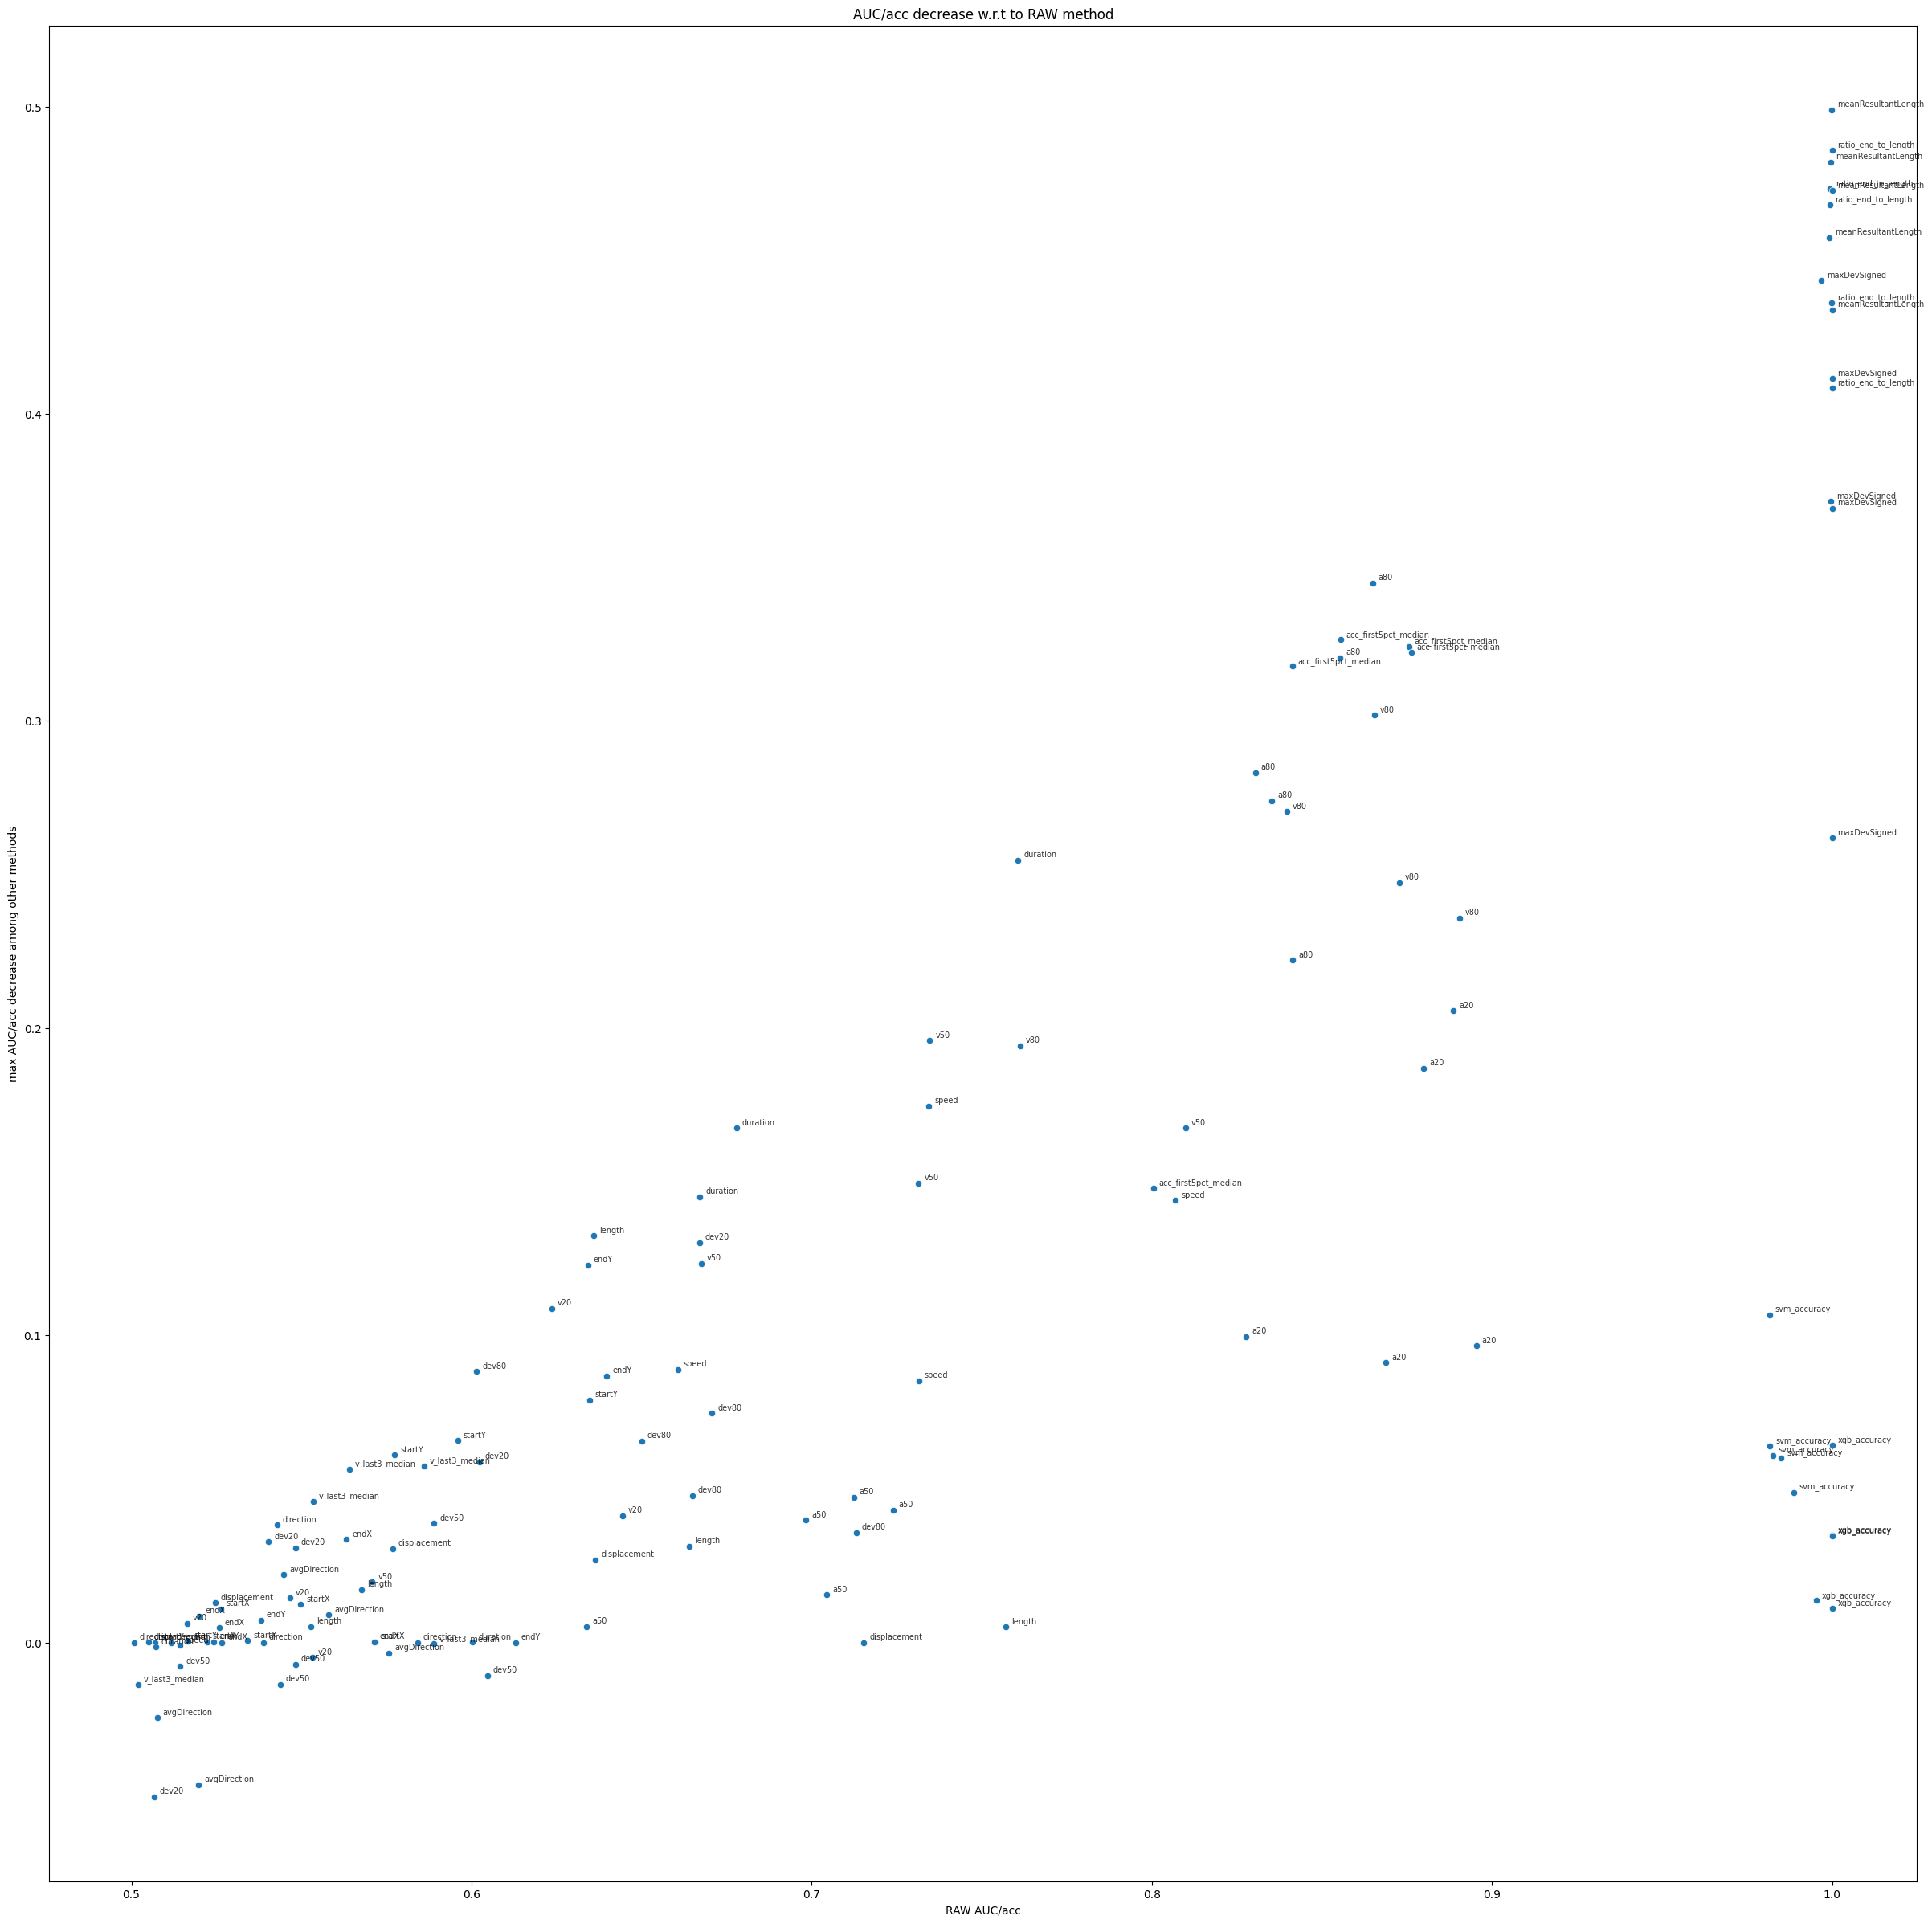

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 30))
# plot the scatterplot, with x as the first element of added_value, y as the second element of added_value and label each point with the third element of added_value
# label each point with the third element of added_value
ax = sns.scatterplot(x=[v[0] for v in added_value], y=[v[1] for v in added_value])
for x, y, label, cluster_idx in added_value:
    ax.annotate(str(label), (x, y), textcoords="offset points", xytext=(5, 3), ha="left", fontsize=7, alpha=0.8)
plt.xlabel("RAW AUC/acc")
plt.ylabel("max AUC/acc decrease among other methods")
plt.title("AUC/acc decrease w.r.t to RAW method")

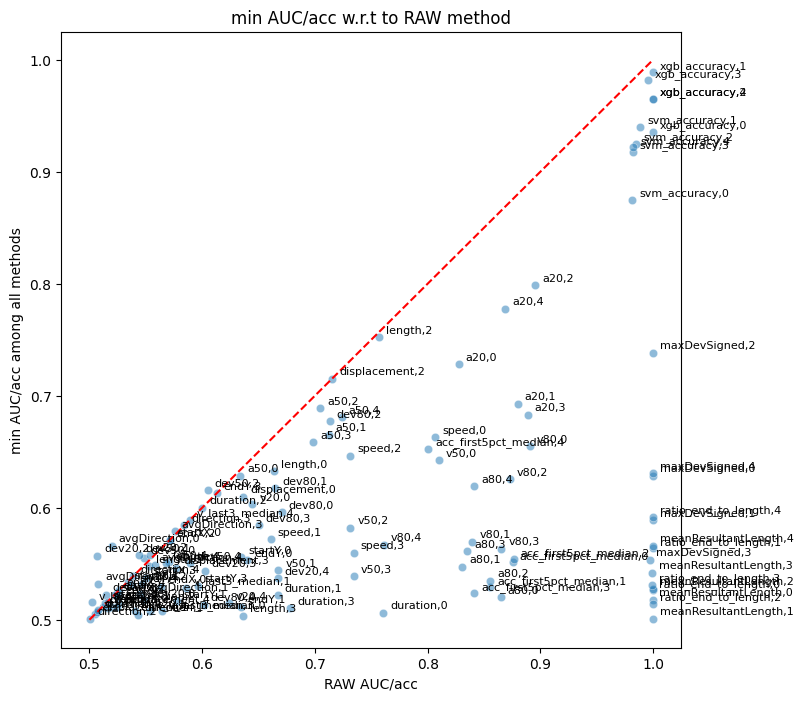

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
# plot the scatterplot, with x as the first element of added_value, y as the second element of added_value and label each point with the third element of added_value
# label each point with the third element of added_value
ax = sns.scatterplot(x=[v[0] for v in added_value], y=[v[0] - v[1] for v in added_value], alpha=0.5)
for x, y, label, cluster_idx in added_value:
    ax.annotate(str(label) + "," + str(cluster_idx), (x, x - y), textcoords="offset points", xytext=(5, 3), ha="left", fontsize=8, alpha=1)
plt.xlabel("RAW AUC/acc")
plt.ylabel("min AUC/acc among all methods")
plt.title("min AUC/acc w.r.t to RAW method")
# draw a diagonal line y=x
plt.plot([0.5, 1], [0.5, 1], color='red', linestyle='--')

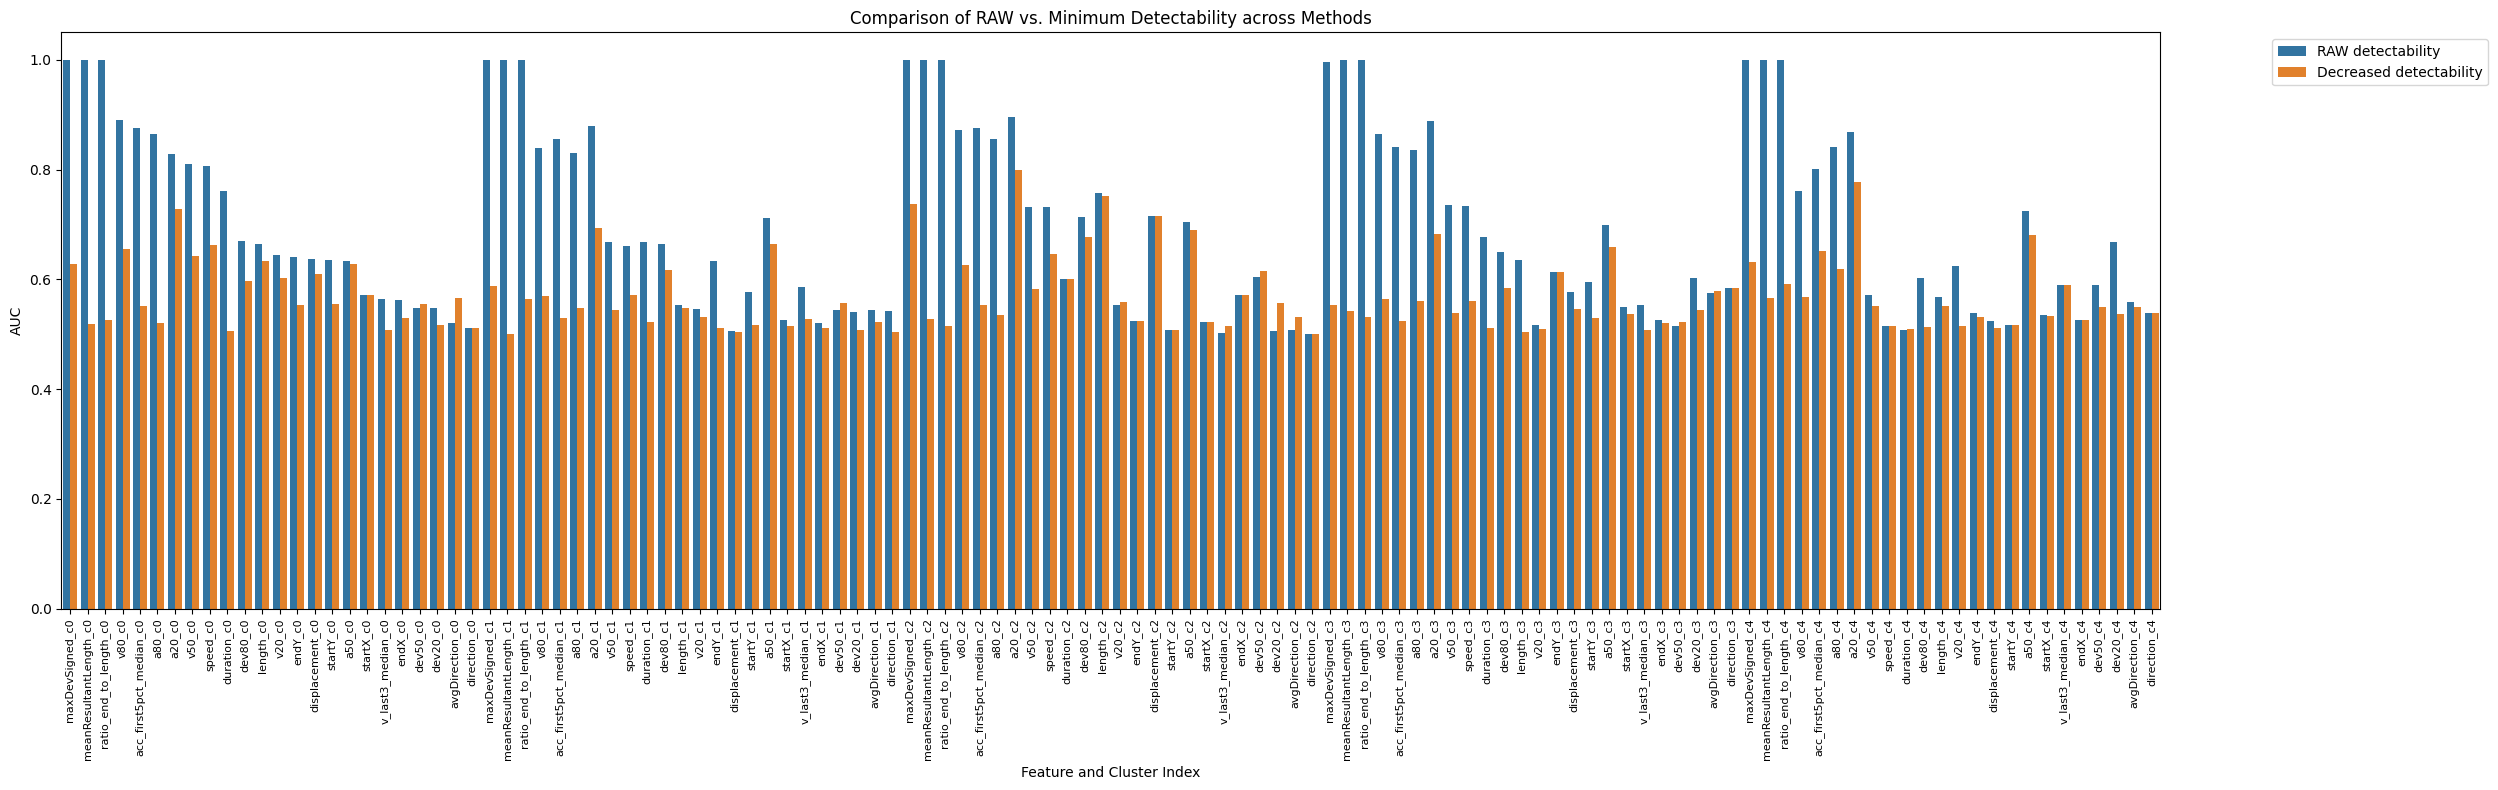

In [24]:
# Prepare the data for plotting
plot_data = []
for raw_val, diff, feature, cluster_idx in added_value:
    label = f"{feature}_c{cluster_idx}"
    # skip the heavy classifiers xgb_accuracy and svm_accuracy
    if (feature == "xgb_accuracy") or (feature == "svm_accuracy"):
        continue
    plot_data.append({"label": label, "Value": raw_val, "Type": "RAW detectability"})
    plot_data.append({"label": label, "Value": raw_val - diff, "Type": "Decreased detectability"})

df_plot = pd.DataFrame(plot_data)

# Create the paired bar plot
plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df_plot, x="label", y="Value", hue="Type")

plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Feature and Cluster Index")
plt.ylabel("AUC")
plt.title("Comparison of RAW vs. Minimum Detectability across Methods")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



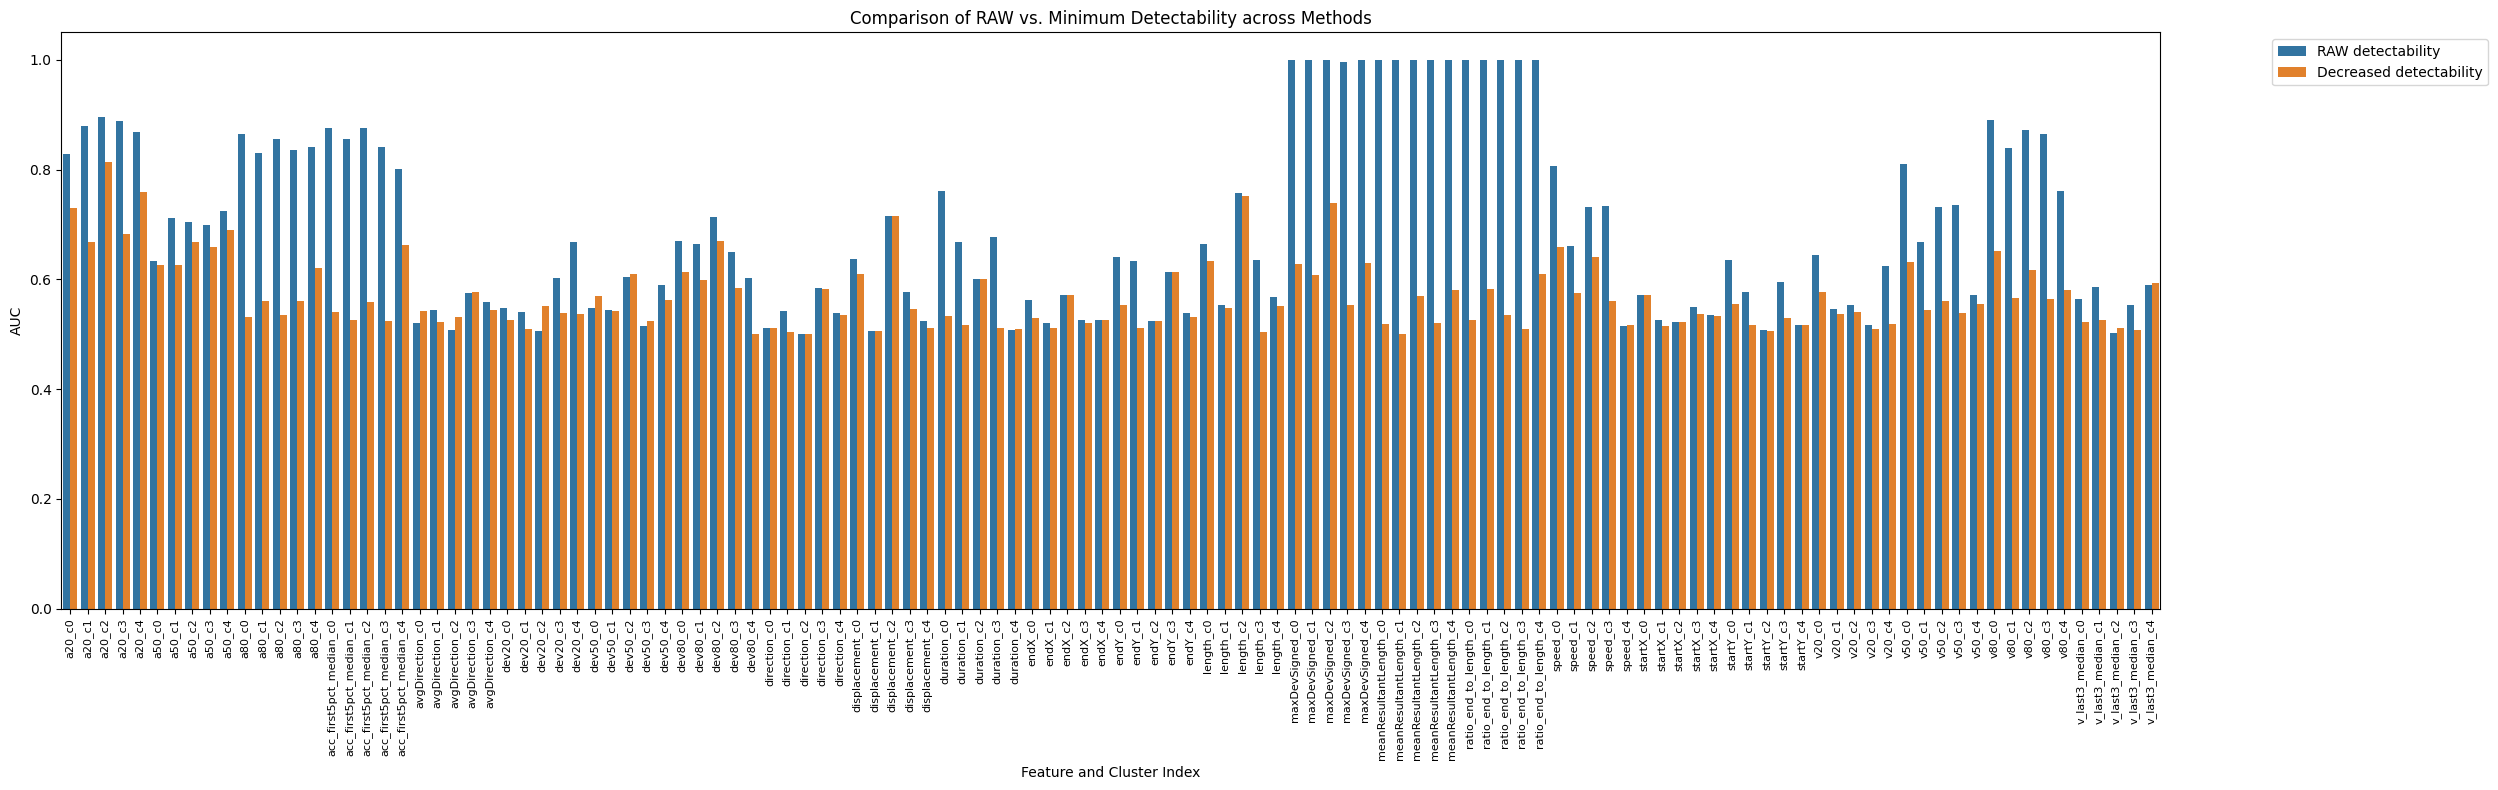

In [ ]:
# Prepare the data for plotting
plot_data = []
for raw_val, diff, feature, cluster_idx in added_value:
    label = f"{feature}_c{cluster_idx}"
    # skip the heavy classifiers xgb_accuracy and svm_accuracy
    if (feature == "xgb_accuracy") or (feature == "svm_accuracy"):
        continue
    plot_data.append({"label": label, "Value": raw_val, "Type": "RAW detectability"})
    plot_data.append({"label": label, "Value": raw_val - diff, "Type": "Decreased detectability"})
# sort plot_data by label
plot_data.sort(key=lambda x: x["label"])

df_plot = pd.DataFrame(plot_data)

# Create the paired bar plot
plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df_plot, x="label", y="Value", hue="Type")

plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Feature and Cluster Index")
plt.ylabel("AUC")
plt.title("Comparison of RAW vs. Minimum Detectability across Methods")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



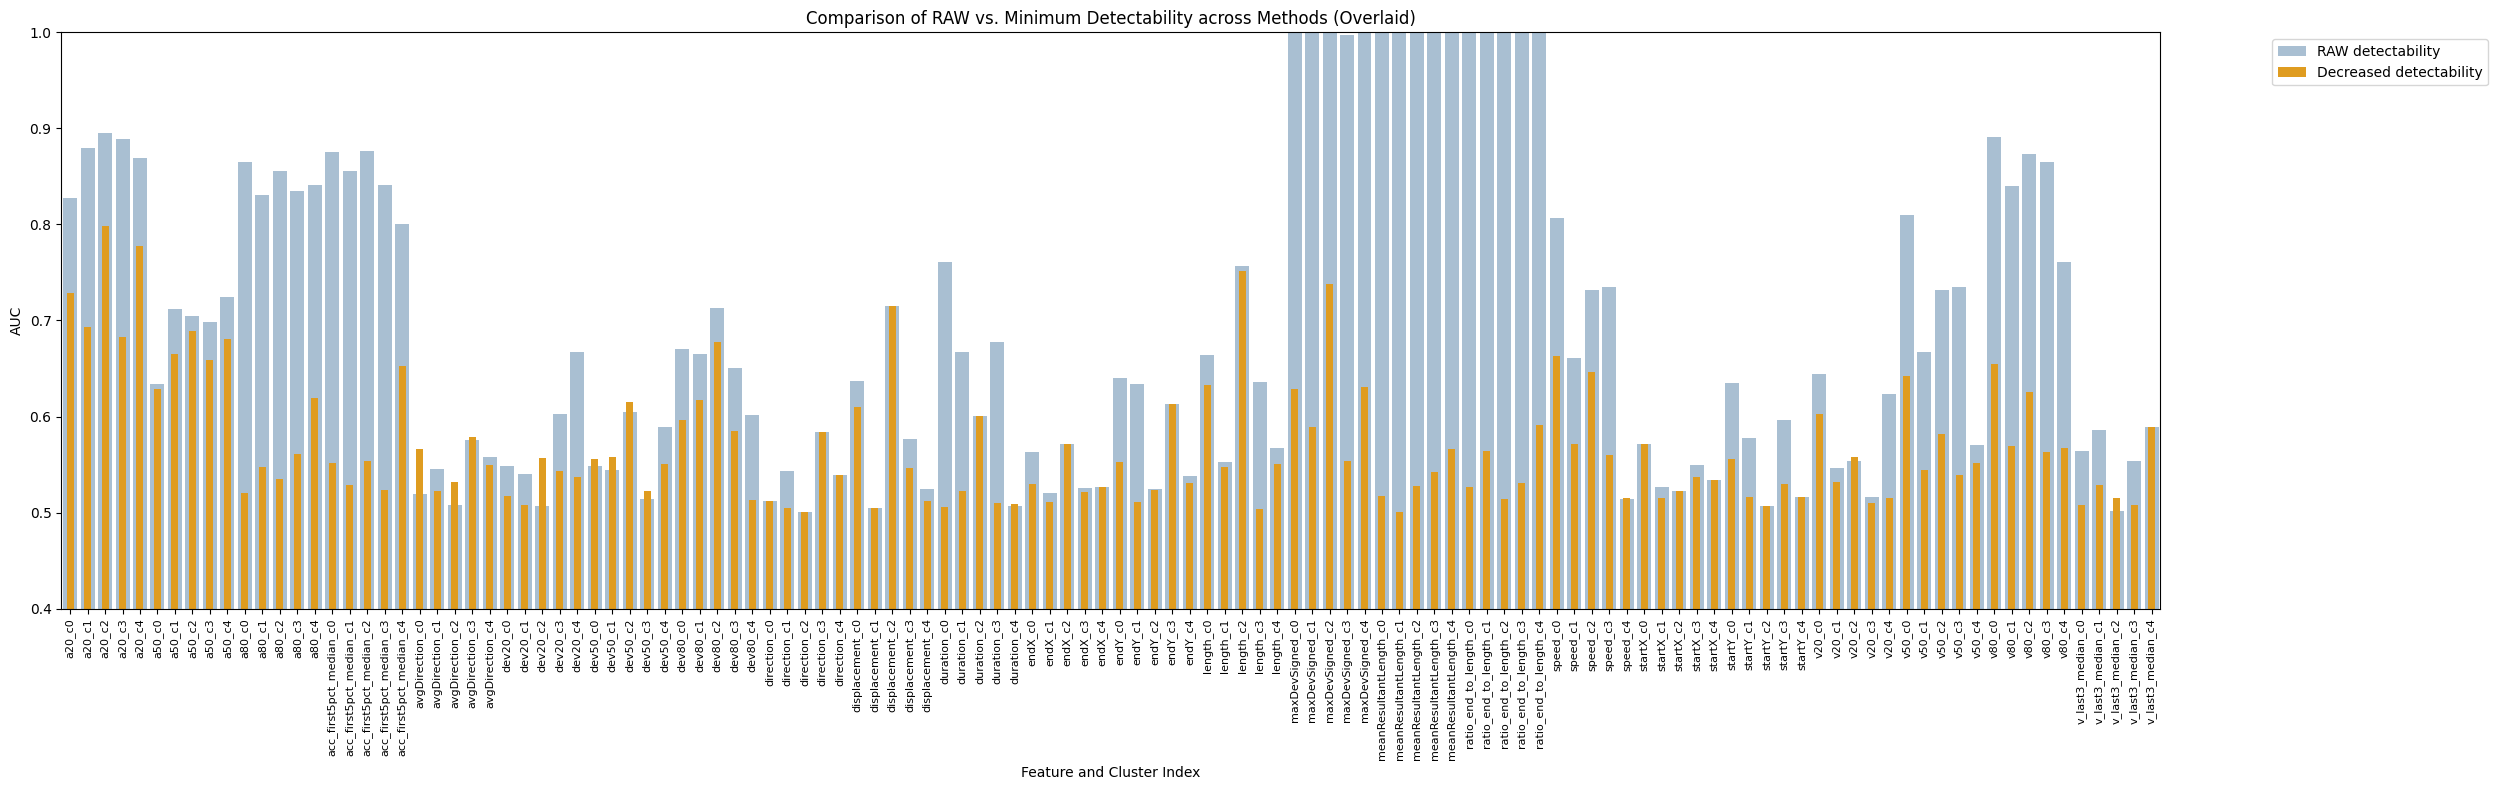

In [29]:
# Prepare the data for plotting
plot_data = []
for raw_val, diff, feature, cluster_idx in added_value:
    label = f"{feature}_c{cluster_idx}"
    # skip the heavy classifiers xgb_accuracy and svm_accuracy
    if (feature == "xgb_accuracy") or (feature == "svm_accuracy"):
        continue
    plot_data.append({"label": label, "Value": raw_val, "Type": "RAW detectability"})
    plot_data.append({"label": label, "Value": raw_val - diff, "Type": "Decreased detectability"})

df_plot = pd.DataFrame(plot_data)
df_plot.sort_values("label", inplace=True)

# Create the overlaid bar plot
plt.figure(figsize=(25, 8))

# Plot RAW detectability (wider bars in the background)
sns.barplot(
    data=df_plot[df_plot["Type"] == "RAW detectability"], 
    x="label", y="Value", color="steelblue", label="RAW detectability", alpha=0.5
)

# Plot Decreased detectability (narrower bars in the foreground)
# Using a smaller width ensures visibility even if Decreased > RAW (diff < 0)
sns.barplot(
    data=df_plot[df_plot["Type"] == "Decreased detectability"], 
    x="label", y="Value", color="orange", label="Decreased detectability", width=0.4
)

plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Feature and Cluster Index")
plt.ylabel("AUC")
plt.title("Comparison of RAW vs. Minimum Detectability across Methods (Overlaid)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.4, 1)
plt.tight_layout()
plt.show()


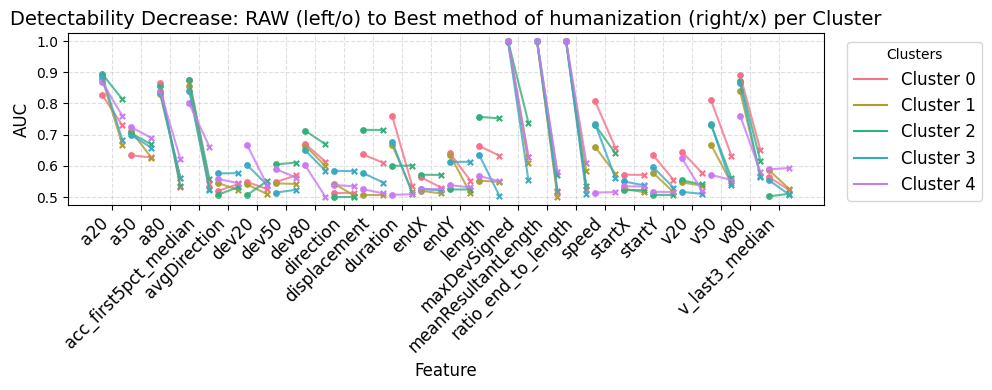

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and prepare data
filtered_data = [v for v in added_value if v[2] not in ["xgb_accuracy", "svm_accuracy"]]
features = sorted(list(set(v[2] for v in filtered_data)))
feature_map = {feat: i for i, feat in enumerate(features)}
num_clusters = len(task_clusters)
colors = sns.color_palette("husl", num_clusters)

plt.figure(figsize=(10, 4))

# Plot segments for each cluster with a small horizontal offset
for cluster_idx in range(num_clusters):
    cluster_points = [v for v in filtered_data if v[3] == cluster_idx]
    if not cluster_points:
        continue
        
    # Calculate offset x-coordinates for this cluster
    center_offset = (cluster_idx - (num_clusters - 1) / 2) * 0.15
    slope_half_width = 0.35  # Controls the horizontal spread of the slope line

    x_starts, x_ends, y_starts, y_ends = [], [], [], []

    for v in cluster_points:
        feat_idx = feature_map[v[2]]
        raw_val = v[0]
        min_val = v[0] - v[1]
        
        # Define start (RAW) and end (Min) x-coordinates to create a slope
        x_start = feat_idx + center_offset * 0 - slope_half_width
        x_end = feat_idx + center_offset * 0 + slope_half_width
        
        # Draw the connecting line (slope)
        plt.plot([x_start, x_end], [raw_val, min_val], color=colors[cluster_idx], alpha=0.8, linewidth=1.5)
        
        x_starts.append(x_start)
        x_ends.append(x_end)
        y_starts.append(raw_val)
        y_ends.append(min_val)
    
    # Add markers at the ends
    plt.scatter(x_starts, y_starts, color=colors[cluster_idx], s=15, marker='o') # RAW
    plt.scatter(x_ends, y_ends, color=colors[cluster_idx], s=15, marker='x')   # Min Other

    # Dummy plot for legend
    plt.plot([], [], color=colors[cluster_idx], label=f"Cluster {cluster_idx}")

# Adjustable wrap width for long feature names
wrap_width = 100
def wrap_under_wrap_width(label: str, wrap_width: int) -> str:
    if len(label) <= wrap_width:
        return label
    return label[:wrap_width] + '\n' + wrap_under_wrap_width(label[wrap_width:], wrap_width)

wrapped_labels = [wrap_under_wrap_width(f, wrap_width) for f in features]
plt.xticks(range(len(features)), wrapped_labels, rotation=45,  fontsize=12, horizontalalignment='right')
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title("Detectability Decrease: RAW (left/o) to Best method of humanization (right/x) per Cluster", fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Clusters", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


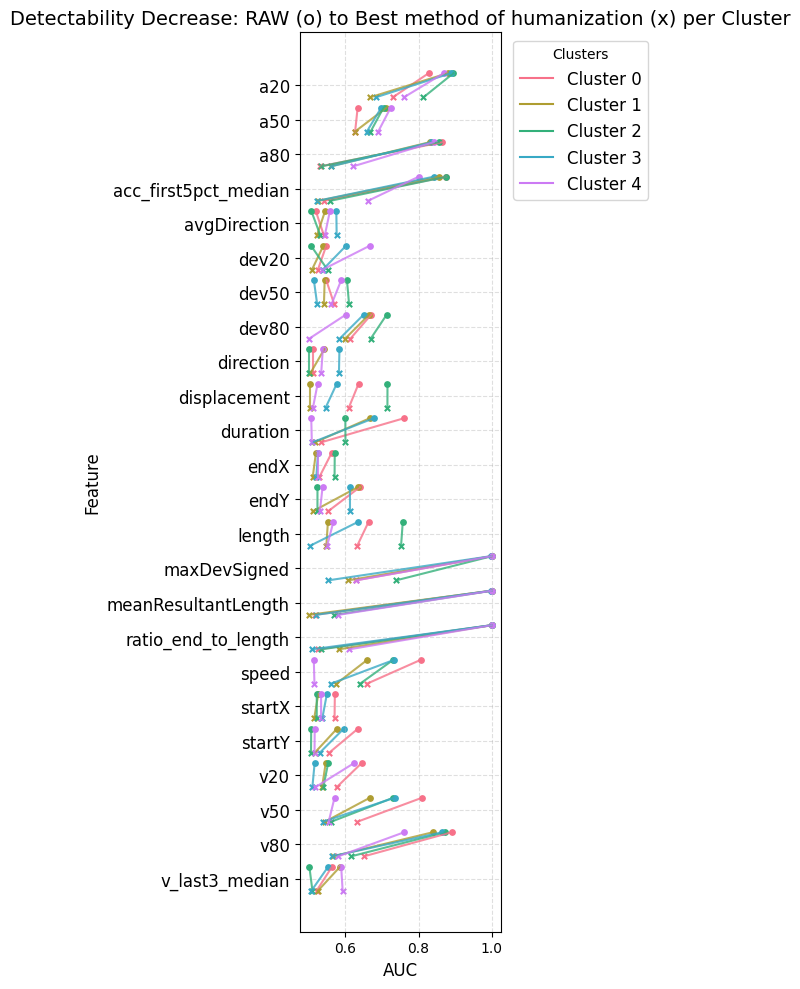

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and prepare data
filtered_data = [v for v in added_value if v[2] not in ["xgb_accuracy", "svm_accuracy"]]
features = sorted(list(set(v[2] for v in filtered_data)))
feature_map = {feat: i for i, feat in enumerate(features)}
num_clusters = len(task_clusters)
colors = sns.color_palette("husl", num_clusters)

# Swapped figsize for vertical orientation
plt.figure(figsize=(6, 10))

# Plot segments for each cluster with a small vertical offset
for cluster_idx in range(num_clusters):
    cluster_points = [v for v in filtered_data if v[3] == cluster_idx]
    if not cluster_points:
        continue
        
    # Calculate offset y-coordinates for this cluster
    center_offset = (cluster_idx - (num_clusters - 1) / 2) * 0.15
    slope_half_height = 0.35  # Controls the vertical spread of the slope line

    x_starts, x_ends, y_starts, y_ends = [], [], [], []

    for v in cluster_points:
        feat_idx = feature_map[v[2]]
        raw_val = v[0]
        min_val = v[0] - v[1]
        
        # Define start (RAW) and end (Min) y-coordinates to create a slope
        # Swapping logic: feat_idx is now on the Y axis
        y_start = feat_idx + center_offset * 0 - slope_half_height
        y_end = feat_idx + center_offset * 0 + slope_half_height
        
        # Draw the connecting line (slope)
        plt.plot([raw_val, min_val], [y_start, y_end], color=colors[cluster_idx], alpha=0.8, linewidth=1.5)
        
        x_starts.append(raw_val)
        x_ends.append(min_val)
        y_starts.append(y_start)
        y_ends.append(y_end)
    
    # Add markers at the ends (swapped x and y)
    plt.scatter(x_starts, y_starts, color=colors[cluster_idx], s=15, marker='o') # RAW
    plt.scatter(x_ends, y_ends, color=colors[cluster_idx], s=15, marker='x')   # Min Other

    # Dummy plot for legend
    plt.plot([], [], color=colors[cluster_idx], label=f"Cluster {cluster_idx}")

# Adjustable wrap width for long feature names
wrap_width = 20
def wrap_under_wrap_width(label: str, wrap_width: int) -> str:
    if len(label) <= wrap_width:
        return label
    return label[:wrap_width] + '\n' + wrap_under_wrap_width(label[wrap_width:], wrap_width)

wrapped_labels = [wrap_under_wrap_width(f, wrap_width) for f in features]
plt.yticks(range(len(features)), wrapped_labels, fontsize=12)
plt.gca().invert_yaxis() # Invert to keep the first features at the top
plt.ylabel("Feature", fontsize=12)
plt.xlabel("AUC", fontsize=12)
plt.title("Detectability Decrease: RAW (o) to Best method of humanization (x) per Cluster", fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Clusters", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


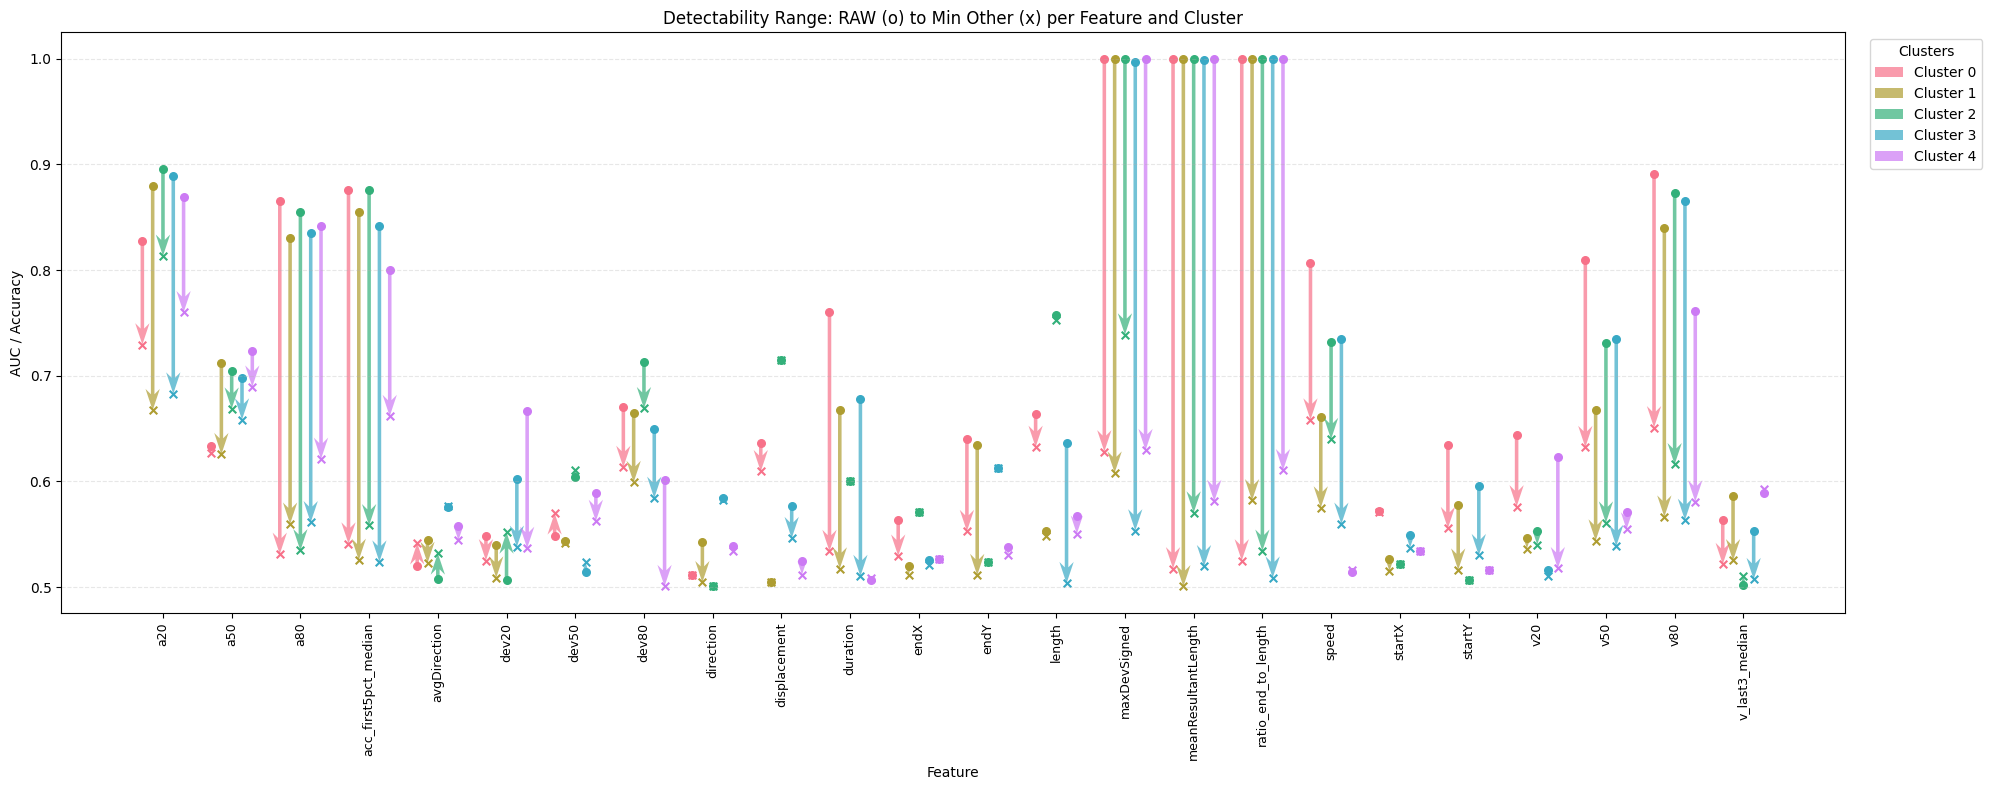

In [ ]:
# Filter out heavy classifiers
filtered_data = [v for v in added_value if v[2] not in ["xgb_accuracy", "svm_accuracy"]]
features = sorted(list(set(v[2] for v in filtered_data)))
feature_to_idx = {feat: i for i, feat in enumerate(features)}
num_clusters = len(task_clusters)
colors = sns.color_palette("husl", num_clusters)

plt.figure(figsize=(20, 8))

for cluster_idx in range(num_clusters):
    cluster_subset = [v for v in filtered_data if v[3] == cluster_idx]
    if not cluster_subset:
        continue
    
    # Apply a small horizontal offset so clusters for the same feature are distinguishable
    x_offset = (cluster_idx - (num_clusters - 1) / 2) * 0.15
    
    x_coords = [feature_to_idx[v[2]] + x_offset for v in cluster_subset]
    y_raw = [v[0] for v in cluster_subset]
    y_min = [v[0] - v[1] for v in cluster_subset]
    
    # Use quiver to draw arrows from RAW (top) to Min Other (bottom) to stress the decrease
    dy = [ymin - yraw for ymin, yraw in zip(y_min, y_raw)]
    plt.quiver(x_coords, y_raw, [0]*len(x_coords), dy, 
               angles='xy', scale_units='xy', scale=1, color=colors[cluster_idx], 
               width=0.002, headwidth=4, headlength=6, alpha=0.7, label=f"Cluster {cluster_idx}")
    
    # Mark the endpoints: 'o' for RAW (top), 'x' for Min Other (bottom)
    plt.scatter(x_coords, y_raw, color=colors[cluster_idx], s=30, marker='o')
    plt.scatter(x_coords, y_min, color=colors[cluster_idx], s=30, marker='x')

plt.xticks(range(len(features)), features, rotation=90, fontsize=9)
plt.xlabel("Feature")
plt.ylabel("AUC / Accuracy")
plt.title("Detectability Range: RAW (o) to Min Other (x) per Feature and Cluster")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Clusters")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


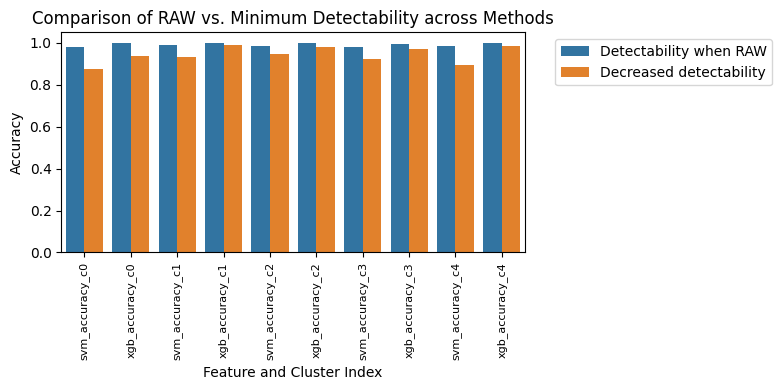

In [ ]:
# Prepare the data for plotting
plot_data = []
for raw_val, diff, feature, cluster_idx in added_value:
    label = f"{feature}_c{cluster_idx}"
    # skip the heavy classifiers xgb_accuracy and svm_accuracy
    if (feature == "xgb_accuracy") or (feature == "svm_accuracy"):
        plot_data.append({"label": label, "Value": raw_val, "Type": "Detectability when RAW"})
        plot_data.append({"label": label, "Value": raw_val - diff, "Type": "Decreased detectability"})

df_plot = pd.DataFrame(plot_data)

# Create the paired bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_plot, x="label", y="Value", hue="Type")

plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Feature and Cluster Index")
plt.ylabel("Accuracy")
plt.title("Comparison of RAW vs. Minimum Detectability across Methods")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'AUC/acc decrease w.r.t to RAW method')

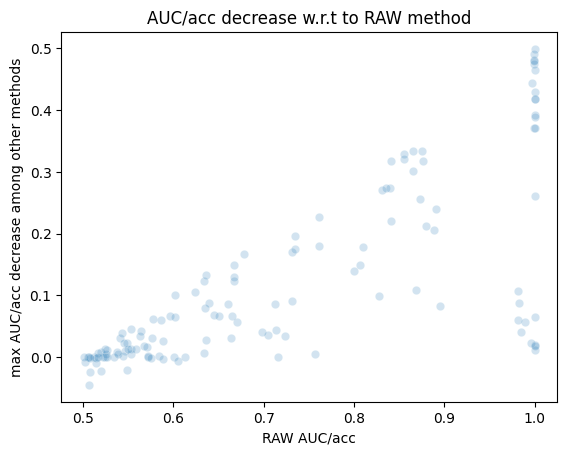

In [ ]:

sns.scatterplot(x=[x[0] for x in added_value], y=[x[1] for x in added_value], alpha=0.2)
plt.xlabel("RAW AUC/acc")
plt.ylabel("max AUC/acc decrease among other methods")
plt.title("AUC/acc decrease w.r.t to RAW method")

### ？

In [31]:
result_csv.T.to_csv("1016requiredtable.csv")

In [ ]:

from typing import List, Tuple
from analysis.processing.calculate_roc_auc_from_feature import make_feature_and_learner_table

result_csv = pd.DataFrame()

for task in [-1]:
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=task,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans,  )),
        )
        list_to_concat.append(non_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task)

    try:
        humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=task,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents,  )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans,  )),
        )
        list_to_concat.append(humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task)

    try:
        fake_humanized_result_csv = make_feature_and_learner_table(
            task_cluster_id=task,
            method_name="fit_effort_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans,  )),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task)

    try:
        fake_humanized_result_csv_2 = make_feature_and_learner_table(
            task_cluster_id=task,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task)

    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )
result_csv.T.to_csv("final_aggregated_results_1023.csv")




No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gestu

In [ ]:
result_csv

(-1, RAW)  (-1, rotation_and_match)  \
feature                                                     
ratio_end_to_length    0.999792                  0.584265   
meanResultantLength    0.999791                  0.602295   
maxDevSigned           0.999207                  0.686569   
a20                    0.882179                  0.792756   
acc_first5pct_median   0.852256                  0.509462   
a80                    0.839693                  0.582414   
v80                    0.836414                  0.565611   
a50                    0.706387                  0.748253   
v50                    0.684675                  0.531416   
speed                  0.674493                  0.573371   
dev80                  0.667906                  0.706313   
length                 0.656418                  0.683028   
duration               0.617965                  0.589639   
displacement           0.607845                  0.637015   
dev20                  0.559043                  0.633174   
v_last3_median         0.550692                  0.566133   
dev50                  0.540225                  0.667868   
endY                   0.521694                  0.503979   
direction              0.519476                  0.506813   
endX                   0.518680                  0.542003   
avgDirection           0.514947                  0.521346   
startY                 0.510766                  0.501315   
v20                    0.509478                  0.516573   
startX                 0.508470                  0.526052   
svm_accuracy           0.991180                  0.946961   
xgb_accuracy           0.995590                  0.993370   

                      (-1, fit_effort_disturbance)  (-1, b_spline_disturbance)  
feature                                                                         
ratio_end_to_length                       0.564384                    0.686174  
meanResultantLength                       0.549426                    0.793569  
maxDevSigned                              0.671995                    0.904313  
a20                                       0.749552                    0.806213  
acc_first5pct_median                      0.518468                    0.849337  
a80                                       0.573505                    0.713537  
v80                                       0.568272                    0.823468  
a50                                       0.719699                    0.685900  
v50                                       0.540897                    0.686167  
speed                                     0.582022                    0.671980  
dev80                                     0.693978                    0.603991  
length                                    0.651518                    0.654006  
duration                                  0.578012                    0.618027  
displacement                              0.607837                    0.607528  
dev20                                     0.633199                    0.508340  
v_last3_median                            0.543653                    0.560809  
dev50                                     0.656771                    0.548074  
endY                                      0.521710                    0.522026  
direction                                 0.519481                    0.535182  
endX                                      0.518672                    0.518419  
avgDirection                              0.547549                    0.531630  
startY                                    0.510766                    0.510892  
v20                                       0.541767                    0.500466  
startX                                    0.508470                    0.508869  
svm_accuracy                              0.943771                    0.981257  
xgb_accuracy                              0.994487                    0.990077

(-1, RAW)  (-1, rotation_and_match)  \
feature                                                     
ratio_end_to_length    0.999792                  0.584265   
meanResultantLength    0.999791                  0.602295   
maxDevSigned           0.999207                  0.686569   
a20                    0.882179                  0.792756   
acc_first5pct_median   0.852256                  0.509462   
a80                    0.839693                  0.582414   
v80                    0.836414                  0.565611   
a50                    0.706387                  0.748253   
v50                    0.684675                  0.531416   
speed                  0.674493                  0.573371   
dev80                  0.667906                  0.706313   
length                 0.656418                  0.683028   
duration               0.617965                  0.589639   
displacement           0.607845                  0.637015   
dev20                  0.559043                  0.633174   
v_last3_median         0.550692                  0.566133   
dev50                  0.540225                  0.667868   
endY                   0.521694                  0.503979   
direction              0.519476                  0.506813   
endX                   0.518680                  0.542003   
avgDirection           0.514947                  0.521346   
startY                 0.510766                  0.501315   
v20                    0.509478                  0.516573   
startX                 0.508470                  0.526052   
svm_accuracy           0.991180                  0.946961   
xgb_accuracy           0.995590                  0.993370   

                      (-1, fit_effort_disturbance)  (-1, b_spline_disturbance)  
feature                                                                         
ratio_end_to_length                       0.566391                    0.685485  
meanResultantLength                       0.549826                    0.794710  
maxDevSigned                              0.675956                    0.904984  
a20                                       0.764779                    0.804121  
acc_first5pct_median                      0.521912                    0.850109  
a80                                       0.567493                    0.715620  
v80                                       0.570179                    0.823096  
a50                                       0.723936                    0.684123  
v50                                       0.544044                    0.686559  
speed                                     0.583368                    0.672296  
dev80                                     0.711163                    0.616075  
length                                    0.651619                    0.654410  
duration                                  0.573071                    0.618020  
displacement                              0.607839                    0.608021  
dev20                                     0.641218                    0.501446  
v_last3_median                            0.542495                    0.560457  
dev50                                     0.669515                    0.557416  
endY                                      0.521715                    0.521794  
direction                                 0.519481                    0.534879  
endX                                      0.518675                    0.518669  
avgDirection                              0.544224                    0.531297  
startY                                    0.510766                    0.511099  
v20                                       0.539221                    0.500282  
startX                                    0.508470                    0.508708  
svm_accuracy                              0.952591                    0.981257  
xgb_accuracy                              0.993385                    0.991180

## svm and xgboost accuracy goes up as more feature is added

In [ ]:

from typing import List, Tuple
from analysis.processing.calculate_roc_auc_from_feature import plot_acc_increase_as_more_feature_used
from draw_motion_event2 import plot_gestures_2
result_csv = pd.DataFrame()


for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv = plot_acc_increase_as_more_feature_used(
            task_cluster_id=cluster_idx,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(non_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task_cluster)
    try:
        humanized_result_csv = plot_acc_increase_as_more_feature_used(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv = plot_acc_increase_as_more_feature_used(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv_2 = plot_acc_increase_as_more_feature_used(
            task_cluster_id=cluster_idx,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task_cluster)
        
    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

In [ ]:
result_csv

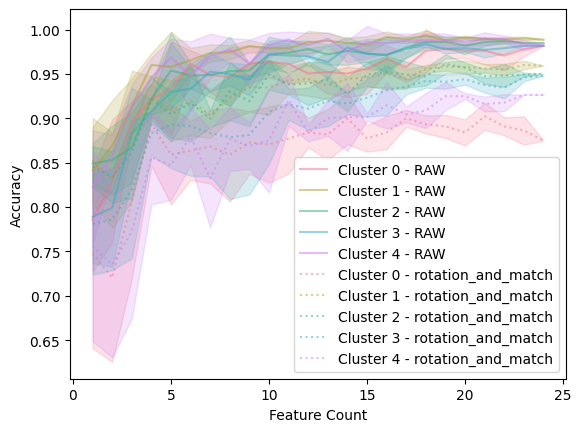

In [29]:
import seaborn as sns
for method_name in ["RAW", "rotation_and_match"]: # plot by line style e.g. --, 
    for task_cluster_id in range(len(task_clusters)): # plot by color
        # value obtaining: result.loc[f"xgb_accuracy_{sample_feature_count}_{sample_idx}", [(task_cluster_id, method_name)]]
        data_points = []
        for sample_feature_count in range(1, 24 + 1):
            values = []
            for sample_idx in range(5):
                val = result_csv.loc[f"svm_accuracy_{sample_feature_count}_{sample_idx}", [(task_cluster_id, method_name)]].item()
                values.append(val)
            
            # Store for plotting
            for v in values:
                data_points.append({"Feature Count": sample_feature_count, "Accuracy": v})
        
        # Convert to DataFrame for easy plotting with seaborn
        df_subset = pd.DataFrame(data_points)
        
        # Define line styles based on method_name
        line_styles = {
            "RAW": "-", 
            "rotation_and_match_disturbance": "--", 
            "b_spline_disturbance": "-.", 
            "rotation_and_match": ":"
        }
        
        # Plot using seaborn which handles the mean and confidence interval (shading) automatically
        sns.lineplot(
            data=df_subset, 
            x="Feature Count", 
            y="Accuracy", 
            label=f"Cluster {task_cluster_id} - {method_name}",
            linestyle=line_styles.get(method_name, "-"),
            errorbar='sd' # or 'ci', 'se' depending on preference for shading
            , 
            color=sns.color_palette("husl", len(task_clusters))[task_cluster_id],
            alpha=0.5
        )


## tap comparison

In [44]:
ranged_swipe_generator

functools.partial(<function ranged_modified_generator at 0x76509760a9e0>, formated_data_timestamps=    app                                          task_name               user1  \
0    jd                   搜索“无线耳机”，打开一个非自营卖家的商品页面，查看其一条评价。  20251012_104825   
1    jd              找一个价格在50到100元之间的移动电源，加入购物车，然后从购物车中移除。  20251012_105107   
2    jd                  使用应用的对比功能，比较两个不同品牌的手机壳，重点关注价格和材质。  20251012_105412   
3    jd                     找到“百亿补贴”专区，选择一个补贴商品，查看其折扣价与原价。  20251012_105701   
4    jd            选择一种日用品（例如洗发水），添加收货地址，进入订单确认页面，但不要提交支付。  20251012_105947   
..   ..                                                ...              ...   
111  知乎              搜索“编程猫”，搜索用户，并进入结果中一个用户的主页，查看其最新发布的文章  20251115_185627   
112  知乎  搜索“编程猫”，搜索用户，并进入结果中一个用户的主页，查看其最新发布的文章，点赞该文章，点击...  20251115_185802   
113  知乎                                         搜索“人工智能”专栏  20251115_190001   
114  知乎              搜索“人工智能”专栏，查看一篇专栏中的文章并评论“hello world”  20251115_190056   
115  知乎      搜索“人工智能”专栏，查看一篇专

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

Text(0.5, 1.0, 'Tap duration distribution by type (overlaid)')

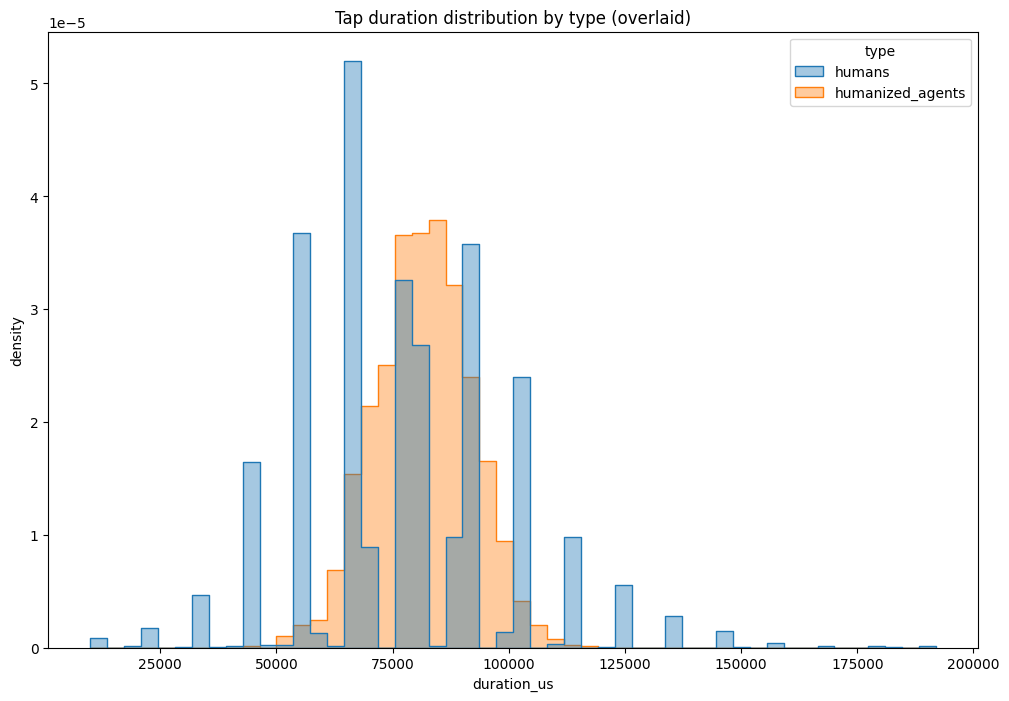

In [ ]:
from analysis.processing.tap_duration_extract import leave_taps


tap_filtering_and_modification_function=partial(leave_taps, tap_len_max=3)


all_human_iterator = (ranged_tap_generator(participants=humans))
all_rotate_fit_iterator = (ranged_tap_generator(
    participants=humanized_agents))



from analysis.lib.motionevent_classes import FingerEvent
def yield_label_together() -> List[Tuple[str, List[List[FingerEvent]]]]:
    return [("humans", all_human_iterator), ("humanized_agents", all_rotate_fit_iterator)]

from analysis.processing.tap_duration_extract import build_durations_dataframe
df_durations = build_durations_dataframe(yield_label_together())
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df_durations[df_durations["duration_us"] < 200_000],
    x="duration_us",
    hue="type",
    bins=50,
    element="step",
    stat="density",
    common_norm=False,
    alpha=0.4,
)
plt.xlabel("duration_us")
plt.ylabel("density")
plt.title("Tap duration distribution by type (overlaid)")

## Plot acc instead of auc


In [ ]:
from typing import Dict, List, Tuple
from analysis.processing.calculate_roc_auc_from_feature import make_feature_and_learner_table_but_acc as make_feature_and_learner_table_acc
from analysis.processing.calculate_roc_auc_from_feature import compute_acc_per_feature_using_x_1_x_point_on_roc_auc as acc_obtain_function
from draw_motion_event2 import plot_gestures_2
import sklearn.pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import sklearn

make_feature_and_learner_table_acc = partial(make_feature_and_learner_table_acc, acc_obtain_function=acc_obtain_function)

result_csv = pd.DataFrame()

raw_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}
humanized_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}

for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv, svm_pipeline, xgb_pipeline  = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(non_humanized_result_csv)

        raw_swipe_classifiers_to_use_for_clusters[cluster_idx] = (svm_pipeline, xgb_pipeline)

    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task_cluster)
    
    
    try:
        humanized_result_csv, svm_pipeline, xgb_pipeline = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(humanized_result_csv)
        
        humanized_swipe_classifiers_to_use_for_clusters[cluster_idx] = (svm_pipeline, xgb_pipeline)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv, _, _ = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv_2, _, _ = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task_cluster)

    try:
        unhumanized_result_csv, _, _ = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="unhumanized_agents",
            pos_iterator=("unhumanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster,
                humanity_disturbance=raw_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(unhumanized_result_csv)
    except ValueError:
        print("Warning: No valid data for unhumanized_agents vs humans for task", task_cluster)

    try:
        rot_humanized_result_csv, _, _ = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="rotated_humanized_agents",
            pos_iterator=("rotated_humanized_agents", ranged_swipe_generator(
                participants=rot_humanized_agents, index_range=task_cluster
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(rot_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for rotated_humanized_agents vs humans for task", task_cluster)

    try:
        fake_rot_tap_humanized_agents_result_csv, _, _ = make_feature_and_learner_table_acc(
            task_cluster_id=cluster_idx,
            method_name="fake_rotated_tap_humanized_agents",
            pos_iterator=("fake_rotated_tap_humanized_agents", ranged_swipe_generator(
                participants=fake_rot_tap_humanized_agents, index_range=task_cluster
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_rot_tap_humanized_agents_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_rotated_tap_humanized_agents vs humans for task", task_cluster)

    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )

    
result_csv.T.to_csv("results0125/final_acc_and_learner_results_0125.csv")

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),


{'svm_accuracy': 0.981651376146789, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_20251201_202546_problematic.log' found under logs
No file named 'gesture_recording_20251201_202819_problematic.log' found under logs
No file named 'gesture_recording_20251201_203019_problematic.log' found under logs
No file named 'gesture_recording_c_switch_appRe.log' found under logs
No file named 'gesture_recording__switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named '

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9772727272727273, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under l

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9963993453355156, 'xgb_accuracy': 0.9993453355155483}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_

/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),


{'svm_accuracy': 0.9887218045112782, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under log

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_f

{'svm_accuracy': 0.9777777777777777, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under log

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9962186318322448, 'xgb_accuracy': 0.9986249570299072}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs


/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calc

{'svm_accuracy': 0.985, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
{'svm_accuracy': 0.9502487562189055, 'xgb_accuracy': 0.995024875621890

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9950248756218906, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under log

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9968112244897959, 'xgb_accuracy': 0.9974489795918368}
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named '

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),


{'svm_accuracy': 0.995260663507109, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs

/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_f

{'svm_accuracy': 0.9826086956521739, 'xgb_accuracy': 1.0}
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found 

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:461: RuntimeWarning: divide by zero encountered in log
  "greater_than_threshold_agent_log_odds": float(np.log(tpr[idx]) - np.log(fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),
/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9926470588235294, 'xgb_accuracy': 0.9926470588235294}
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
{'svm_accuracy': 0.9571428571428572, 'xgb_

/project_folder/calculate_roc_auc_from_feature.py:462: RuntimeWarning: divide by zero encountered in log
  "lesser_than_threshold_agent_log_odds": float(np.log((1 - tpr[idx]) ) - np.log(1 - fpr[idx])),


{'svm_accuracy': 0.9953917050691244, 'xgb_accuracy': 0.9989759344598055}


In [62]:
result_csv

(0, RAW)  (0, rotation_and_match)  \
feature                                                   
maxDevSigned          0.996854                 0.551502   
meanResultantLength   0.987788                 0.681793   
ratio_end_to_length   0.987788                 0.645088   
duration              0.858340                 0.690679   
a20                   0.835472                 0.828612   
acc_first5pct_median  0.824390                 0.589681   
a80                   0.815352                 0.657534   
dev80                 0.764511                 0.531011   
dev20                 0.763425                 0.503793   
dev50                 0.705503                 0.551016   
v80                   0.699649                 0.518785   
avgDirection          0.676320                 0.551502   
direction             0.673413                 0.546976   
startY                0.658070                 0.747164   
speed                 0.653125                 0.500000   
startX                0.653125                 0.531011   
a50                   0.644695                 0.778913   
displacement          0.641578                 0.515355   
v50                   0.632939                 0.540749   
endX                  0.624319                 0.526176   
endY                  0.617804                 0.727921   
v20                   0.601423                 0.547934   
length                0.561671                 0.527069   
v_last3_median        0.541944                 0.663677   
svm_accuracy          0.981651                 0.875000   
xgb_accuracy          1.000000                 0.977273   

                      (0, rotation_and_match_disturbance)  \
feature                                                     
maxDevSigned                                     0.609994   
meanResultantLength                              0.604288   
ratio_end_to_length                              0.555236   
duration                                         0.566190   
a20                                              0.721632   
acc_first5pct_median                             0.533519   
a80                                              0.585286   
dev80                                            0.635816   
dev20                                            0.641578   
dev50                                            0.638696   
v80                                              0.595720   
avgDirection                                     0.572988   
direction                                        0.673413   
startY                                           0.658070   
speed                                            0.607135   
startX                                           0.653125   
a50                                              0.663408   
displacement                                     0.641578   
v50                                              0.595720   
endX                                             0.624319   
endY                                             0.617804   
v20                                              0.547570   
length                                           0.556025   
v_last3_median                                   0.606995   
svm_accuracy                                     0.935780   
xgb_accuracy                                     0.917431   

                      (0, b_spline_disturbance)  (0, unhumanized_agents)  \
feature                                                                    
maxDevSigned                           0.746718                 1.000000   
meanResultantLength                    0.700562                 1.000000   
ratio_end_to_length                    0.560717                 1.000000   
duration                               0.848194                 0.904958   
a20                                    0.758226                 0.915411   
acc_first5pct_median                   0.824390                 0.858986   
a80                                    0.644461     

In [18]:
result_csv

(0, RAW)  (0, rotation_and_match)  \
feature                                                   
maxDevSigned          0.996854                 0.551502   
meanResultantLength   0.987788                 0.681793   
ratio_end_to_length   0.987788                 0.645088   
duration              0.858340                 0.690679   
a20                   0.835472                 0.828612   
acc_first5pct_median  0.824390                 0.589681   
a80                   0.815352                 0.657534   
dev80                 0.764511                 0.531011   
dev20                 0.763425                 0.503793   
dev50                 0.705503                 0.551016   
v80                   0.699649                 0.518785   
avgDirection          0.676320                 0.551502   
direction             0.673413                 0.546976   
startY                0.658070                 0.747164   
speed                 0.653125                 0.500000   
startX                0.653125                 0.531011   
a50                   0.644695                 0.778913   
displacement          0.641578                 0.515355   
v50                   0.632939                 0.540749   
endX                  0.624319                 0.526176   
endY                  0.617804                 0.727921   
v20                   0.601423                 0.547934   
length                0.561671                 0.527069   
v_last3_median        0.541944                 0.663677   
svm_accuracy          0.981651                 0.875000   
xgb_accuracy          1.000000                 0.977273   

                      (0, rotation_and_match_disturbance)  \
feature                                                     
maxDevSigned                                     0.647347   
meanResultantLength                              0.598868   
ratio_end_to_length                              0.552493   
duration                                         0.549747   
a20                                              0.700562   
acc_first5pct_median                             0.533519   
a80                                              0.596155   
dev80                                            0.632939   
dev20                                            0.615718   
dev50                                            0.638696   
v80                                              0.590025   
avgDirection                                     0.578659   
direction                                        0.673413   
startY                                           0.658070   
speed                                            0.609994   
startX                                           0.653125   
a50                                              0.682030   
displacement                                     0.641578   
v50                                              0.581497   
endX                                             0.624319   
endY                                             0.617804   
v20                                              0.578659   
length                                           0.650235   
v_last3_median                                   0.606995   
svm_accuracy                                     0.944954   
xgb_accuracy                                     0.944954   

                      (0, b_spline_disturbance)  (0, unhumanized_agents)  \
feature                                                                    
maxDevSigned                           0.740804                 1.000000   
meanResultantLength                    0.700562                 1.000000   
ratio_end_to_length                    0.568924                 1.000000   
duration                               0.848194                 0.904958   
a20                                    0.763425                 0.915411   
acc_first5pct_median                   0.821375                 0.858986   
a80                                    0.679228     

(0, 'RAW')  (0, 'rotation_and_match')  \
maxDevSigned            0.996854                   0.551502   
meanResultantLength     0.987788                   0.681793   
ratio_end_to_length     0.987788                   0.645088   
duration                0.858340                   0.690679   
a20                     0.835472                   0.828612   
acc_first5pct_median    0.824390                   0.589681   
a80                     0.815352                   0.657534   
dev80                   0.764511                   0.531011   
dev20                   0.763425                   0.503793   
dev50                   0.705503                   0.551016   
v80                     0.699649                   0.518785   
avgDirection            0.676320                   0.551502   
direction               0.673413                   0.546976   
startY                  0.658070                   0.747164   
speed                   0.653125                   0.500000   
startX                  0.653125                   0.531011   
a50                     0.644695                   0.778913   
displacement            0.641578                   0.515355   
v50                     0.632939                   0.540749   
endX                    0.624319                   0.526176   
endY                    0.617804                   0.727921   
v20                     0.601423                   0.547934   
length                  0.561671                   0.527069   
v_last3_median          0.541944                   0.663677   
svm_accuracy            0.981651                   0.875000   
xgb_accuracy            1.000000                   0.977273   

                      (0, 'rotation_and_match_disturbance')  \
maxDevSigned                                       0.647347   
meanResultantLength                                0.598868   
ratio_end_to_length                                0.552493   
duration                                           0.549747   
a20                                                0.700562   
acc_first5pct_median                               0.533519   
a80                                                0.596155   
dev80                                              0.632939   
dev20                                              0.615718   
dev50                                              0.638696   
v80                                                0.590025   
avgDirection                                       0.578659   
direction                                          0.673413   
startY                                             0.658070   
speed                                              0.609994   
startX                                             0.653125   
a50                                                0.682030   
displacement                                       0.641578   
v50                                                0.581497   
endX                                               0.624319   
endY                                               0.617804   
v20                                                0.578659   
length                                             0.650235   
v_last3_median                                     0.606995   
svm_accuracy                                       0.944954   
xgb_accuracy                                       0.944954   

                      (0, 'b_spline_disturbance')  (0, 'unhumanized_agents')  \
maxDevSigned                             0.740804                   1.000000   
meanResultantLength                      0.700562                   1.000000   
ratio_end_to_length                      0.568924                   1.000000   
duration                                 0.848194                   0.904958   
a20                                      0.763425                   0.915411   
acc_first5pct_median                     0.821375                   0.858986   
a80                                      0.679228         

In [63]:
max_single_feature_swipe = result_csv.drop(labels=["xgb_accuracy", "svm_accuracy"]).max(axis=0)
max_single_feature_swipe

(0, RAW)                                  0.996854
(0, rotation_and_match)                   0.828612
(0, rotation_and_match_disturbance)       0.721632
(0, b_spline_disturbance)                 0.848194
(0, unhumanized_agents)                   1.000000
(0, rotated_humanized_agents)             0.765054
(0, fake_rotated_tap_humanized_agents)    0.999850
(1, RAW)                                  0.998235
(1, rotation_and_match)                   0.924896
(1, rotation_and_match_disturbance)       0.889903
(1, b_spline_disturbance)                 0.933952
(1, unhumanized_agents)                   1.000000
(1, rotated_humanized_agents)             0.976993
(1, fake_rotated_tap_humanized_agents)    0.998946
(2, RAW)                                  1.000000
(2, rotation_and_match)                   0.949438
(2, rotation_and_match_disturbance)       0.929072
(2, b_spline_disturbance)                 0.938964
(2, unhumanized_agents)                   1.000000
(2, rotated_humanized_agents)  

In [64]:
svm_xgboost = result_csv.loc[["svm_accuracy", "xgb_accuracy"], :].T
svm_xgboost

feature                                 svm_accuracy  xgb_accuracy
(0, RAW)                                    0.981651      1.000000
(0, rotation_and_match)                     0.875000      0.977273
(0, rotation_and_match_disturbance)         0.935780      0.917431
(0, b_spline_disturbance)                   0.963303      0.981651
(0, unhumanized_agents)                     0.977273      1.000000
(0, rotated_humanized_agents)               0.975610      1.000000
(0, fake_rotated_tap_humanized_agents)      0.996399      0.999345
(1, RAW)                                    0.988722      1.000000
(1, rotation_and_match)                     0.959259      0.988889
(1, rotation_and_match_disturbance)         0.936090      0.996241
(1, b_spline_disturbance)                   0.992481      0.996241
(1, unhumanized_agents)                     0.977778      1.000000
(1, rotated_humanized_agents)               0.957082      0.978541
(1, fake_rotated_tap_humanized_agents)      0.996219      0.998625
(2, RAW)                                    0.985000      1.000000
(2, rotation_and_match)                     0.950249      0.995025
(2, rotation_and_match_disturbance)         0.930000      0.985000
(2, b_spline_disturbance)                   0.980000      0.980000
(2, unhumanized_agents)                     0.995025      1.000000
(2, rotated_humanized_agents)               0.994253      0.977011
(2, fake_rotated_tap_humanized_agents)      0.996811      0.997449
(3, RAW)                                    0.981735      0.995434
(3, rotation_and_match)                     0.947867      0.990521
(3, rotation_and_match_disturbance)         0.922374      0.981735
(3, b_spline_disturbance)                   0.977169      0.981735
(3, unhumanized_agents)                     0.995261      1.000000
(3, rotated_humanized_agents)               0.927835      0.989691
(3, fake_rotated_tap_humanized_agents)      0.994537      0.998976
(4, RAW)                                    0.982609      1.000000
(4, rotation_and_match)                     0.926471      0.992647
(4, rotation_and_match_disturbance)         0.947826      0.973913
(4, b_spline_disturbance)                   0.973913      1.000000
(4, unhumanized_agents)                     0.992647      0.992647
(4, rotated_humanized_agents)               0.957143      1.000000
(4, fake_rotated_tap_humanized_agents)      0.995392      0.998976

In [65]:
swipe_mapper = {
    "RAW": [1, 7, 9, 12], 
    "rotation_and_match": [2, 8, ],
    "rotation_and_match_disturbance": [3, 14, 15, ],
    "b_spline_disturbance": [4, 10, 11, 13, ],
    "unhumanized_agents": [6],
    "rotated_humanized_agents": [5],
    "fake_rotated_tap_humanized_agents": [16,],
}  # 6 is not mapped

column3 = pd.DataFrame(columns=["max single feature", "accuracy SVM", "acc XGB"])

# build the index conversion

indices_fff = svm_xgboost.index

# build a mapping from (cluster_idx, method_name) to interval_idx
interval_mapping = {}
for idx, (cluster_idx, method_name) in enumerate(indices_fff):
    interval_mapping[(cluster_idx, method_name)] = idx

# for each cluster, 
for cluster_idx in range(5):
    for key, cluster_list in swipe_mapper.items():
        for interval_idx in cluster_list:
            row_idx = cluster_idx * 16 + (interval_idx - 1)

            original_idx = interval_mapping[(cluster_idx, key)]

            column3.loc[row_idx, "max single feature"] = max_single_feature_swipe[(cluster_idx, key)]
            column3.loc[row_idx, "accuracy SVM"] = svm_xgboost.iloc[original_idx, :].loc["svm_accuracy"]
            column3.loc[row_idx, "acc XGB"] = svm_xgboost.iloc[original_idx, :].loc["xgb_accuracy"]

column3.sort_index(inplace=True)
column3

max single feature accuracy SVM   acc XGB
0            0.996854     0.981651       1.0
1            0.828612        0.875  0.977273
2            0.721632      0.93578  0.917431
3            0.848194     0.963303  0.981651
4            0.765054      0.97561       1.0
..                ...          ...       ...
75                1.0     0.982609       1.0
76           0.831426     0.973913       1.0
77            0.73156     0.947826  0.973913
78            0.73156     0.947826  0.973913
79           0.999767     0.995392  0.998976

[80 rows x 3 columns]

In [24]:
result_csv_read = pd.read_csv("results1220/final_acc_and_learner_results_0104.csv", index_col=[0], header=None).T

In [26]:
result_csv_read

0                    NaN          (0, 'RAW') (0, 'rotation_and_match')  \
1           maxDevSigned  0.9968541093197011        0.5515017133642411   
2    meanResultantLength  0.9877884879402286        0.6817930271167681   
3    ratio_end_to_length  0.9877884879402286        0.6450880181714934   
4               duration  0.8583403185247276        0.6906791311520485   
5                    a20  0.8354721656783786         0.828611547038903   
6   acc_first5pct_median   0.824390243902439        0.5896805896805898   
7                    a80  0.8153520652679158        0.6575342465753424   
8                  dev80   0.764510990761389        0.5310110450297367   
9                  dev20  0.7634251675353686        0.5037929959472097   
10                 dev50  0.7055028462998103        0.5510160197828191   
11                   v80  0.6996492115159751        0.5187853834276891   
12          avgDirection  0.6763195210335592        0.5515017133642411   
13             direction  0.6734128171609469        0.5469755469755471   
14                startY  0.6580703608636569        0.7471638378330843   
15                 speed  0.6531247054387783                       0.5   
16                startX  0.6531247054387783        0.5310110450297367   
17                   a50    0.64469484988278        0.7789130248132567   
18          displacement  0.6415775107457723        0.5153554901135886   
19                   v50  0.6329389641933714         0.540749010453669   
20                  endX  0.6243190783294721        0.5261755967626267   
21                  endY  0.6178037489565151         0.727921498661909   
22                   v20  0.6014234875444839         0.547934134761087   
23                length  0.5616710669358596        0.5270685453967581   
24        v_last3_median  0.5419435794952829        0.6636771300448431   
25          svm_accuracy   0.981651376146789                     0.875   
26          xgb_accuracy                 1.0        0.9772727272727273   

0  (0, 'rotation_and_match_disturbance') (0, 'b_spline_disturbance')  \
1                     0.6473469387755102          0.7408042691061559   
2                     0.5988679934270587          0.7005615784257785   
3                     0.5524926147582385          0.5689236455835408   
4                     0.5497473587505742          0.8481939065514144   
5                     0.7005615784257785          0.7634251675353686   
6                      0.533519034354689          0.8213752947403878   
7                     0.5961553096604314          0.6792283323088562   
8                     0.6329389641933714           0.530714849248952   
9                     0.6157177927540538          0.5304762928057223   
10                    0.6386959180793176                         0.5   
11                    0.5900249376558604          0.6908846973403835   
12                    0.5786590300691028          0.6386959180793176   
13                    0.6734128171609469          0.5701559366303385   
14                    0.6580703608636569          0.6580703608636569   
15                    0.6099939061547837           0.644461183560096   
16                    0.6531247054387783          0.5843379123446407   
17                    0.6820295919442478          0.6285826879063915   
18                    0.6415775107457723          0.6386959180793176   
19                    0.5814974544209002          0.6329389641933714   
20                    0.6243190783294721          0.5167238024645604   
21                    0.6178037489565151          0.6178037489565151   
22                    0.5786590300691028          0.6128548205577092   
23                    0.6502347786484917          0.6589108288265627   
24                    0.6069946650859513          0.5644973355912191   
25                     0.944954128440367           0.963302752293578   
26                     0.944954128440367           0.981651376146789   

0  (0, 'unhumanized_agents')          (1, 'RAW') (1, 'ro

In [27]:
result_csv_read.rename(columns={result_csv_read.columns[0]: "feature"}, inplace=True)

In [29]:
result_csv_read.set_index("feature", inplace=True)

In [31]:
# convert result_csv_read's columns from string to tuple
result_csv_read.columns = [eval(col) if isinstance(col, str) else col for col in result_csv_read.columns]

In [33]:
# check output 
for column in result_csv_read.columns:
    if not isinstance(column, tuple) or len(column) != 2:
        print("Column format error:", column)

In [34]:
result_csv_read

(0, RAW) (0, rotation_and_match)  \
feature                                                            
maxDevSigned          0.9968541093197011      0.5515017133642411   
meanResultantLength   0.9877884879402286      0.6817930271167681   
ratio_end_to_length   0.9877884879402286      0.6450880181714934   
duration              0.8583403185247276      0.6906791311520485   
a20                   0.8354721656783786       0.828611547038903   
acc_first5pct_median   0.824390243902439      0.5896805896805898   
a80                   0.8153520652679158      0.6575342465753424   
dev80                  0.764510990761389      0.5310110450297367   
dev20                 0.7634251675353686      0.5037929959472097   
dev50                 0.7055028462998103      0.5510160197828191   
v80                   0.6996492115159751      0.5187853834276891   
avgDirection          0.6763195210335592      0.5515017133642411   
direction             0.6734128171609469      0.5469755469755471   
startY                0.6580703608636569      0.7471638378330843   
speed                 0.6531247054387783                     0.5   
startX                0.6531247054387783      0.5310110450297367   
a50                     0.64469484988278      0.7789130248132567   
displacement          0.6415775107457723      0.5153554901135886   
v50                   0.6329389641933714       0.540749010453669   
endX                  0.6243190783294721      0.5261755967626267   
endY                  0.6178037489565151       0.727921498661909   
v20                   0.6014234875444839       0.547934134761087   
length                0.5616710669358596      0.5270685453967581   
v_last3_median        0.5419435794952829      0.6636771300448431   
svm_accuracy           0.981651376146789                   0.875   
xgb_accuracy                         1.0      0.9772727272727273   

                     (0, rotation_and_match_disturbance)  \
feature                                                    
maxDevSigned                          0.6473469387755102   
meanResultantLength                   0.5988679934270587   
ratio_end_to_length                   0.5524926147582385   
duration                              0.5497473587505742   
a20                                   0.7005615784257785   
acc_first5pct_median                   0.533519034354689   
a80                                   0.5961553096604314   
dev80                                 0.6329389641933714   
dev20                                 0.6157177927540538   
dev50                                 0.6386959180793176   
v80                                   0.5900249376558604   
avgDirection                          0.5786590300691028   
direction                             0.6734128171609469   
startY                                0.6580703608636569   
speed                                 0.6099939061547837   
startX                                0.6531247054387783   
a50                                   0.6820295919442478   
displacement                          0.6415775107457723   
v50                                   0.5814974544209002   
endX                                  0.6243190783294721   
endY                                  0.6178037489565151   
v20                                   0.5786590300691028   
length                                0.6502347786484917   
v_last3_median                        0.6069946650859513   
svm_accuracy                           0.944954128440367   
xgb_accuracy                           0.944954128440367   

                     (0, b_spline_disturbance) (0, unhumanized_agents)  \
feature                                                                  
maxDevSigned                0.7408042691061559                     1.0   
meanResultantLength         0.7005615784257785                     1.0   
ratio_end_to_length         0.5689236455835408                     1.0   
duration                    0.8481939065514144      0.9049577158817596   
a2

In [38]:
result_csv_read = result_csv_read.astype(float)

In [39]:
result_coloring = pd.DataFrame(0, index=result_csv_read.index, columns=result_csv_read.columns)

from typing import List, Tuple

added_value: List[Tuple[float, float, str, int]] = []

for cluster_idx, task_cluster in enumerate(task_clusters):
    # check whether (task, "RAW") is in result_csv_read columns

    if (cluster_idx, "RAW") not in result_csv_read.columns:
        print(f"Task {cluster_idx} with RAW method is missing in result_csv_read")
        continue
    else:
        print(f"exists: ", (cluster_idx, "RAW"))

    methods = ["rotation_and_match", "rotation_and_match_disturbance", "b_spline_disturbance"]
    # Iterate over each column and compare the values to "RAW". If any method has lower AUC than RAW, write a 1
    for method in methods:
        if (cluster_idx, method) not in result_csv_read.columns:
            print(f"Task {cluster_idx} with method {method} is missing in result_csv_read")
            continue
        for feature in result_csv_read.index:
            raw_value = result_csv_read.loc[feature, [(cluster_idx, "RAW")]].item()
            method_value = result_csv_read.loc[feature, [(cluster_idx, method)]].item()
            if pd.isna(raw_value) or pd.isna(method_value):
                continue
            if method_value < raw_value:
                # print(f"Task {task}, Feature {feature}, Method {method}: {method_value} < {raw_value}")
                result_coloring.loc[feature, [(cluster_idx, method)]] = 1
    
    for feature in result_csv_read.index:
        raw_value = result_csv_read.loc[feature, [(cluster_idx, "RAW")]].item()
        min_value = float('inf')
        for method in methods:
            if (cluster_idx, method) not in result_csv_read.columns:
                continue
            
            method_value = result_csv_read.loc[feature, [(cluster_idx, method)]].item()
            
            min_value = min(min_value, method_value)
        added_value.append((raw_value, raw_value - min_value, feature, cluster_idx))
result_coloring.T.to_csv("results1220/final_auc_and_learner_results_coloring_0104.csv")

exists:  (0, 'RAW')
exists:  (1, 'RAW')
exists:  (2, 'RAW')
exists:  (3, 'RAW')
exists:  (4, 'RAW')


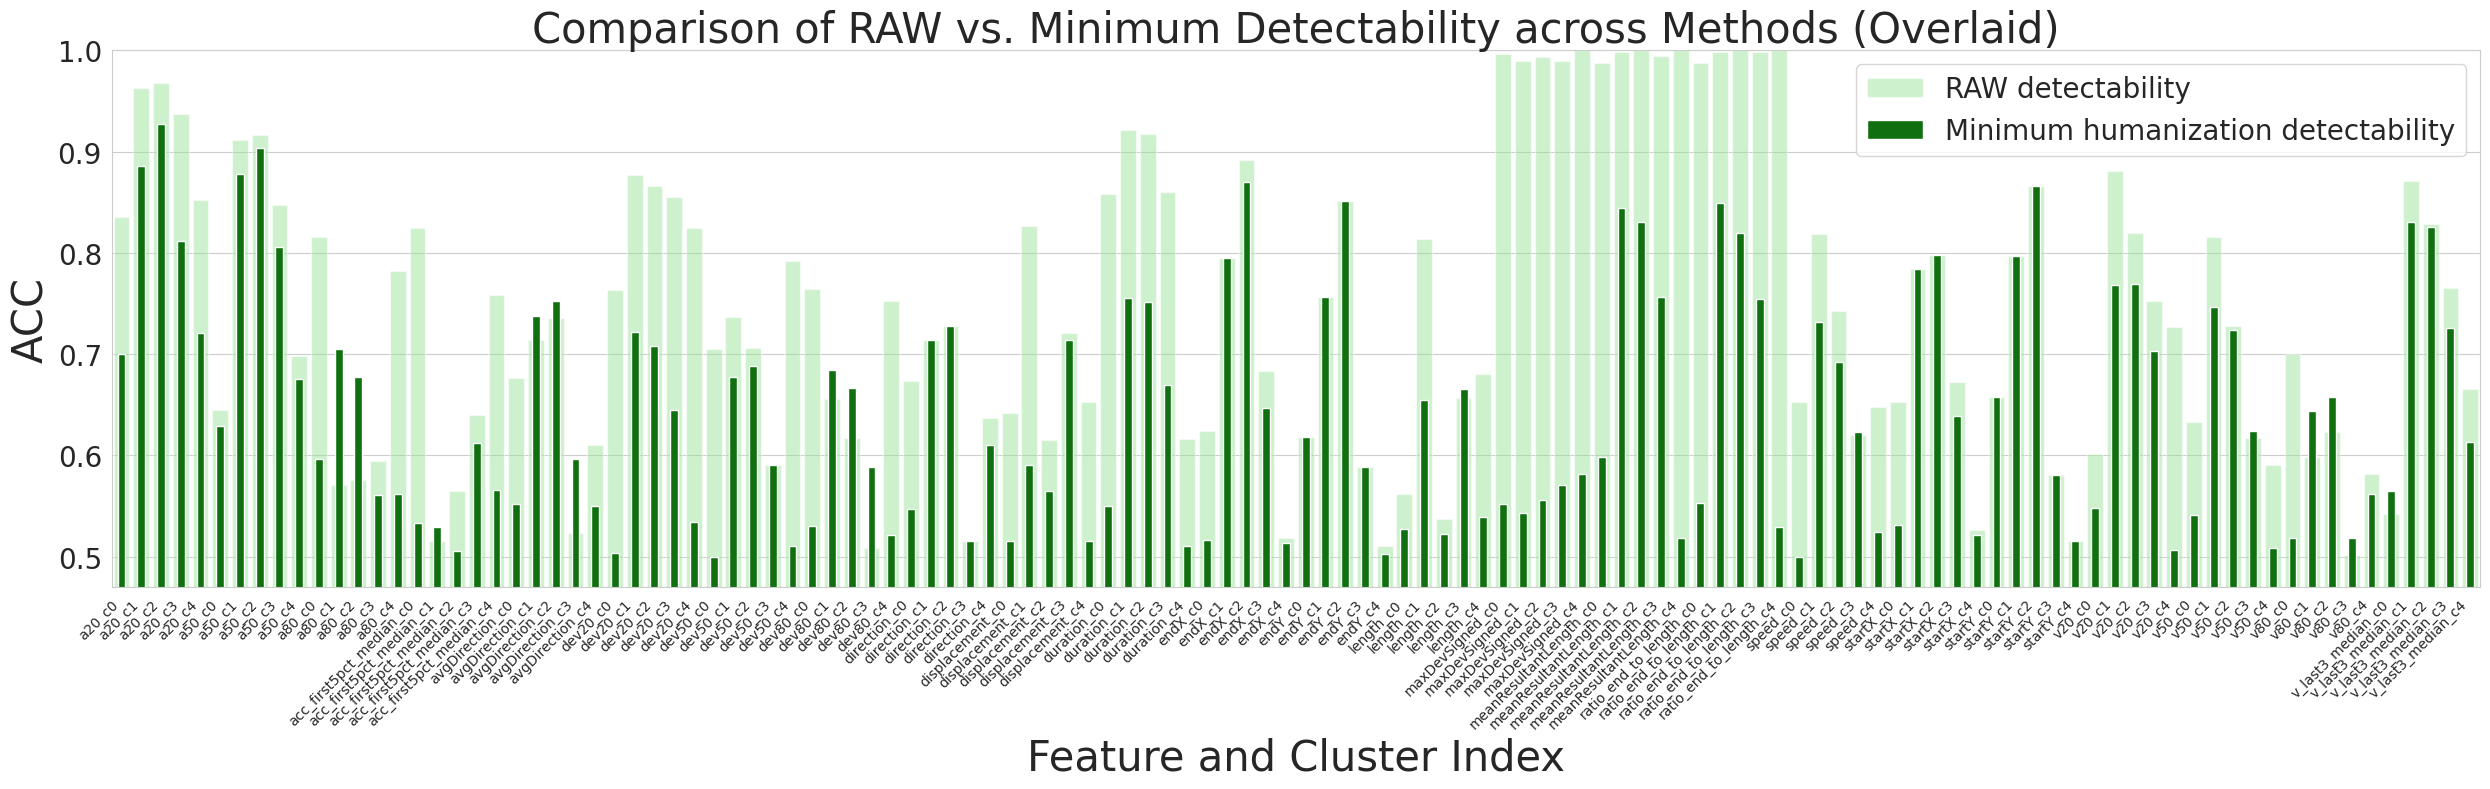

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
plot_data = []
for raw_val, diff, feature, cluster_idx in added_value:
    label = f"{feature}_c{cluster_idx}"
    # skip the heavy classifiers xgb_accuracy and svm_accuracy
    if (feature == "xgb_accuracy") or (feature == "svm_accuracy"):
        continue
    plot_data.append({"label": label, "Value": raw_val, "Type": "RAW detectability"})
    plot_data.append({"label": label, "Value": raw_val - diff, "Type": "Decreased detectability"})

df_plot = pd.DataFrame(plot_data)
df_plot.sort_values("label", inplace=True)

# Create the overlaid bar plot
plt.figure(figsize=(25, 8))

# Plot RAW detectability (wider bars in the background)
sns.barplot(
    data=df_plot[df_plot["Type"] == "RAW detectability"], 
    x="label", y="Value", color="lightgreen", label="RAW detectability", alpha=0.5
)

# Plot Decreased detectability (narrower bars in the foreground)
# Using a smaller width ensures visibility even if Decreased > RAW (diff < 0)
sns.barplot(
    data=df_plot[df_plot["Type"] == "Decreased detectability"], 
    x="label", y="Value", color="green", label="Minimum humanization detectability", width=0.4
)

plt.xticks(rotation=45, fontsize=10, horizontalalignment='right')
plt.xlabel("Feature and Cluster Index", fontsize=30)
plt.ylabel("ACC", fontsize=30)
plt.yticks(fontsize=20)
plt.title("Comparison of RAW vs. Minimum Detectability across Methods (Overlaid)", fontsize=30)
plt.legend(loc='upper right', fontsize=20)
plt.ylim(0.47, 1)
plt.tight_layout()
sns.set_style("whitegrid")
plt.show()
# set lightgrid for sns



## Collect all the classifiers and make big comparison

In [26]:
import importlib
import judge_library  # or from judge_library import UltimateClassifier, but keep a reference to the module

# After editing the code of UltimateClassifier inside module judge_library:
importlib.reload(judge_library)

# Now you can use the updated UltimateClassifier
from judge_library import UltimateClassifier  # or just use judge_library.UltimateClassifier

In [43]:
raw_tap_classifier_us_across_clusters

{0: {'threshold': 5000.0,
  'lesser_than_threshold_agent_log_odds': inf,
  'greater_than_threshold_agent_log_odds': -3.8534155784746744},
 1: {'threshold': 5000.0,
  'lesser_than_threshold_agent_log_odds': inf,
  'greater_than_threshold_agent_log_odds': -2.557379298600991},
 2: {'threshold': 5000.0,
  'lesser_than_threshold_agent_log_odds': inf,
  'greater_than_threshold_agent_log_odds': -2.8740353385764705},
 3: {'threshold': 5000.0,
  'lesser_than_threshold_agent_log_odds': inf,
  'greater_than_threshold_agent_log_odds': -4.002040611866701},
 4: {'threshold': 5000.0,
  'lesser_than_threshold_agent_log_odds': inf,
  'greater_than_threshold_agent_log_odds': -3.9803045128445533}}

In [ ]:
humanized_swipe_classifiers_to_use_for_clusters
raw_tap_classifier_us_across_clusters
interval_classifier_microseconds_across_clusters

# save these classifiers to disk using joblib
import joblib
import numpy as np
from typing import Callable, List, Optional, Tuple
from functools import partial

# save the classifiers
joblib.dump(humanized_swipe_classifiers_to_use_for_clusters, "humanized_swipe_classifiers.pkl")
joblib.dump(raw_tap_classifier_us_across_clusters, "raw_tap_classifier_us_across_clusters.pkl")
joblib.dump(interval_classifier_microseconds_across_clusters, "interval_classifier_microseconds_across_clusters.pkl")

from judge_library import UltimateClassifier
from analysis.lib.gesture_log_reader_utils import ranged_batched_modified_generator_with_session_timestamp

def get_prob_from_log_odds(log_odds: float) -> float:
    neg_odds = np.exp(-log_odds)
    probability = 1 / (1 + neg_odds)
    return probability


def get_human_versus_non_human_versus_agents():
    ultimate_classifiers_across_clusters = UltimateClassifier(
        classifiers_to_use_for_clusters=humanized_swipe_classifiers_to_use_for_clusters,
        tap_us_classifier_for_clusters=raw_tap_classifier_us_across_clusters,
        interval_us_classifier=interval_classifier_microseconds_across_clusters,
    )
    
    all_plot_rows = []
    for cluster_idx, task_cluster in enumerate(task_clusters):
        ranged_raw_generator_with_session_timestamp: Callable[
            [
                List[str], Optional[Callable[[List[FingerEvent]], List[FingerEvent]]]
            ], 
            List[SessionType]
        ] = partial(
            ranged_batched_modified_generator_with_session_timestamp, 
            formated_data_timestamps=formated_data_timestamps, 
            index_range=task_cluster, 
            filtering_and_modification_function=None
        )
        generator_list: List[Tuple[str, List[SessionType]]] = [
            ("Humans", ranged_raw_generator_with_session_timestamp(participants=humans)),
            # ("ui_tars_no_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[0]])), ("ui_tars_available_humanity", ranged_raw_generator_with_session_timestamp(participants=[ui_tars_list[1]])),
            ("non_humanized_agents", ranged_raw_generator_with_session_timestamp(participants=non_humanized_agents)),
            ("humanized_agents", ranged_raw_generator_with_session_timestamp(participants=humanized_agents)),
            # ("non_humanized_agents_fake", fake_ranged_generator(participants=non_humanized_agents)),
            # ("humanized_agents_fake", fake_ranged_generator(participants=humanized_agents)),
        ]

        results_list_prob_0_1: List[Tuple[str, List[UltimateClassifier.ResultType]]] = []

        for label, session_generator in generator_list:
            label_result: List[UltimateClassifier.ResultType] = []
            for session in session_generator:
                session_result = ultimate_classifiers_across_clusters.predict(
                    X=session,
                    task_cluster_id=cluster_idx,
                )
                if len(session_result) == 0:
                    continue
                start_timestamp_for_this_session = session_result[0][0]
                session_result_starting_from_0_and_between_0_1 = [
                    (timestamp - start_timestamp_for_this_session, get_prob_from_log_odds(log_odds))
                    for (timestamp, log_odds) in session_result
                ]
                label_result.append(session_result_starting_from_0_and_between_0_1)
            results_list_prob_0_1.append((label, label_result))

        # Collect all clusters' sessions into one long dataframe, then plot once (mean + CI across sessions)
        
        for label, sessions in results_list_prob_0_1:
            for session_id, ts in enumerate(sessions):
                for t_us, p in ts:
                    all_plot_rows.append(
                        {
                            "cluster_idx": cluster_idx,
                            "label": label,
                            "session_id": session_id,
                            "t_us": int(t_us),
                            "p": float(p),
                        }
                    )
    return all_plot_rows


gotten_all_rows = get_human_versus_non_human_versus_agents()




No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

/tmp/ipykernel_806740/3035632808.py:9: RuntimeWarning: overflow encountered in exp
  neg_odds = np.exp(-log_odds)


No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found

In [ ]:
import matplotlib.pyplot as plt


def plot_human_vs_nonhuman_vs_humanized(all_plot_rows, time_us_cutoff):

    df_plot = pd.DataFrame(all_plot_rows)

    # line style by label
    dashes_by_label = {
        "Humans": "",
        "non_humanized_agents": (4, 2),
        "humanized_agents": (1, 1),
    }
    df_plot = df_plot[df_plot["t_us"] < time_us_cutoff]

    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")


    for label_name in ["Humans", "non_humanized_agents", "humanized_agents"]:
        for task_cluster_id in range(len(task_clusters)):
            subset = df_plot[(df_plot["label"] == label_name) & (df_plot["cluster_idx"] == task_cluster_id)]
            sns.lineplot(
                data=subset,
                x="t_us",
                y="p",
                # label=f"Cluster {task_cluster_id} - {label_name}",
                linestyle=dashes_by_label[label_name],
                estimator="mean",
                errorbar="sd",
                alpha=0.5,
                color=sns.color_palette("husl", len(task_clusters))[task_cluster_id],
            )
    sns.lineplot(
        data=df_plot,
        x="t_us",
        y="p",
        hue="cluster_idx",                 # color by cluster
        style="label",                     # linestyle by label
        dashes=dashes_by_label,
        estimator="mean",
        errorbar="sd",                     # CI shading across sessions
        alpha=0.3,
        palette=sns.color_palette("husl", len(task_clusters)),
    )

    plt.xlabel("Time (microseconds)")
    plt.ylabel("P(human) / probability (0..1)")
    plt.ylim(-0.05, 1.05)
    plt.title("Human vs non-humanized vs humanized (mean ± SD across sessions)")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.0)
    # plt.tight_layout()
    plt.show()

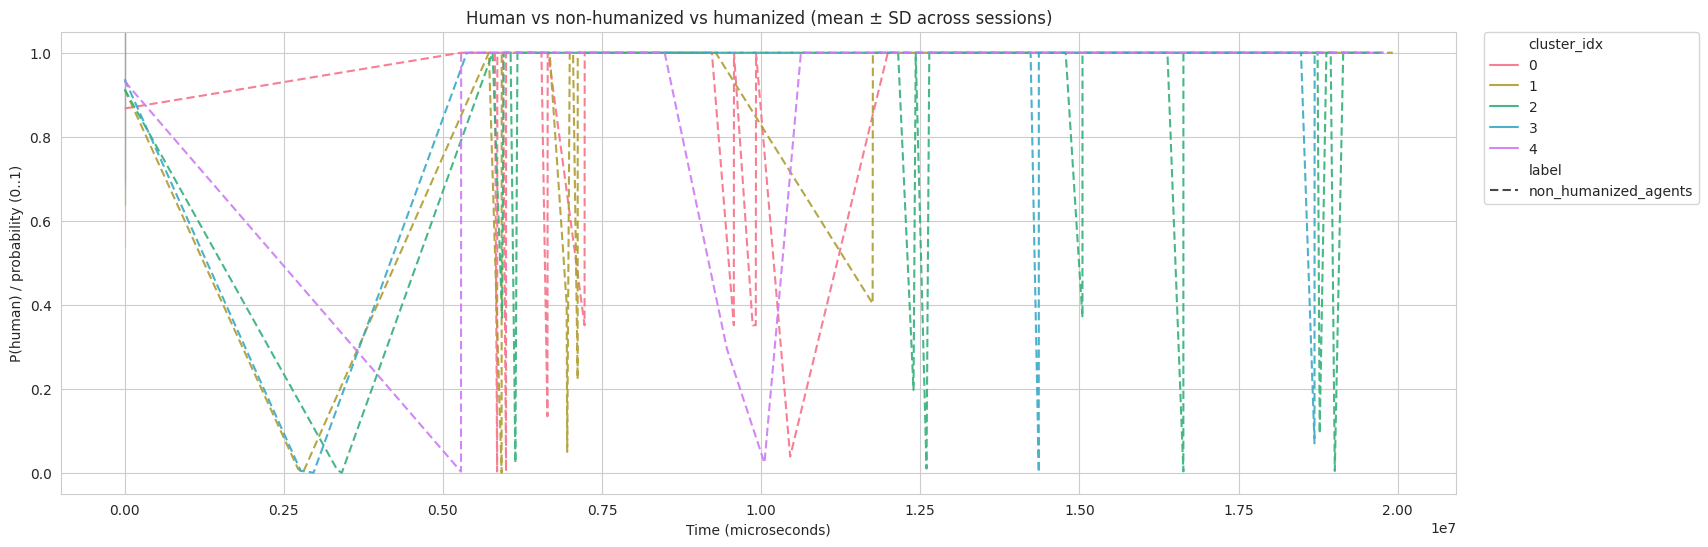

In [ ]:


plot_human_vs_nonhuman_vs_humanized(gotten_all_rows, time_us_cutoff=1e6 * 20)

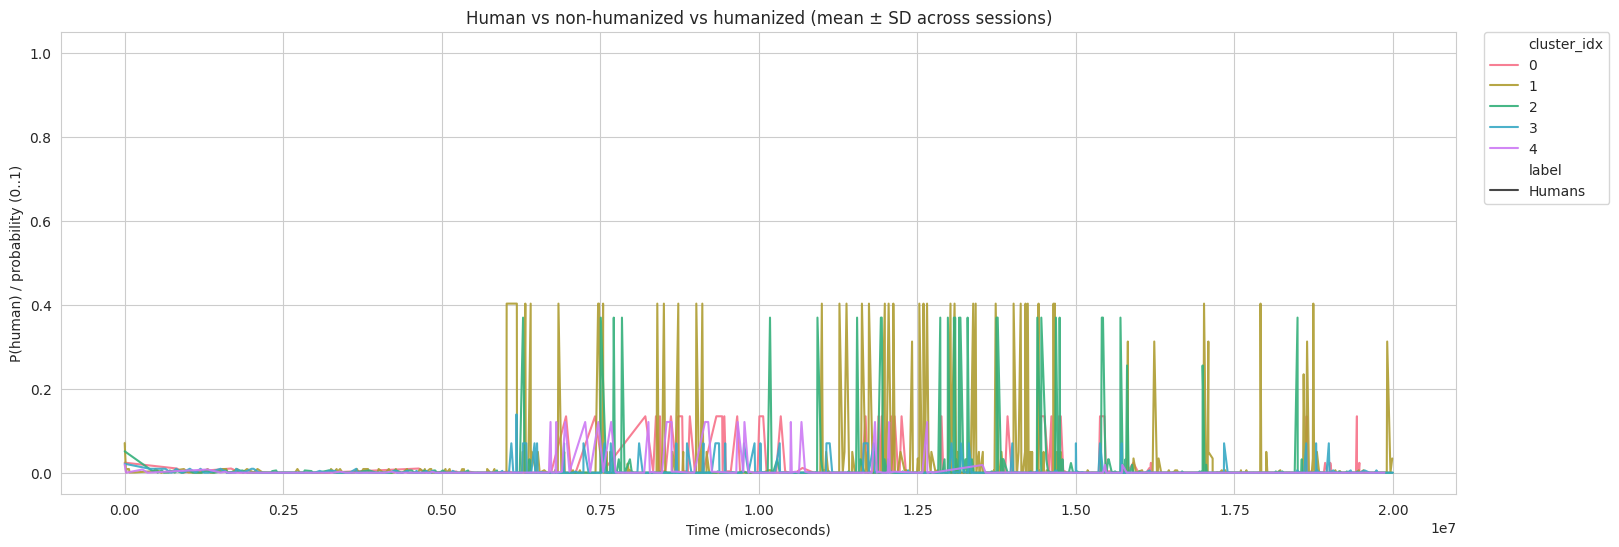

In [51]:

plot_human_vs_nonhuman_vs_humanized(gotten_all_rows, time_us_cutoff=1e6 * 20)

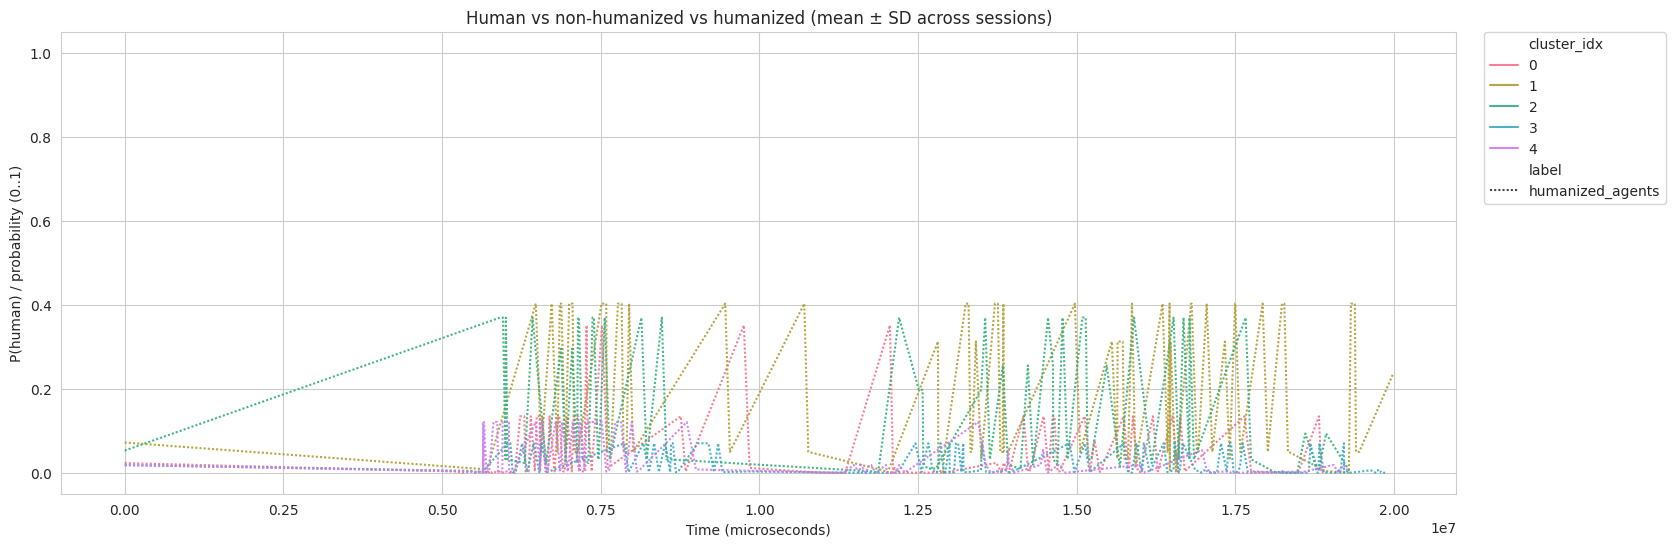

In [53]:

plot_human_vs_nonhuman_vs_humanized(gotten_all_rows, time_us_cutoff=1e6 * 20)

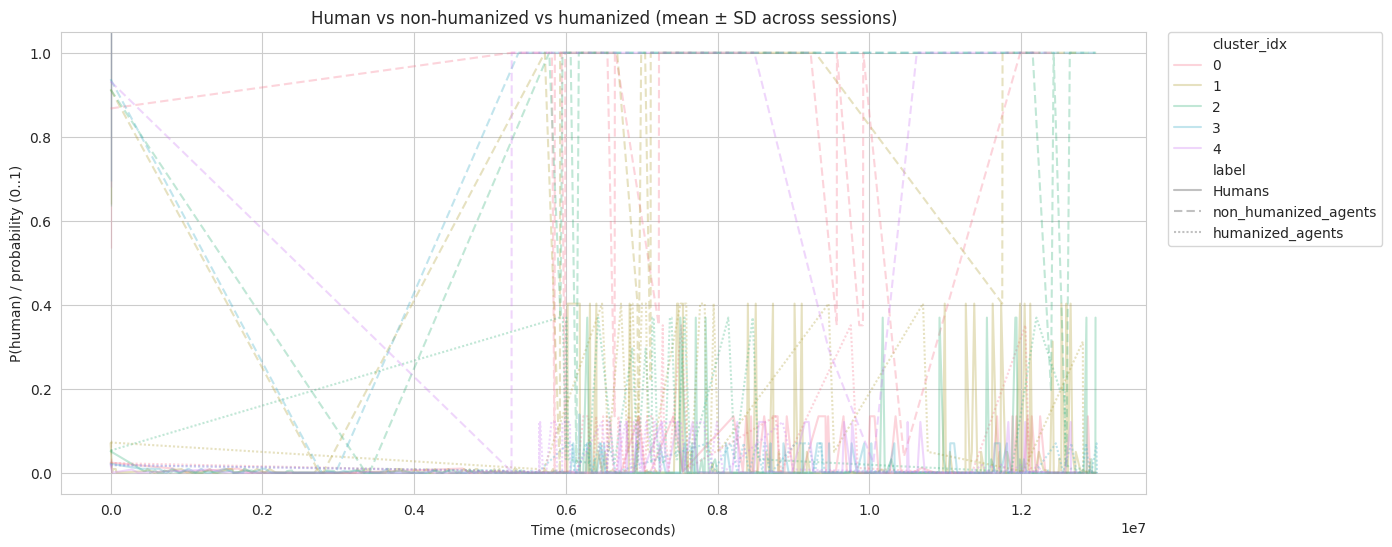

In [64]:

plot_human_vs_nonhuman_vs_humanized(gotten_all_rows, time_us_cutoff=1e6 * 13)

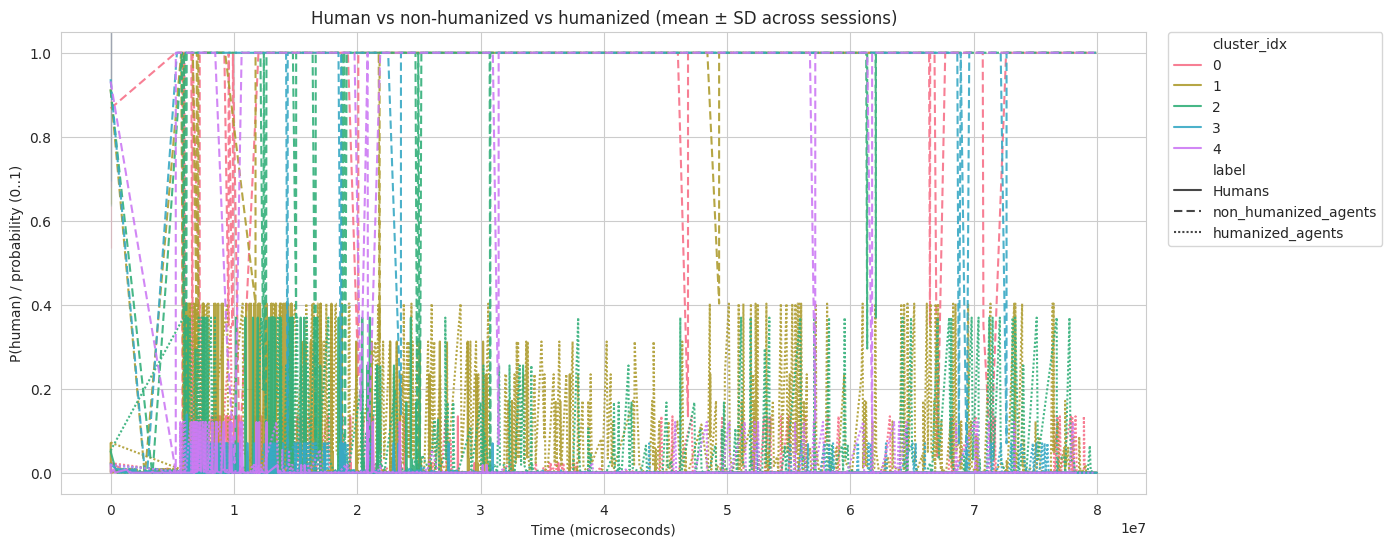

In [61]:

plot_human_vs_nonhuman_vs_humanized(gotten_all_rows, time_us_cutoff=1e6 * 80)

## calculate mutual information

### binary classification mutual information per method vs human on different clusters

In [ ]:
from analysis.processing.calculate_roc_auc_from_feature import make_feature_table_but_mutual_information_binary


from typing import Dict, List, Tuple
from draw_motion_event2 import plot_gestures_2
import sklearn.pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import sklearn

result_csv = pd.DataFrame()

# raw_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}
# humanized_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}

for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    try:
        non_humanized_result_csv = make_feature_table_but_mutual_information_binary(
            task_cluster_id=cluster_idx,
            method_name="RAW",
            pos_iterator=("non_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents,  index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(non_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for non_humanized_agents vs humans for task", task_cluster)
    
    
    try:
        humanized_result_csv = make_feature_table_but_mutual_information_binary(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match",
            pos_iterator=("humanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster)),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv = make_feature_table_but_mutual_information_binary(
            task_cluster_id=cluster_idx,
            method_name="rotation_and_match_disturbance",
            pos_iterator=("fake_humanized_agents", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=static_fit_effort_provider.humanity_disturbance
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents vs humans for task", task_cluster)

    try:
        fake_humanized_result_csv_2 = make_feature_table_but_mutual_information_binary(
            task_cluster_id=cluster_idx,
            method_name="b_spline_disturbance",
            pos_iterator=("fake_humanized_agents_b_spline", ranged_swipe_generator(
                participants=non_humanized_agents, index_range=task_cluster,
                humanity_disturbance=b_spline_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(fake_humanized_result_csv_2)
    except ValueError:
        print("Warning: No valid data for fake_humanized_agents_b_spline vs humans for task", task_cluster)

    try:
        unhumanized_result_csv, _, _ = make_feature_table_but_mutual_information_binary(
            task_cluster_id=cluster_idx,
            method_name="unhumanized_agents",
            pos_iterator=("unhumanized_agents", ranged_swipe_generator(
                participants=humanized_agents, index_range=task_cluster,
                humanity_disturbance=raw_faker
                )),
            neg_iterator=("humans", ranged_swipe_generator(
                participants=humans, index_range=task_cluster)),
        )
        list_to_concat.append(unhumanized_result_csv)
    except ValueError:
        print("Warning: No valid data for unhumanized_agents vs humans for task", task_cluster)
        
    # directly join the three result csvs to results
    result_csv = pd.concat(
        [result_csv] + list_to_concat,
        axis=1
    )

    
result_csv.T.to_csv("results0123/final_mutual_information_binary_per_method.csv")

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

### Multiclass of various method and human vs each other on different clusters

In [ ]:
# reload analysis.processing.calculate_roc_auc_from_feature
import importlib
import analysis.processing.calculate_roc_auc_from_feature
importlib.reload(calculate_roc_auc_from_feature)

<module 'calculate_roc_auc_from_feature' from '/project_folder/calculate_roc_auc_from_feature.py'>

In [ ]:
from analysis.processing.calculate_roc_auc_from_feature import make_feature_table_but_mutual_information_multiple


from typing import Dict, List, Tuple
from draw_motion_event2 import plot_gestures_2
import sklearn.pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import sklearn

result_csv_multiple_info = pd.DataFrame()

# raw_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}
# humanized_swipe_classifiers_to_use_for_clusters: Dict[int, Tuple[Pipeline, XGBClassifier]] = {}

for cluster_idx, task_cluster in enumerate(task_clusters):
    list_to_concat: List[pd.DataFrame] = []

    generators: List[Tuple[str, List[List[FingerEvent]]]] = [
        ("non_humanized_agents", ranged_swipe_generator(
            participants=non_humanized_agents,  index_range=task_cluster)),
        ("humanized_agents", ranged_swipe_generator(
            participants=humanized_agents, index_range=task_cluster)),
        ("fake_humanized_agents", ranged_swipe_generator(
            participants=non_humanized_agents, index_range=task_cluster,
            humanity_disturbance=static_fit_effort_provider.humanity_disturbance
            )),
        ("fake_humanized_agents_b_spline", ranged_swipe_generator(
            participants=non_humanized_agents, index_range=task_cluster,
            humanity_disturbance=b_spline_faker
            )),
        ("unhumanized_agents", ranged_swipe_generator(
            participants=humanized_agents, index_range=task_cluster,
            humanity_disturbance=raw_faker
            )),
    ]

    try: 
        result_per_task_cluster = make_feature_table_but_mutual_information_multiple(
            task_cluster_id=cluster_idx,
            type_and_data_iterators=generators,
        )
        list_to_concat.append(result_per_task_cluster)
    except ValueError:
        print("Warning: No valid data for humanized_agents vs humans for task", task_cluster)

    # directly join the three result csvs to results
    result_csv_multiple_info = pd.concat(
        [result_csv_multiple_info] + list_to_concat,
        axis=1
    )

    
result_csv_multiple_info.T.to_csv("results0123/final_mutual_information_multiple.csv")

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_c_switch_app.log' found under logs
No file named 'gesture_recording_20251201_202546_problematic.log' found under logs
No file named 'gesture_recording_20251201_202819_problematic.log' found under logs
No file named 'gesture_recording_20251201_203019_problematic.log' found under logs
No file named 'gesture_recording_c_switch_appRe.log' found under logs
No file named 'gesture_recording__switch_app.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named '

### human vs unhumanized agent on all task as 1 cluster

In [24]:
def get_human_versus_non_human_on_all_task():
    generators: List[Tuple[str, List[List[FingerEvent]]]] = [
        ("Humans", ranged_swipe_generator(
            participants=humans)),
        ("non_humanized_agents", ranged_swipe_generator(
            participants=non_humanized_agents)),
        # ("humanized_agents", ranged_swipe_generator(
         #    participants=humanized_agents)),
    ]
    
    result = make_feature_table_but_mutual_information_multiple(
        task_cluster_id=-1,
        type_and_data_iterators=generators,
    )
    return result

get_human_versus_non_human_on_all_task().to_csv("results0123/human_vs_nonhuman_mutual_information_all_tasks.csv")

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

In [26]:
# print "results0123/human_vs_nonhuman_mutual_information_all_tasks.csv" in percentages
def temp_print_in_percentages():
    df = pd.read_csv("results0123/human_vs_nonhuman_mutual_information_all_tasks.csv", index_col=[0])
    for col in df.columns:
        df[col] = df[col].apply(lambda x: f"{x * 100.0:.2f}%")
    print(df)
temp_print_in_percentages()


                     (-1, 'mutual_information_multiclass')
feature                                                   
meanResultantLength                                  5.67%
maxDevSigned                                         5.66%
ratio_end_to_length                                  5.64%
avgDirection                                         5.44%
direction                                            5.35%
dev50                                                4.99%
duration                                             4.79%
displacement                                         4.77%
length                                               4.73%
dev20                                                4.67%
dev80                                                4.46%
endX                                                 4.26%
v80                                                  4.11%
startX                                               4.08%
a20                                                  3.6

In [ ]:
from analysis.processing.calculate_roc_auc_from_feature import make_feature_table_but_mutual_information_multiple

def get_human_versus_non_human_on_all_task():
    generators: List[Tuple[str, List[List[FingerEvent]]]] = [
        ("Humans", ranged_swipe_generator(
            participants=humans)),
        ("non_humanized_agents", ranged_swipe_generator(
            participants=non_humanized_agents)),
        # ("humanized_agents", ranged_swipe_generator(
         #    participants=humanized_agents)),
    ]
    
    result = make_feature_table_but_mutual_information_multiple(
        task_cluster_id=-1,
        type_and_data_iterators=generators,
        output_relative_importance=False,
    )
    return result

get_human_versus_non_human_on_all_task() # .to_csv("results0123/human_vs_nonhuman_mutual_information_all_tasks.csv")

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

(-1, mutual_information_multiclass)
feature                                                  
meanResultantLength                              0.581804
maxDevSigned                                     0.580705
ratio_end_to_length                              0.578751
avgDirection                                     0.558069
direction                                        0.549054
dev50                                            0.511800
duration                                         0.491802
displacement                                     0.488960
length                                           0.485617
dev20                                            0.479016
dev80                                            0.457316
endX                                             0.437348
v80                                              0.421202
startX                                           0.419066
a20                                              0.371236
v50                                              0.363576
v20                                              0.349594
v_last3_median                                   0.348330
startY                                           0.343780
acc_first5pct_median                             0.342673
endY                                             0.317801
speed                                            0.301802
a50                                              0.265952
a80                                              0.213482

No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_xxxxx.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under logs
No file named 'gesture_recording_nan.log' found under 

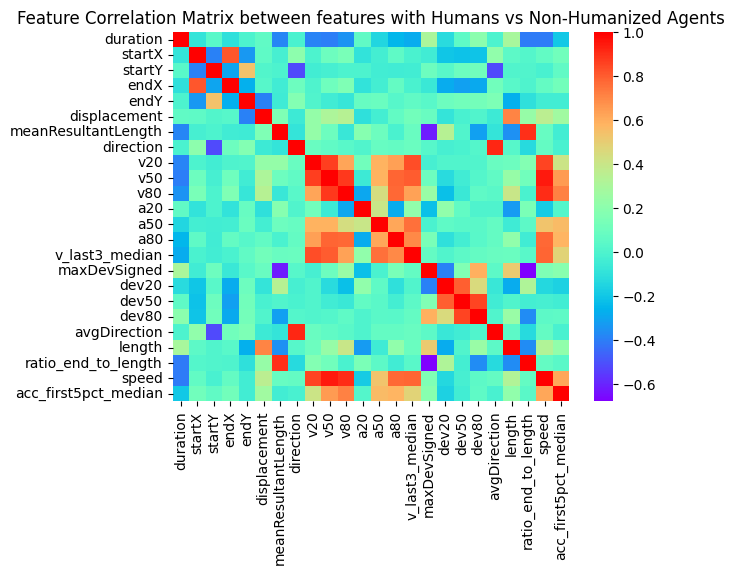

In [ ]:
from analysis.processing.calculate_roc_auc_from_feature import build_features_dataframe, get_feature_columns, get_numeric_feature_column_names
import seaborn as sns
import matplotlib.pyplot as plt
def get_human_versus_non_human_feature_correlation_on_all_task():
    generators: List[Tuple[str, List[List[FingerEvent]]]] = [
        ("Humans", ranged_swipe_generator(
            participants=humans)),
        ("non_humanized_agents", ranged_swipe_generator(
            participants=non_humanized_agents)),
        # ("humanized_agents", ranged_swipe_generator(
         #    participants=humanized_agents)),
    ]
    
    result = build_features_dataframe(
        generators
    )
    feature_columns = get_feature_columns(result, get_numeric_feature_column_names(result))
    
    correlation_matrix = feature_columns.corr()
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="rainbow")
    plt.title("Feature Correlation Matrix between features with Humans vs Non-Humanized Agents")
    plt.show()
get_human_versus_non_human_feature_correlation_on_all_task()
